## House Price Prediction using Linear, Ridge and Lasso Regression
---
The solution is divided into the following sections: 
- Data understanding
- Data cleaning
- Data Exploration  
    1. Univariate Analysis
    2. Bivariate Analysis
    3. Outliers treatment
- Data preparation
- Model building and evaluation


In [103]:
# Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')

# Data Understanding
---

In [104]:
# Read the file
house = pd.read_csv('train.csv',na_values='NA')
house.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0   1          60       RL         65.0     8450   Pave      Reg         Lvl   
1   2          20       RL         80.0     9600   Pave      Reg         Lvl   
2   3          60       RL         68.0    11250   Pave      IR1         Lvl   
3   4          70       RL         60.0     9550   Pave      IR1         Lvl   
4   5          60       RL         84.0    14260   Pave      IR1         Lvl   

  Utilities LotConfig  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0    AllPub    Inside  ...        0    NaN   NaN         NaN       0      2   
1    AllPub       FR2  ...        0    NaN   NaN         NaN       0      5   
2    AllPub    Inside  ...        0    NaN   NaN         NaN       0      9   
3    AllPub    Corner  ...        0    NaN   NaN         NaN       0      2   
4    AllPub       FR2  ...        0    NaN   NaN         NaN       0     12   

   YrSold  SaleType  SaleCondition  SalePrice  
0    2008        WD         Normal     208500  
1    2007        WD         Normal     181500  
2    2008        WD         Normal     223500  
3    2006        WD        Abnorml     140000  
4    2008        WD         Normal     250000  

[5 rows x 79 columns]

In [105]:
# Shape of the data
house.shape

(1460, 79)

In [106]:
# Data type of the columns
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [107]:
# Starts Data cleaning
# Verification of null columns - Loop over all the columns and create an object with null columns only where the null count>50

null_col_dict={}

for i in house.columns:
    if house[i].isna().sum()>50:
        null_col_dict.update({i:house[i].isna().sum()})
null_col_dict

{'LotFrontage': 259,
 'FireplaceQu': 690,
 'GarageType': 81,
 'GarageYrBlt': 81,
 'GarageFinish': 81,
 'GarageQual': 81,
 'GarageCond': 81,
 'PoolQC': 1453,
 'Fence': 1179,
 'MiscFeature': 1406}

# Data Cleaning
---

In [108]:
# For now we will only drop these columns from our data set
list(null_col_dict.keys())

house.drop(columns=list(null_col_dict.keys()),inplace=True,axis=1)
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 69 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [109]:
# Finding duplicate rows

duplicates = house.duplicated().sum()
duplicates

# So no duplicate rows are found


0

In [110]:
# Checking for empty rows
house[house.isnull().all(axis=1)]


Empty DataFrame
Columns: [Id, MSSubClass, MSZoning, LotArea, Street, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, GarageCars, GarageArea, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice]
Index: []

[0 rows x 69 columns]

In [111]:
# we should drop the ID column
house.drop(columns=['Id'],axis=1,inplace=True)


In [112]:
house.select_dtypes(include= ['float64','int64']).columns

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

### Change the below fields to object data type as they carry  categorical data
>   1. MSSubClass
>   2. OverallQual
>   3. OverallCond

### Change the below fields to numeric data type as they carry  continoius data
>   1. MasVnrArea

### delete below columns as the data variation is negligigble
>   1. Utilities

In [113]:
# Convert int to object

house[ ['MSSubClass','OverallQual','OverallCond'] ] = house[ ['MSSubClass','OverallQual','OverallCond'] ].astype('object')
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 68 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   object 
 1   MSZoning       1460 non-null   object 
 2   LotArea        1460 non-null   int64  
 3   Street         1460 non-null   object 
 4   LotShape       1460 non-null   object 
 5   LandContour    1460 non-null   object 
 6   Utilities      1460 non-null   object 
 7   LotConfig      1460 non-null   object 
 8   LandSlope      1460 non-null   object 
 9   Neighborhood   1460 non-null   object 
 10  Condition1     1460 non-null   object 
 11  Condition2     1460 non-null   object 
 12  BldgType       1460 non-null   object 
 13  HouseStyle     1460 non-null   object 
 14  OverallQual    1460 non-null   object 
 15  OverallCond    1460 non-null   object 
 16  YearBuilt      1460 non-null   int64  
 17  YearRemodAdd   1460 non-null   int64  
 18  RoofStyl

In [114]:
# Change data type to int

house['MasVnrArea'] = pd.to_numeric(house['MasVnrArea'], errors='coerce')
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 68 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   object 
 1   MSZoning       1460 non-null   object 
 2   LotArea        1460 non-null   int64  
 3   Street         1460 non-null   object 
 4   LotShape       1460 non-null   object 
 5   LandContour    1460 non-null   object 
 6   Utilities      1460 non-null   object 
 7   LotConfig      1460 non-null   object 
 8   LandSlope      1460 non-null   object 
 9   Neighborhood   1460 non-null   object 
 10  Condition1     1460 non-null   object 
 11  Condition2     1460 non-null   object 
 12  BldgType       1460 non-null   object 
 13  HouseStyle     1460 non-null   object 
 14  OverallQual    1460 non-null   object 
 15  OverallCond    1460 non-null   object 
 16  YearBuilt      1460 non-null   int64  
 17  YearRemodAdd   1460 non-null   int64  
 18  RoofStyl

In [115]:
# Delete column Utilities as it has only one data of different category, rest all are of the same category
house.drop(columns=['Utilities'],axis=1,inplace=True)

In [116]:
## Statistisal description of our data set
house.describe()

LotArea    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count    1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean    10516.828082  1971.267808   1984.865753   103.685262   443.639726   
std      9981.264932    30.202904     20.645407   181.066207   456.098091   
min      1300.000000  1872.000000   1950.000000     0.000000     0.000000   
25%      7553.500000  1954.000000   1967.000000     0.000000     0.000000   
50%      9478.500000  1973.000000   1994.000000     0.000000   383.500000   
75%     11601.500000  2000.000000   2004.000000   166.000000   712.250000   
max    215245.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  ...  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000  ...   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466  ...   
std     161.319273   441.866955   438.705324   386.587738   436.528436  ...   
min       0.000000     0.000000     0.000000   334.000000     0.000000  ...   
25%       0.000000   223.000000   795.750000   882.000000     0.000000  ...   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000  ...   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000  ...   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 32 columns]

### Imputing still reamining null values
   - For Continious fields = null can be replaced by meadian
   - For categorical fields 
       > .If mode is predominent then replace by mode.
       > .If not then replace by new category 'Unknown'

In [117]:
null_col_dict={}

for i in house.columns:
    if house[i].isna().sum()>0:
        null_col_dict.update({i:house[i].isna().sum()})
null_col_dict

{'MasVnrArea': 8,
 'BsmtQual': 37,
 'BsmtCond': 37,
 'BsmtExposure': 38,
 'BsmtFinType1': 37,
 'BsmtFinType2': 38,
 'Electrical': 1}

In [118]:
# MasVnrArea - continious variable, will impute with the median value. As we can see presence of outliers fro the decribe() step
house.MasVnrArea = house.MasVnrArea.fillna(house.MasVnrArea.median())


In [119]:
# Categorical field Null handling - BsmtQual
print(house.BsmtQual.value_counts())
print(house.BsmtQual.mode()[0])

# With such distribution we cant impute with mode and this we will introduce 'Unknown' for the missing values
house.BsmtQual = house.BsmtQual.fillna('Unknown')

BsmtQual
TA    649
Gd    618
Ex    121
Fa     35
Name: count, dtype: int64
TA


In [120]:
#  Categorical field Null handling - BsmtCond
print(house.BsmtCond.value_counts())
print(house.BsmtCond.mode()[0])

# As we see the mode value 'TA' compprehensively larger than any other values, we will impute with the mode here
house.BsmtCond = house.BsmtCond.fillna(house.BsmtCond.mode()[0])

BsmtCond
TA    1311
Gd      65
Fa      45
Po       2
Name: count, dtype: int64
TA


In [121]:
null_col_dict={}

for i in house.columns:
    if house[i].isna().sum()>0:
        null_col_dict.update({i:house[i].isna().sum()})
null_col_dict

{'BsmtExposure': 38, 'BsmtFinType1': 37, 'BsmtFinType2': 38, 'Electrical': 1}

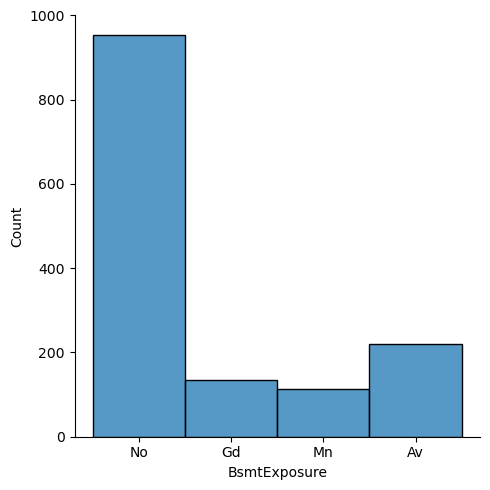

In [122]:
#  Categorical field Null handling - BsmtExposure
sns.displot(house['BsmtExposure'])

# we can impute nulls with mode as the mode is significantly higher than the rest
house.BsmtExposure = house.BsmtExposure.fillna(house.BsmtExposure.mode()[0])


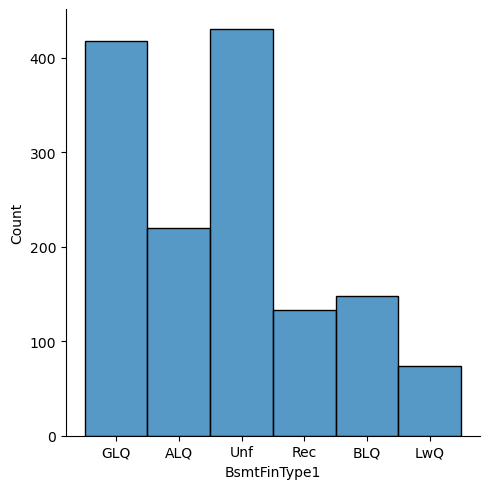

In [123]:
#  Categorical field Null handling - BsmtFinType1
sns.displot(house['BsmtFinType1'])

# With such distribution we cant impute with mode and this we will introduce 'Unknown' for the missing values
house.BsmtFinType1 = house.BsmtFinType1.fillna('Unknown')


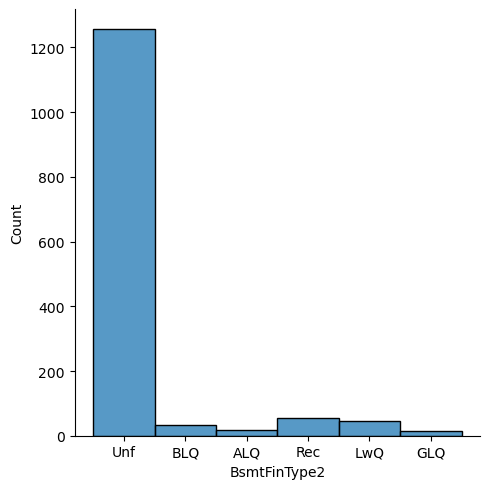

In [124]:
#  Categorical field Null handling - BsmtFinType2
sns.displot(house['BsmtFinType2'])

# we can impute nulls with mode as the mode is significantly higher than the rest
house.BsmtFinType2 = house.BsmtFinType2.fillna(house.BsmtFinType2.mode()[0])

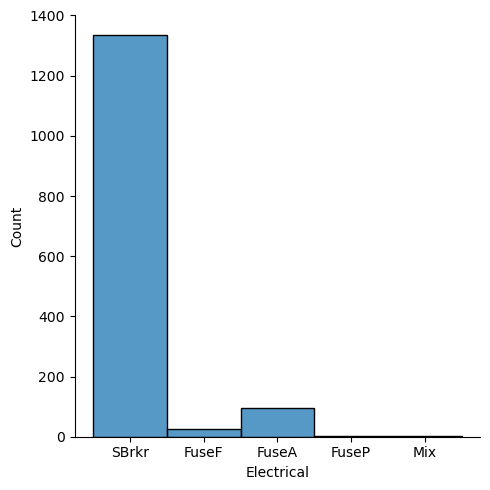

In [125]:
#  Categorical field Null handling - BsmtFinType2
sns.displot(house['Electrical'])

# we can impute nulls with mode as the mode is significantly higher than the rest
house.Electrical = house.Electrical.fillna(house.Electrical.mode()[0])

# Data Exploration
---

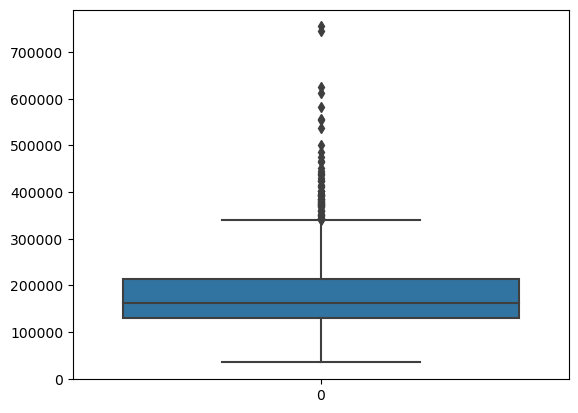

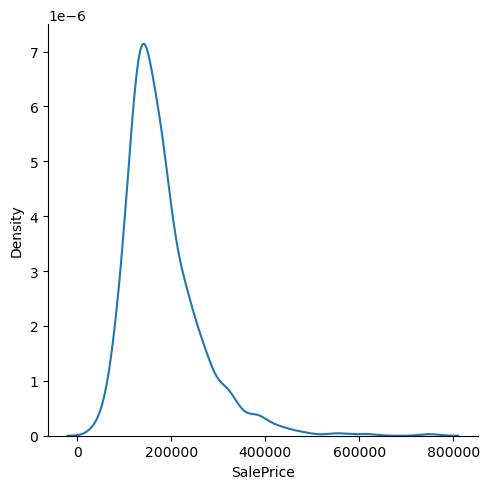

In [126]:
# Univariate Analysis - Target Variable SalePrice
house.SalePrice.describe()
sns.boxplot(house.SalePrice)

sns.displot(house.SalePrice,kind='kde')


### We can find that because of certain outliers the target variable is right skewed. I come to know from my own study that right skewness can be handled by various means, some of them are
- Log Transformation
- Square Root Transformation    

In [127]:
# Lets check the degree of skew
house.SalePrice.skew()

1.8828757597682129

In [128]:
# Lets check Square root transformation first and verify 
x =np.sqrt(house.SalePrice).skew()
print(x)
# Lets apply Log transformation now
y = np.log(house.SalePrice).skew()
print(y)


0.9431527373310963
0.12133506220520406


### Skew value as close to 0 is considered better distribution. Hence we would select the log transformation.

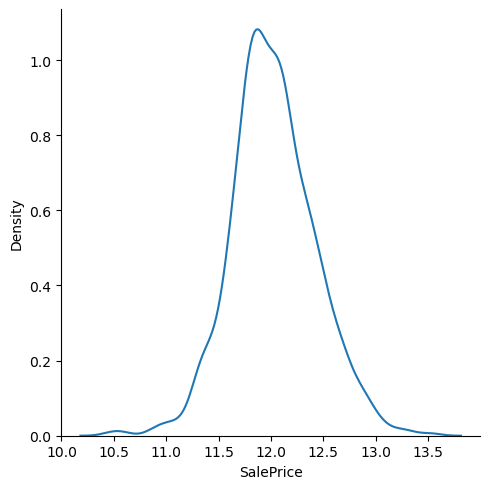

In [129]:
house.SalePrice = np.log(house.SalePrice)
sns.displot(house.SalePrice,kind='kde')

# Now we see our data is well distributed


### Univariate analysis of continious variables

In [130]:
house_cont = house.select_dtypes(include=['int64', 'float64'])
house_cont.columns

Index(['LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

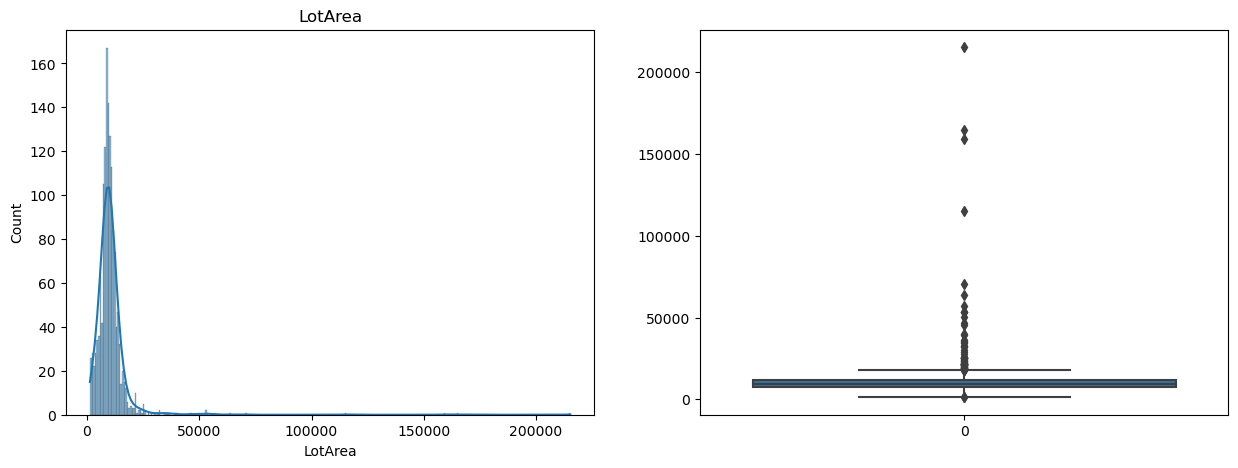

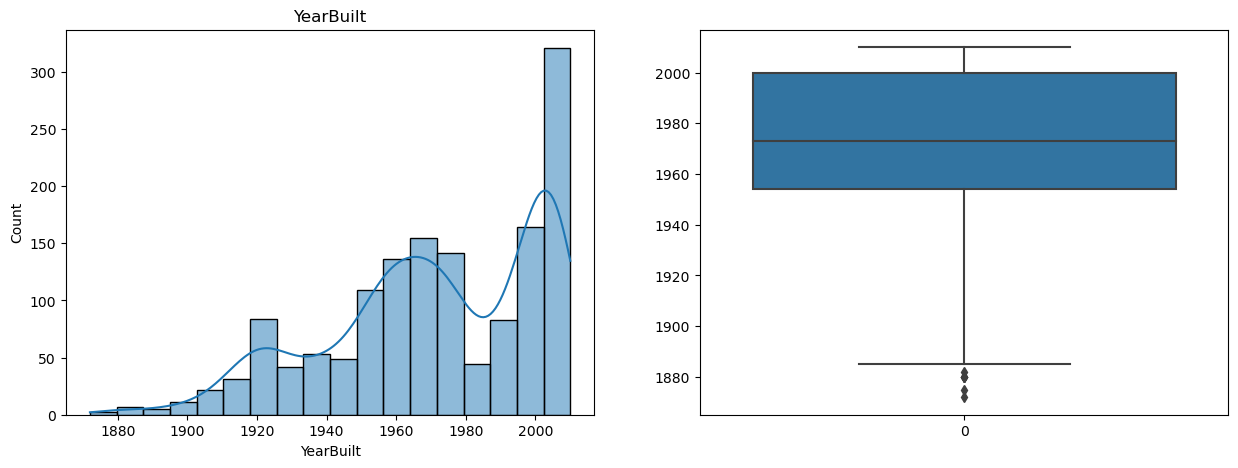

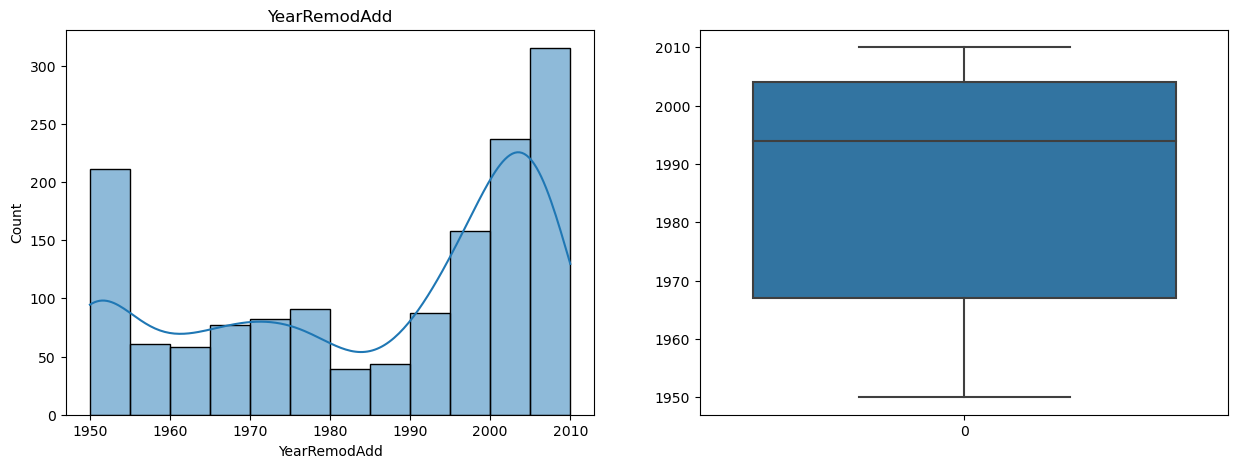

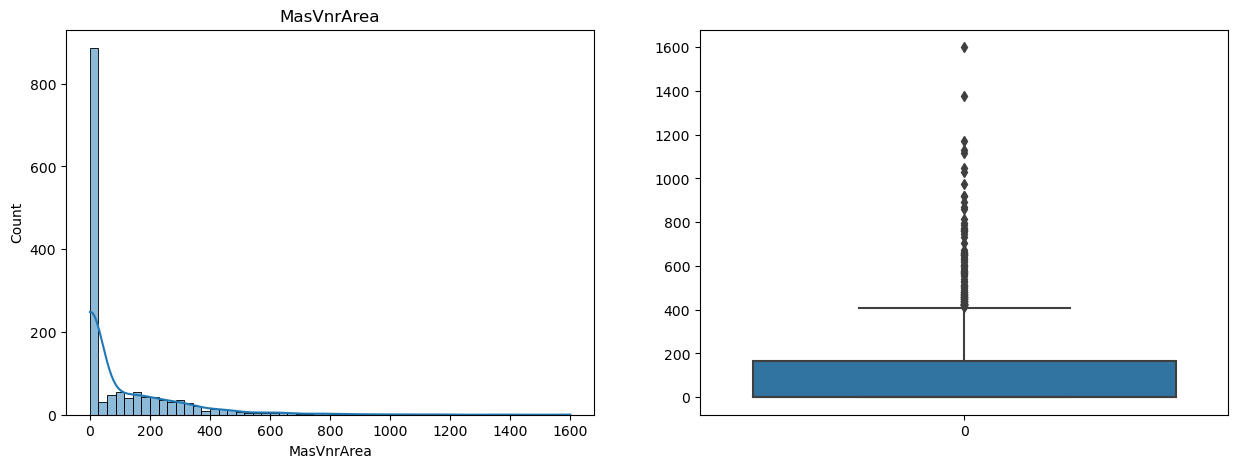

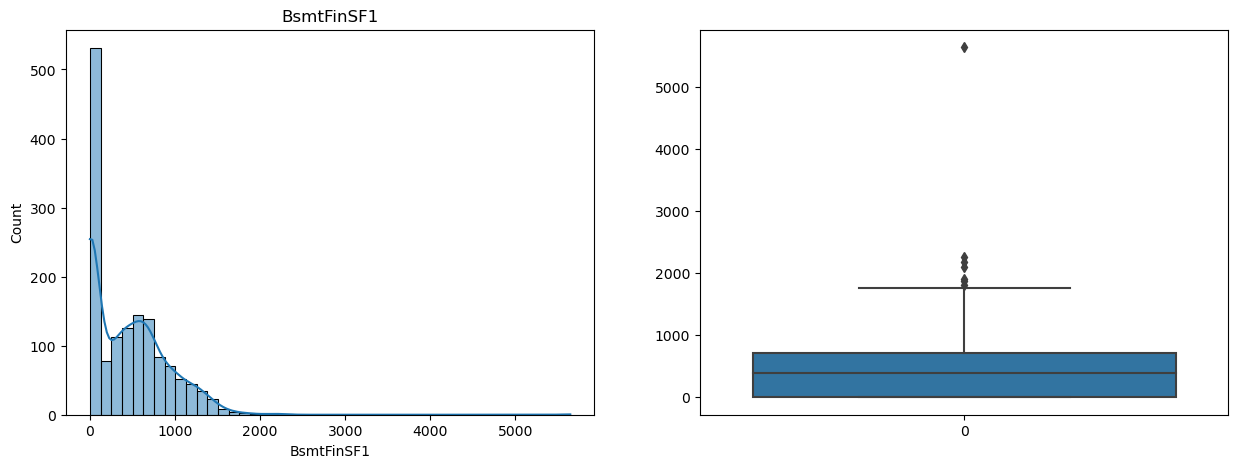

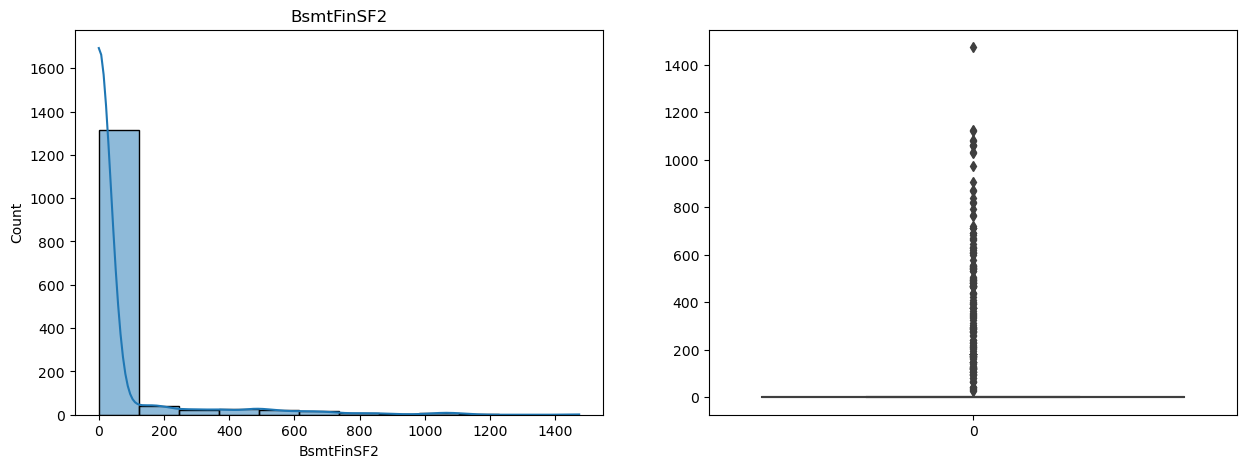

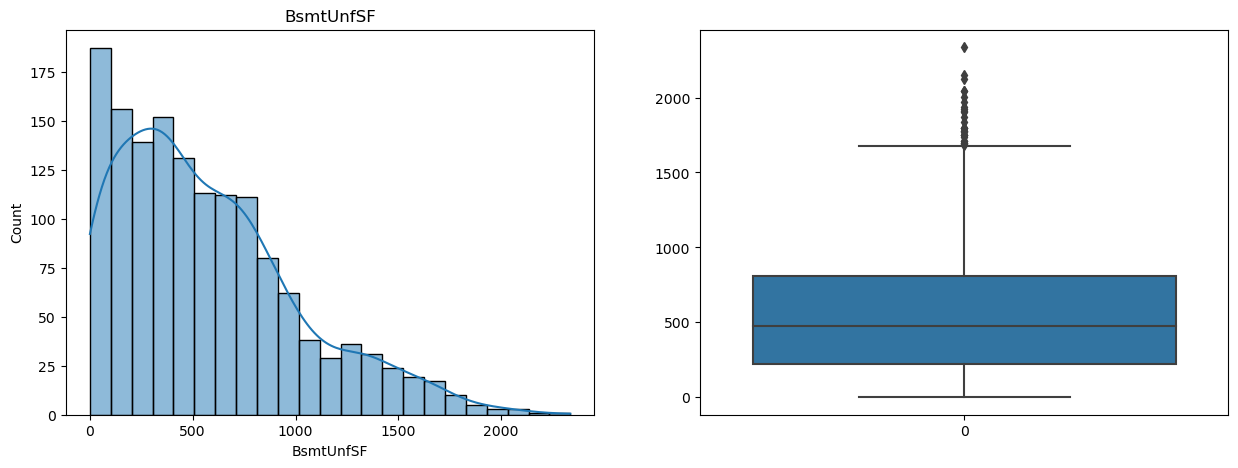

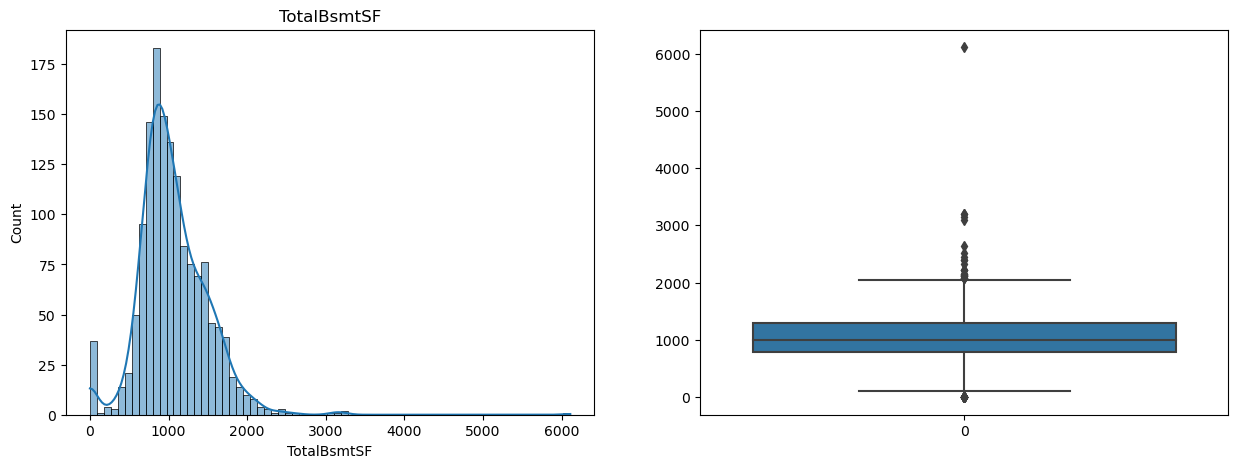

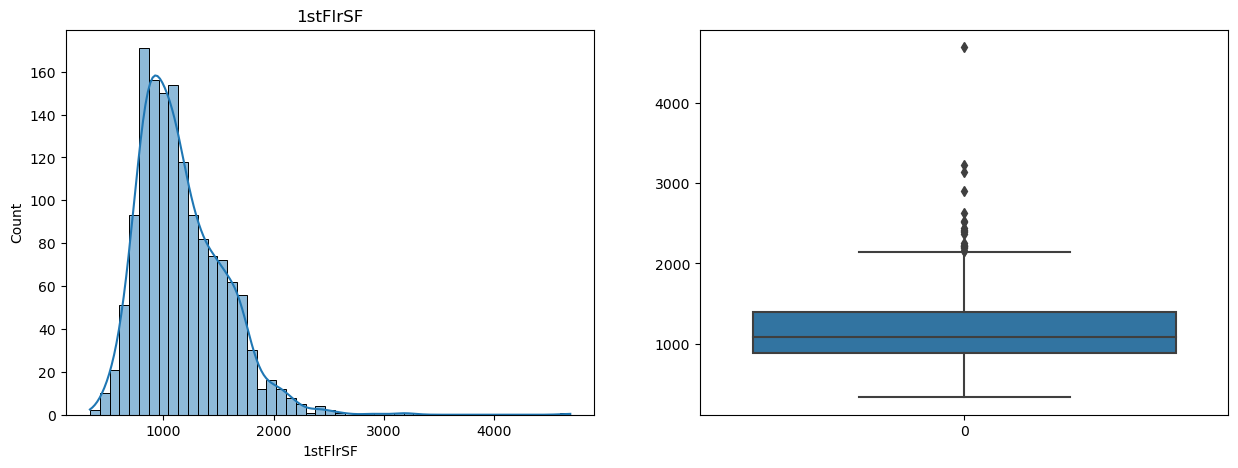

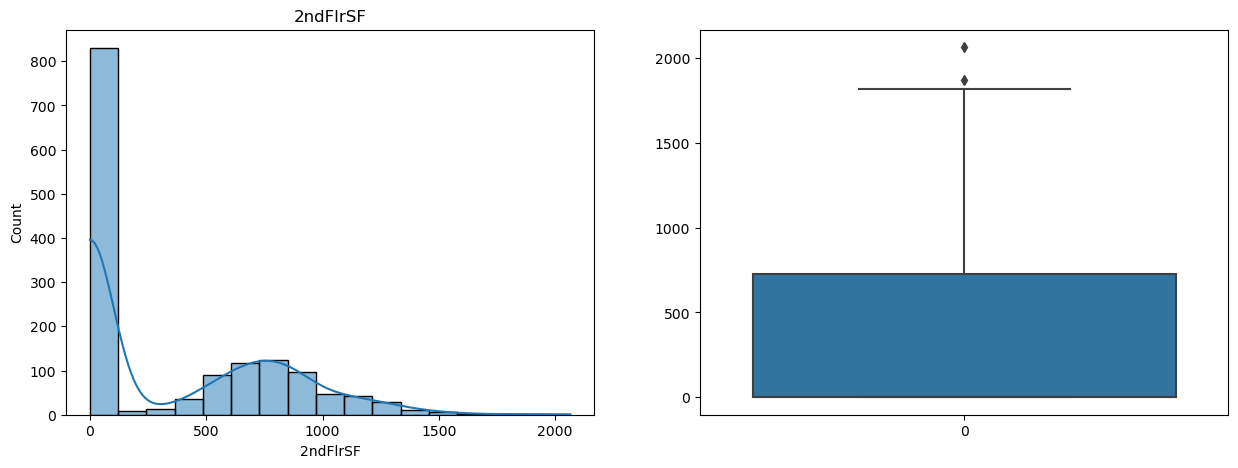

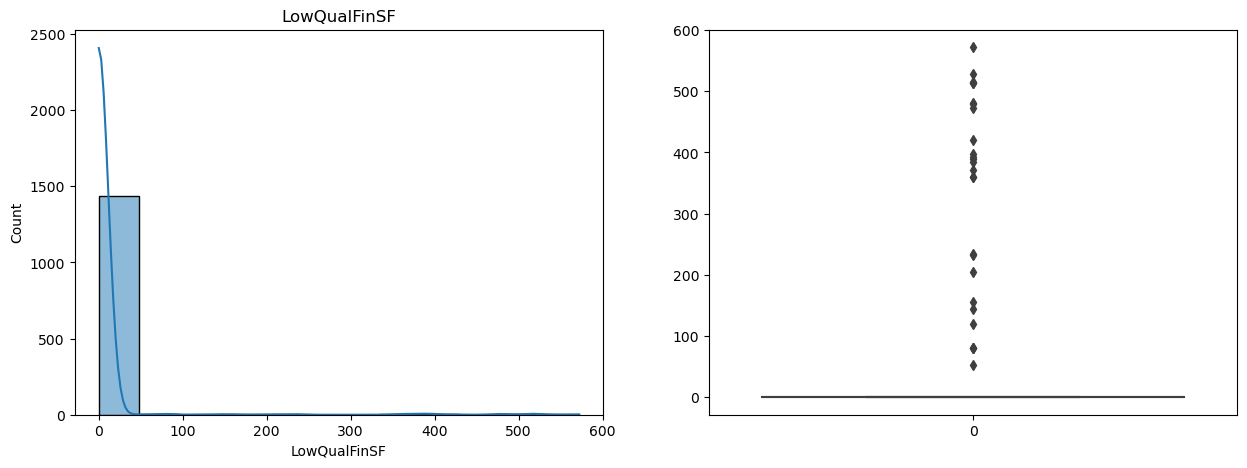

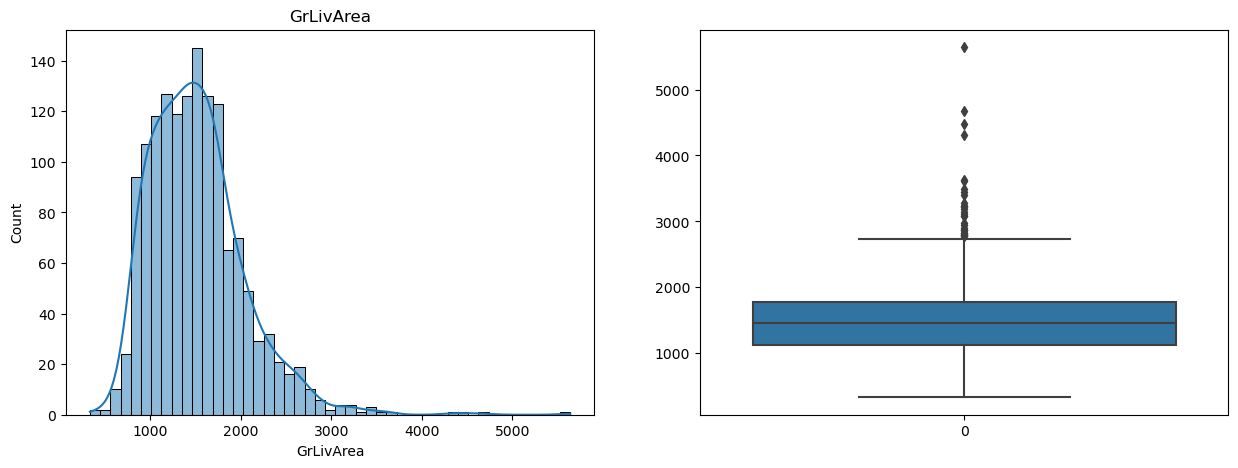

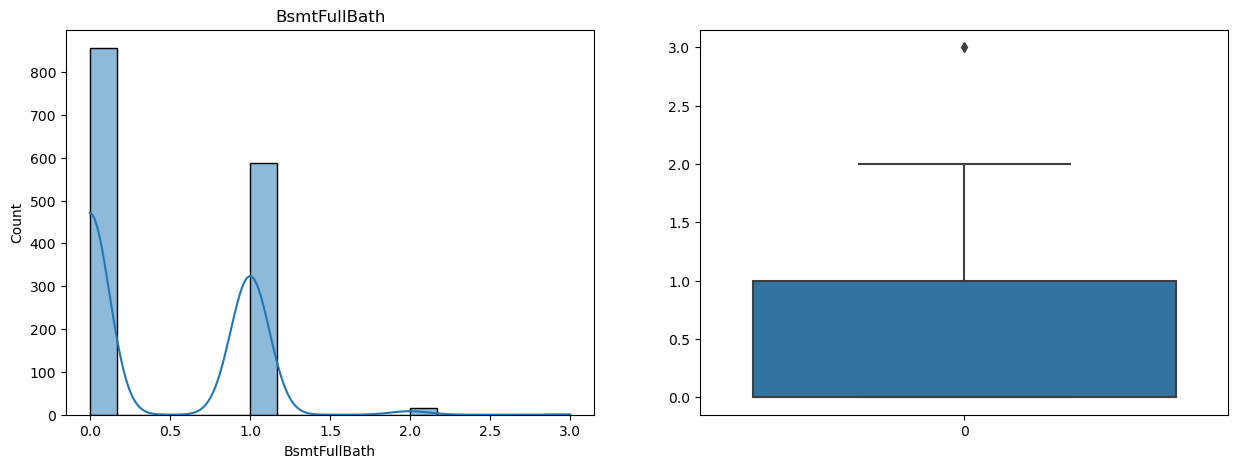

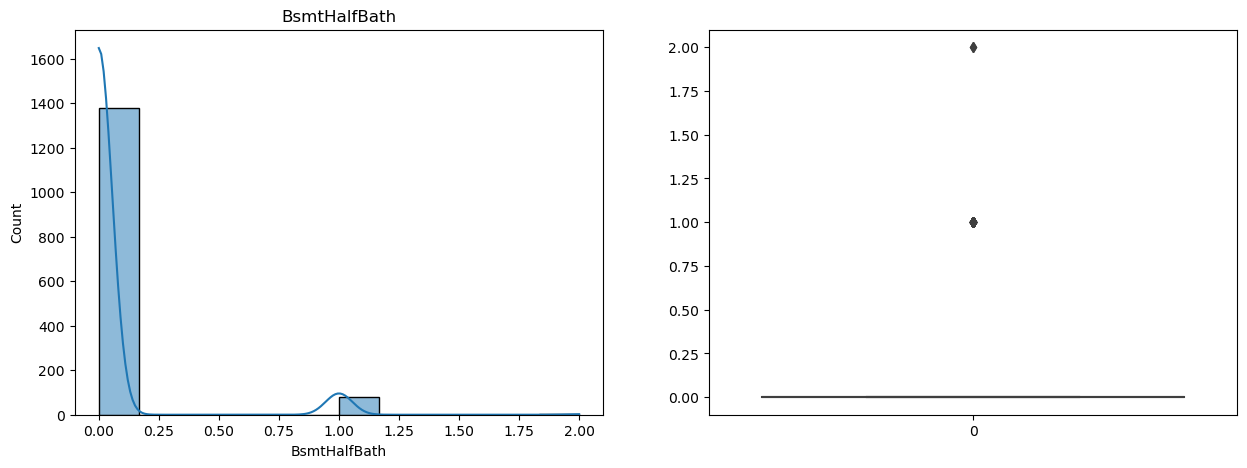

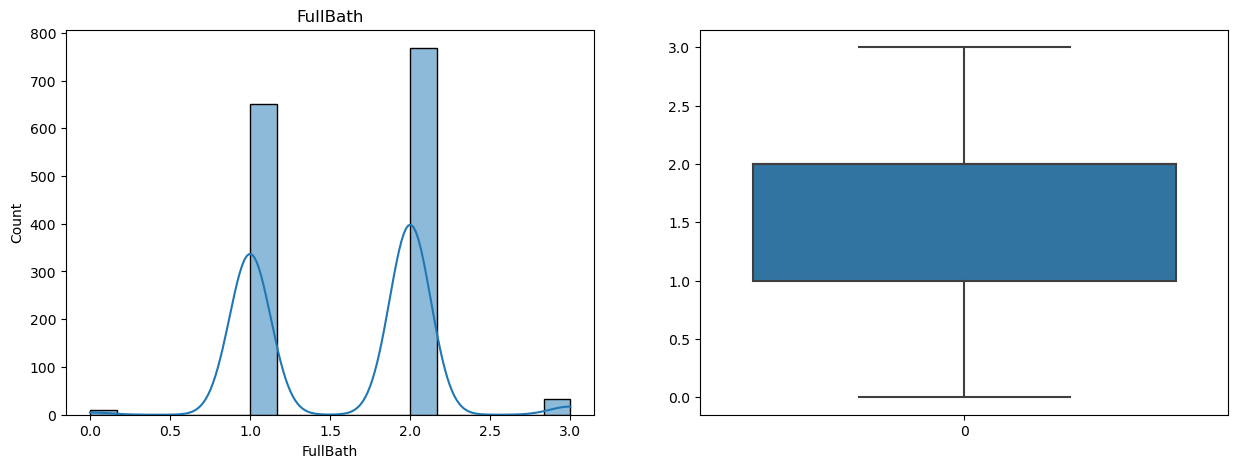

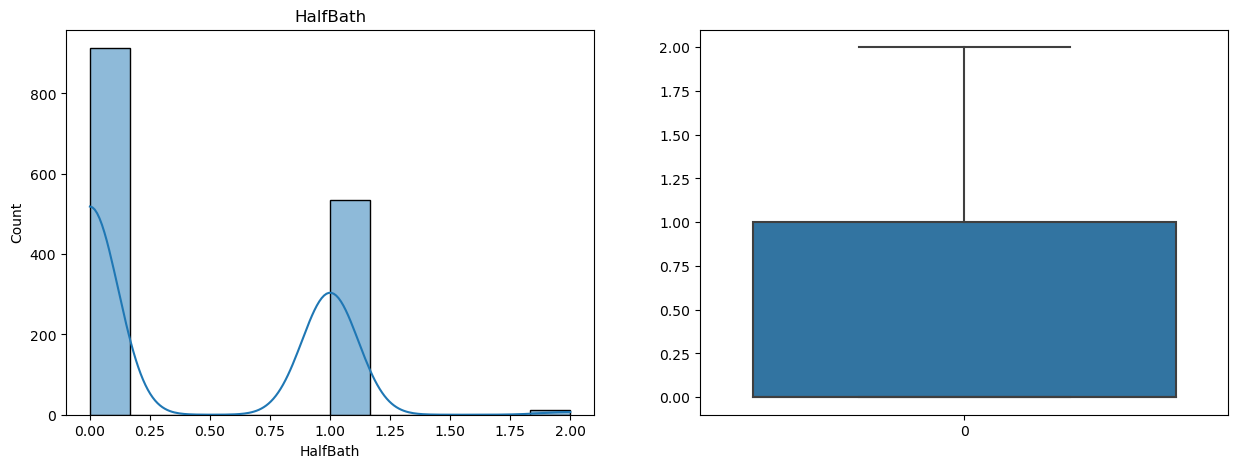

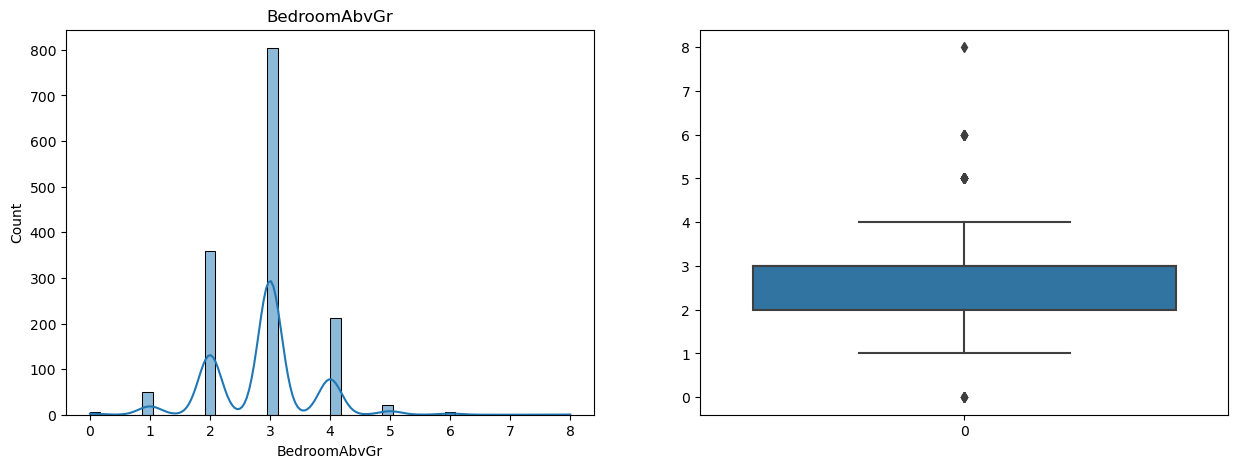

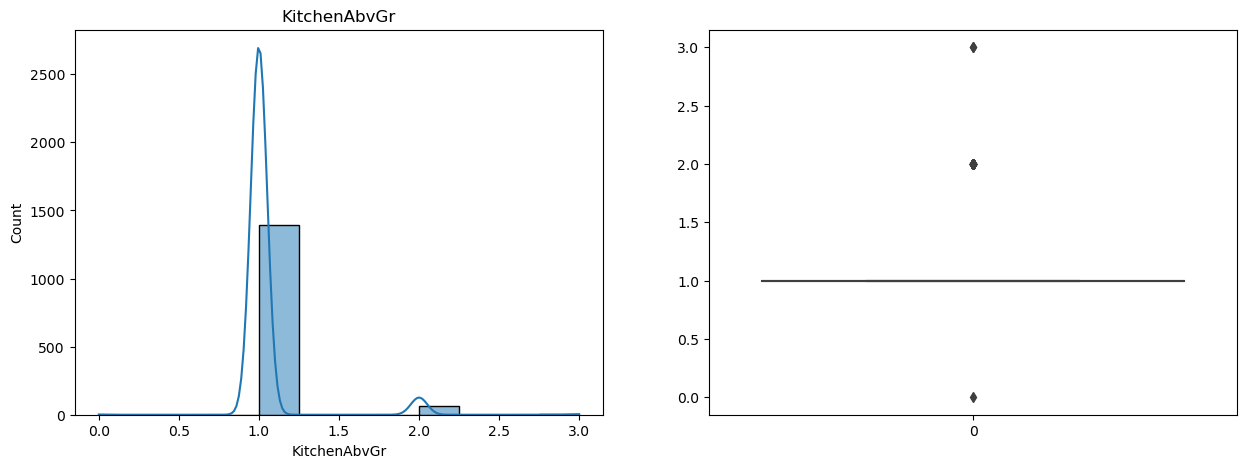

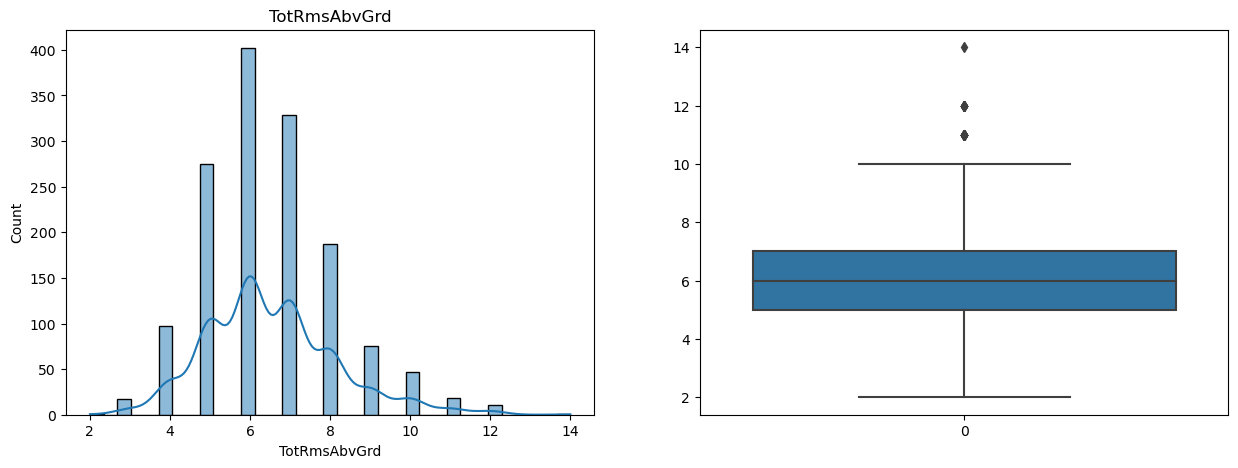

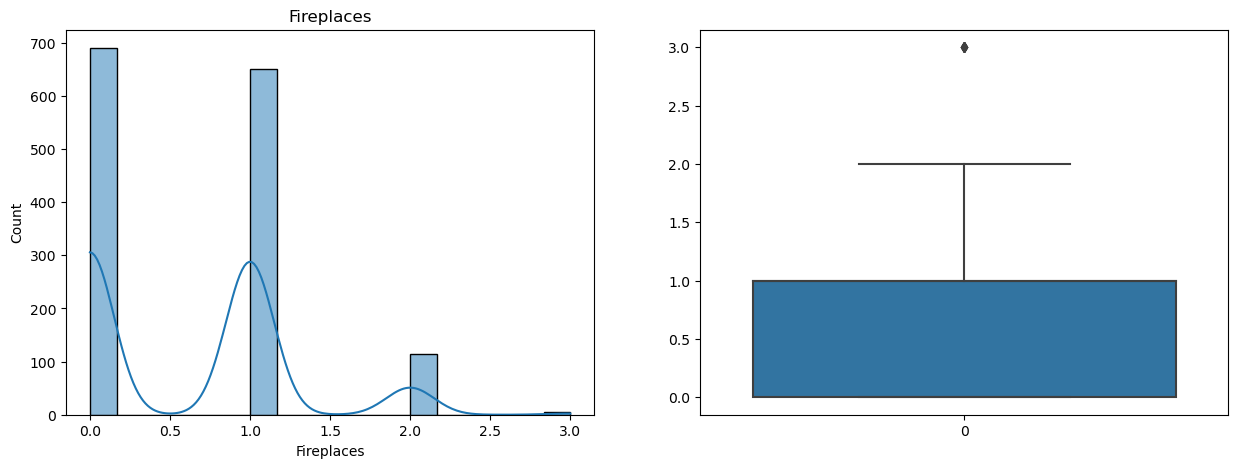

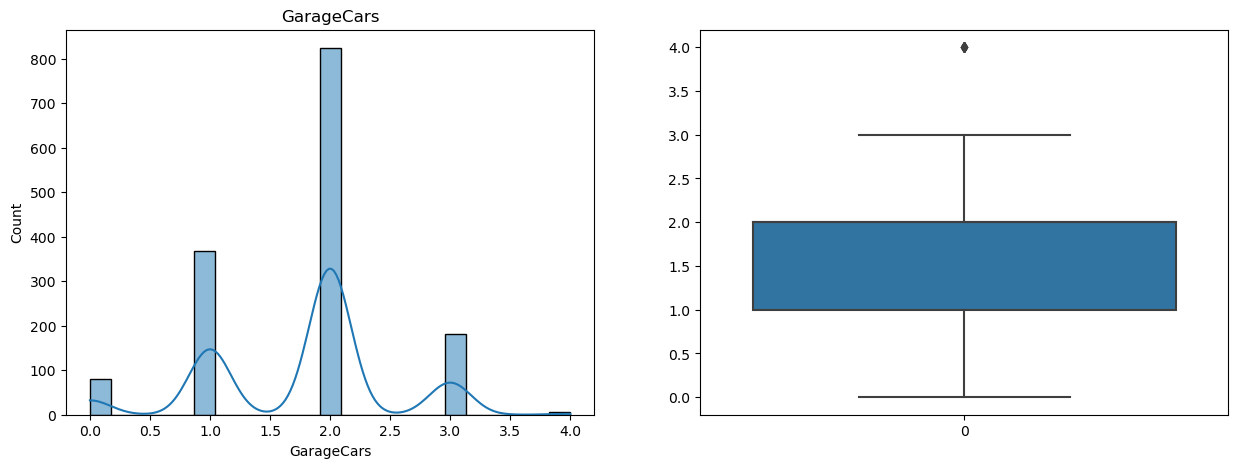

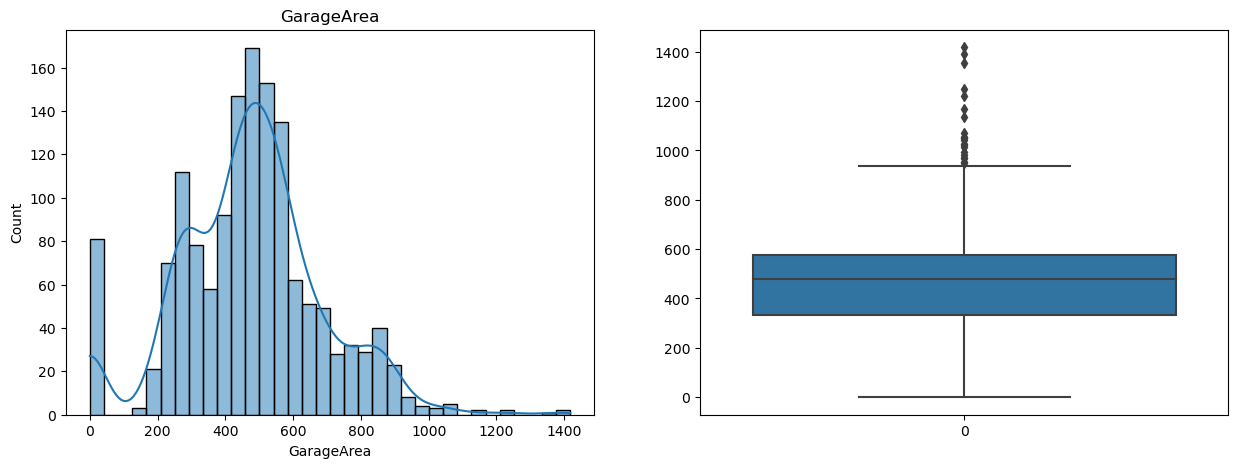

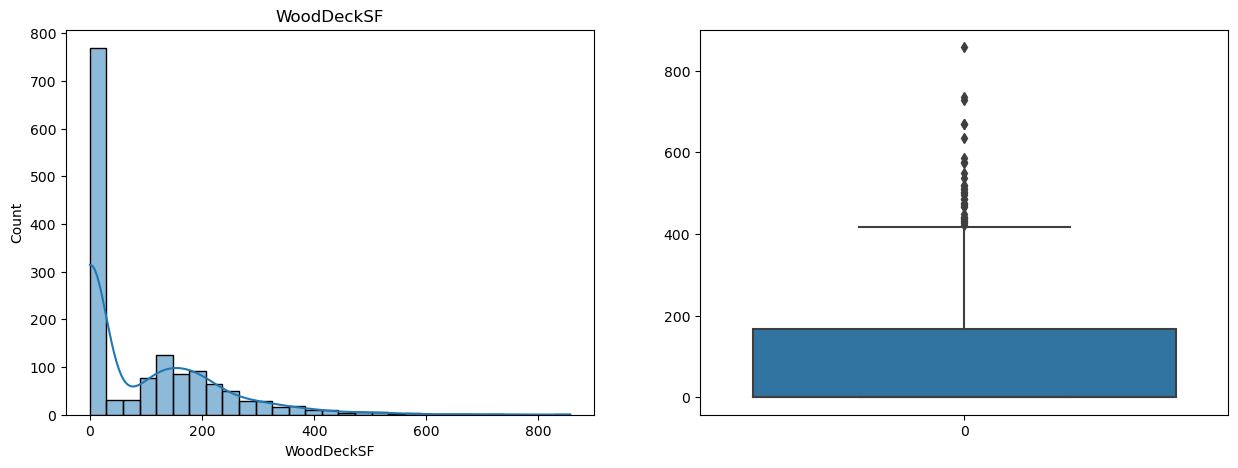

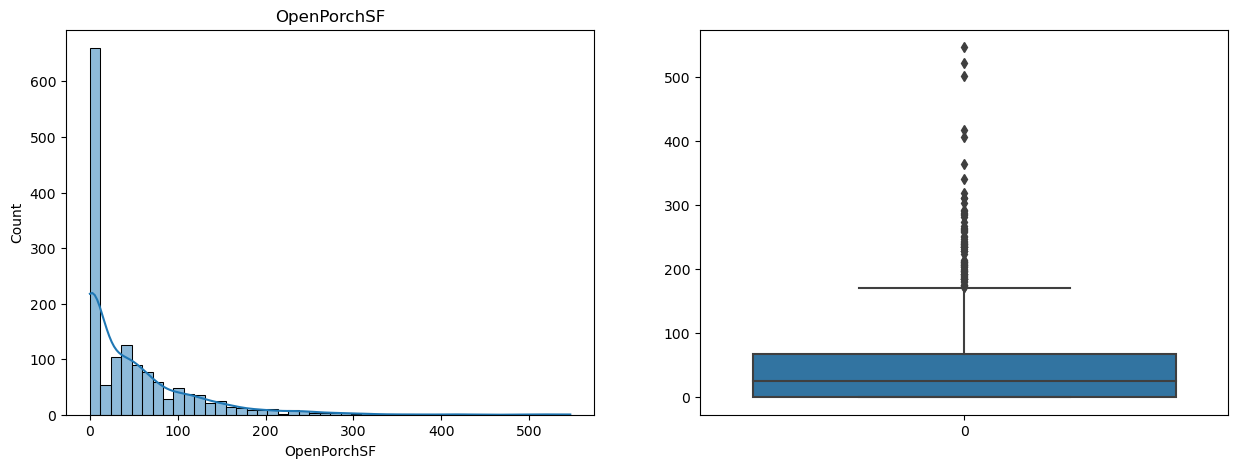

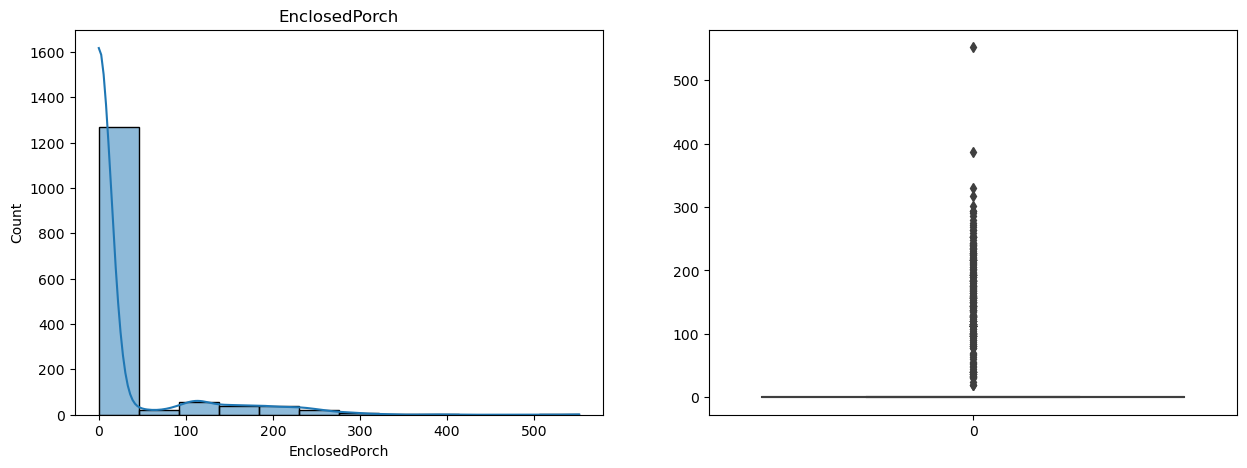

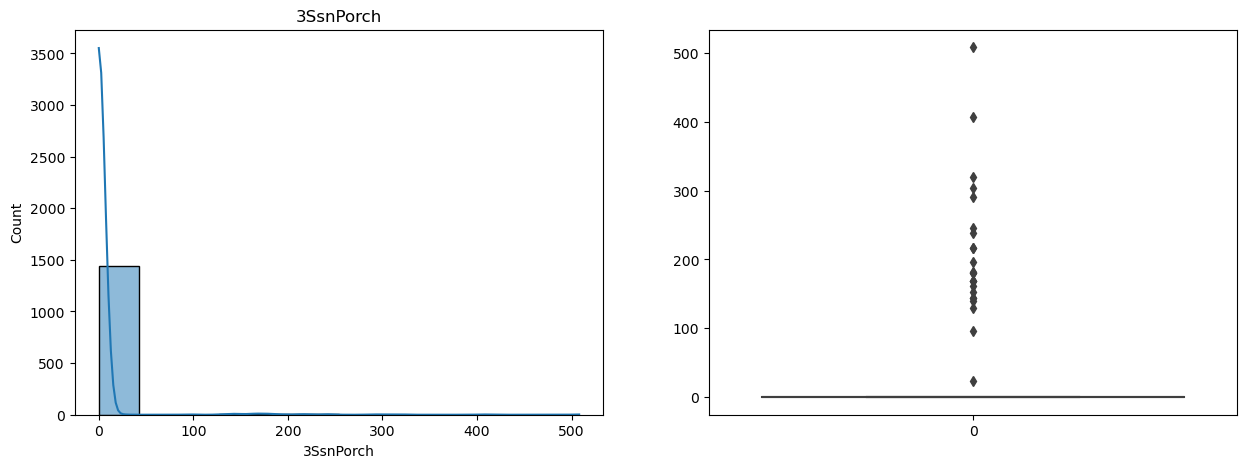

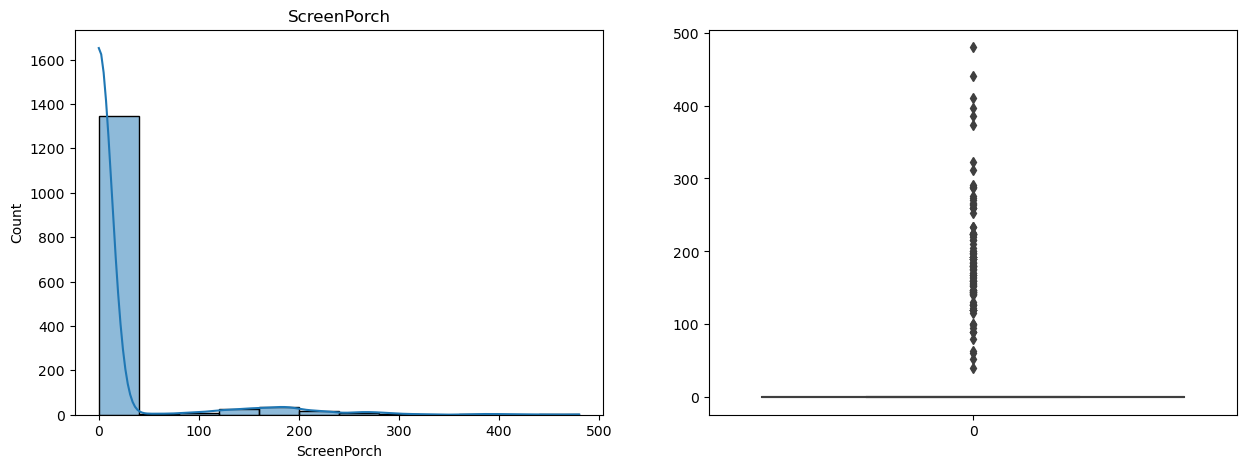

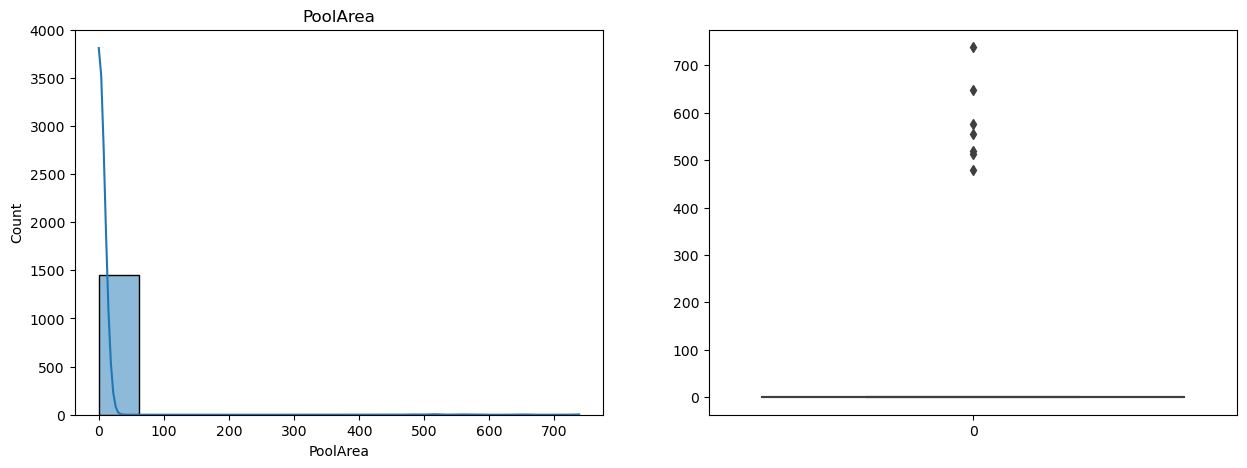

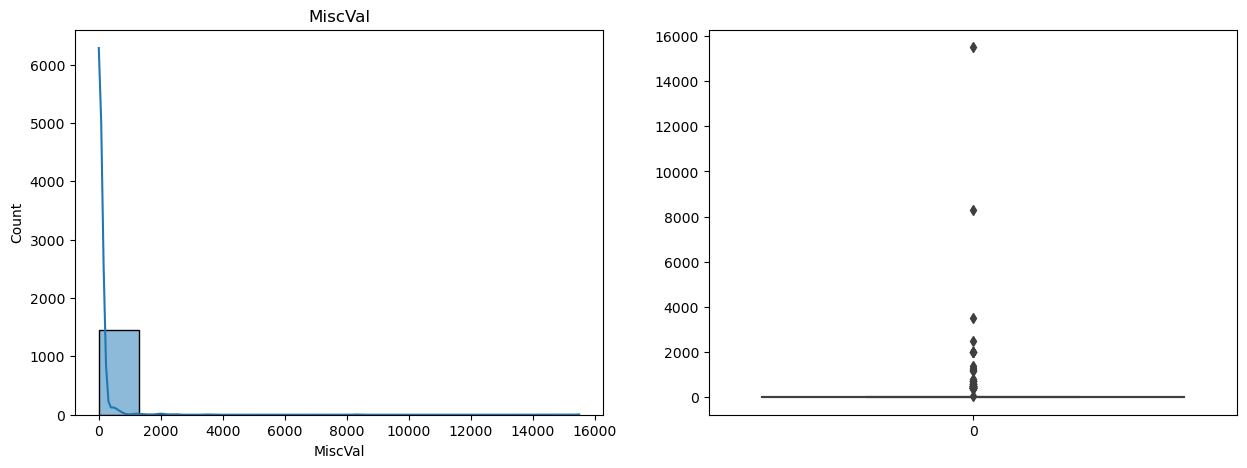

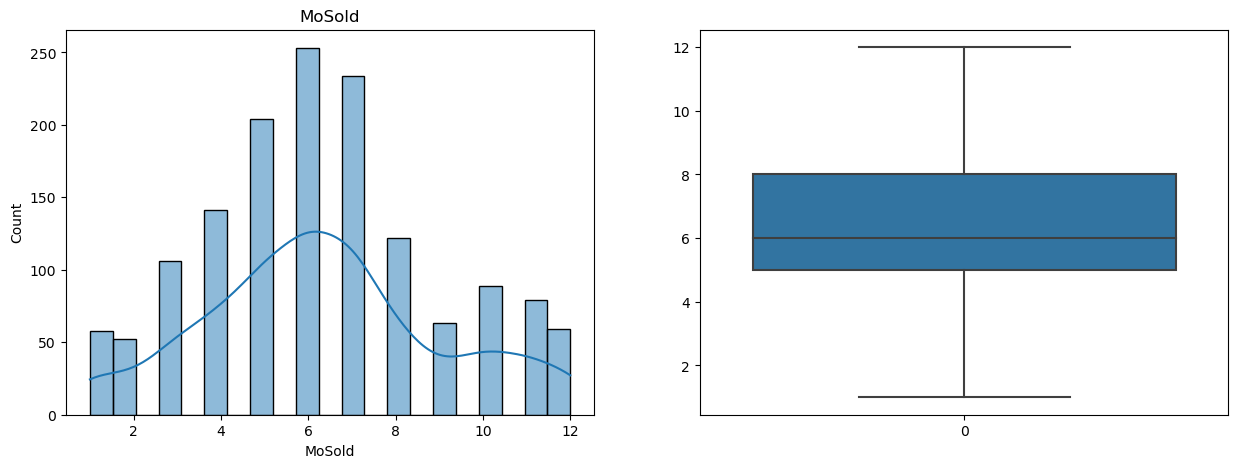

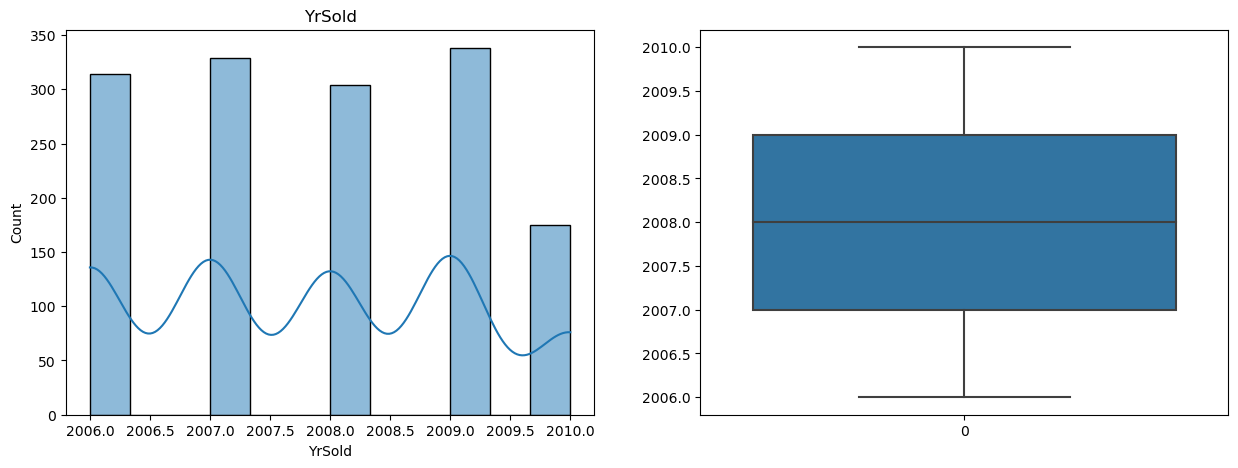

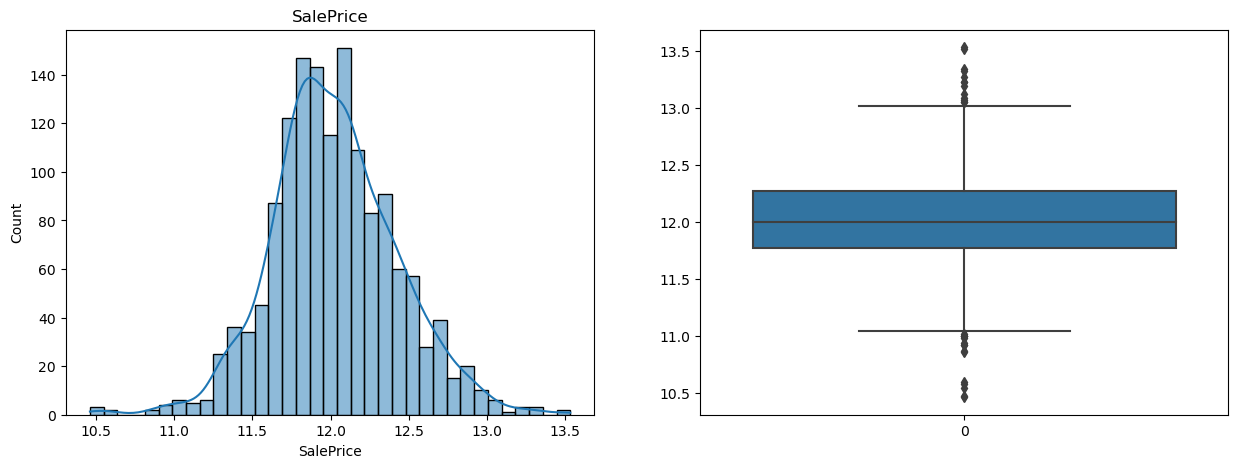

In [131]:
for col in house_cont.columns:
    plt.figure(figsize=(15,5))
    
    plt.subplot(1,2,1)
    plt.title(col)
    sns.histplot(house_cont[col],kde=True)
    plt.subplot(1,2,2)
    sns.boxplot(house_cont[col])
    plt.show()    

#### we can see certain outliers and non-normal distribution for most of the independent numerical variables.Although normal distribution of the independent variable is not a mandatory pre-requisite for inear regression but more the normality better can be the model. Outliers handling is required here too.

In [132]:
# After performing IQR based elimination of outliers found that almost 50% of data got removed. Hence decided to replace outliers with with the data 
#of 5 percentile and 95 percentile

for col in house_cont.columns:
    if col != 'SalePrice':
        house[col][house[col] <= house[col].quantile(0.05)] = house[col].quantile(0.05)
        house[col][house[col] >= house[col].quantile(0.95)] = house[col].quantile(0.95)

In [133]:
house.describe()

LotArea    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count   1460.000000  1460.000000   1460.000000  1460.000000  1460.000000   
mean    9682.319212  1971.787671   1984.794521    92.047945   431.089041   
std     3469.967624    28.872129     20.565620   140.590668   412.214952   
min     3311.700000  1916.000000   1950.000000     0.000000     0.000000   
25%     7553.500000  1954.000000   1967.000000     0.000000     0.000000   
50%     9478.500000  1973.000000   1994.000000     0.000000   383.500000   
75%    11601.500000  2000.000000   2004.000000   164.250000   712.250000   
max    17401.150000  2007.000000   2007.000000   456.000000  1274.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  ...  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000  ...   
mean     32.931233   556.537671  1055.950616  1151.861370   337.731267  ...   
std     100.569218   414.582219   346.901853   333.684061   415.255848  ...   
min       0.000000     0.000000   519.300000   672.950000     0.000000  ...   
25%       0.000000   223.000000   795.750000   882.000000     0.000000  ...   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000  ...   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000  ...   
max     396.200000  1468.000000  1753.000000  1831.250000  1141.050000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000     1460.0  1460.000000   
mean     88.889726    42.864829      19.154075        0.0    11.580822   
std     109.391899    53.144211      50.385647        0.0    40.117506   
min       0.000000     0.000000       0.000000        0.0     0.000000   
25%       0.000000     0.000000       0.000000        0.0     0.000000   
50%       0.000000    25.000000       0.000000        0.0     0.000000   
75%     168.000000    68.000000       0.000000        0.0     0.000000   
max     335.000000   175.050000     180.150000        0.0   160.000000   

       PoolArea  MiscVal       MoSold       YrSold    SalePrice  
count    1460.0   1460.0  1460.000000  1460.000000  1460.000000  
mean        0.0      0.0     6.321233  2007.815753    12.024051  
std         0.0      0.0     2.550967     1.328095     0.399452  
min         0.0      0.0     2.000000  2006.000000    10.460242  
25%         0.0      0.0     5.000000  2007.000000    11.775097  
50%         0.0      0.0     6.000000  2008.000000    12.001505  
75%         0.0      0.0     8.000000  2009.000000    12.273731  
max         0.0      0.0    11.000000  2010.000000    13.534473  

[8 rows x 32 columns]

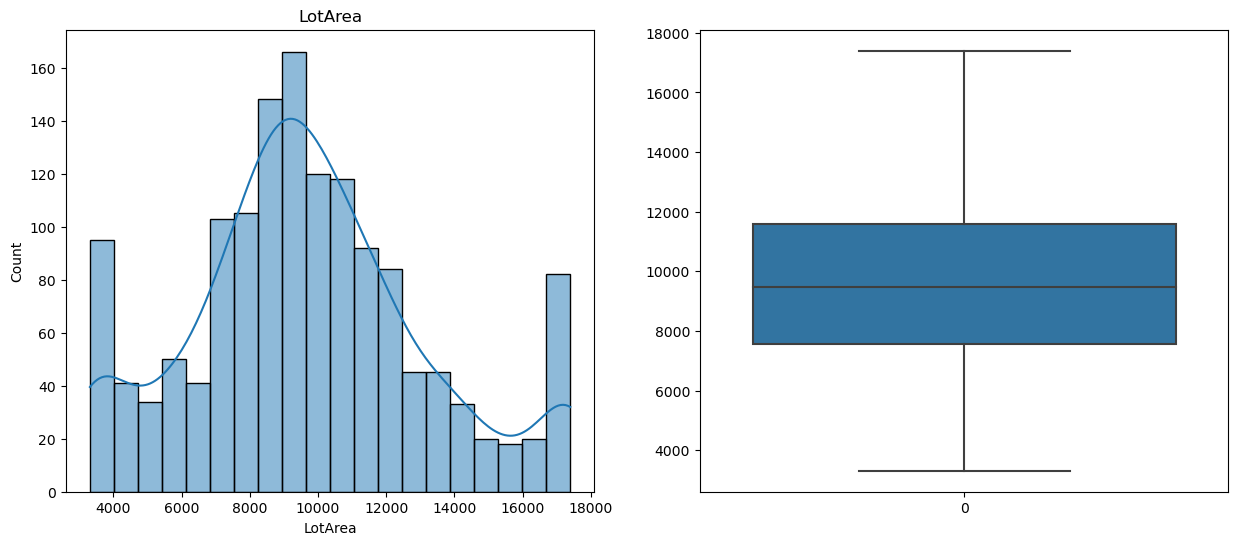

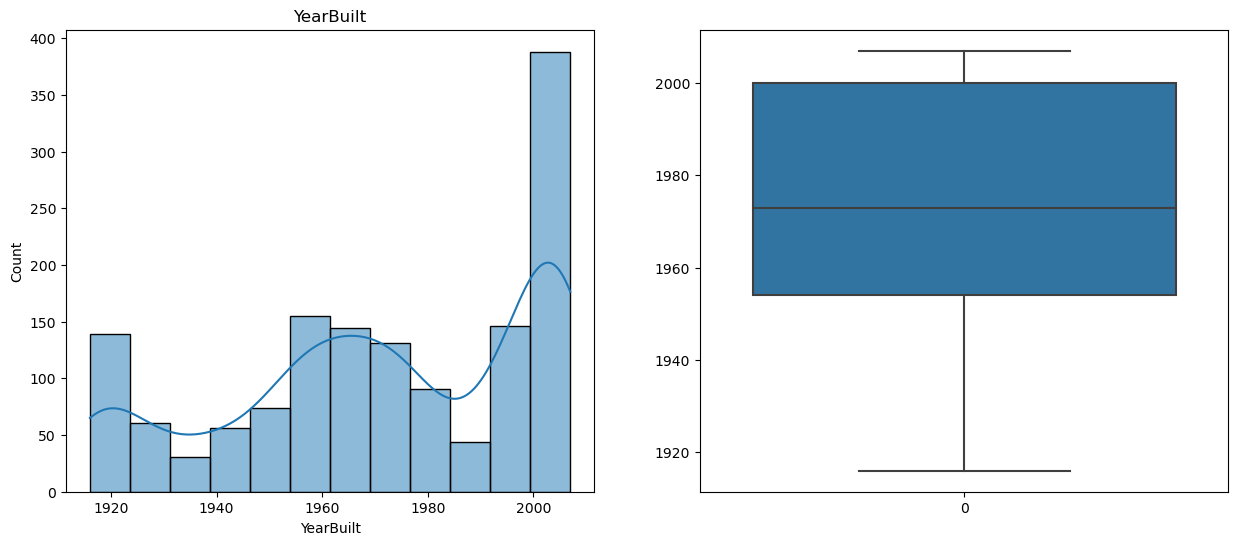

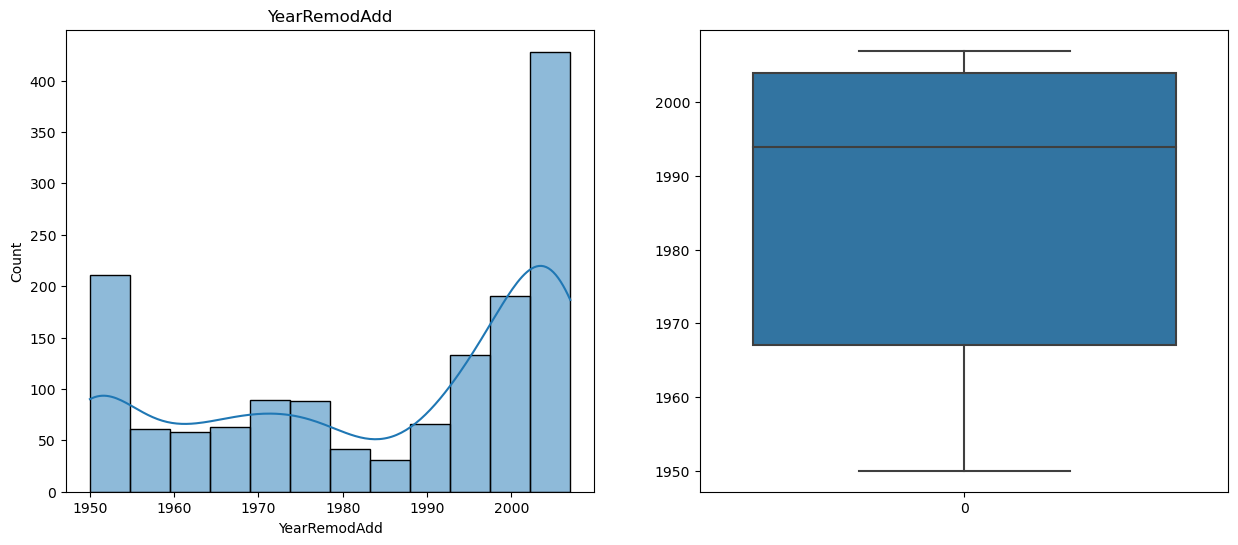

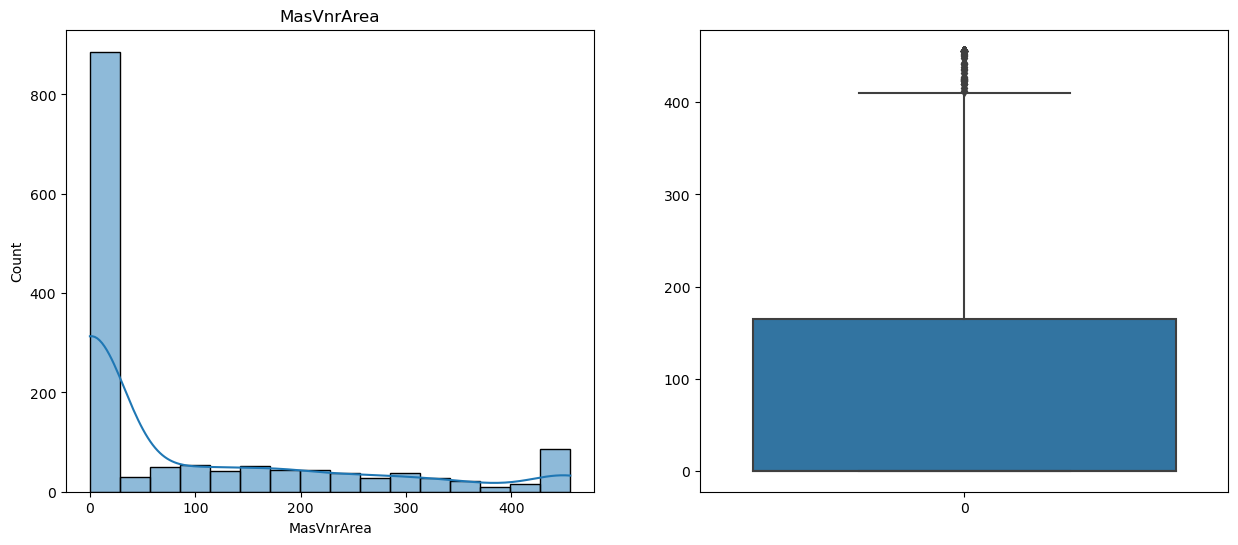

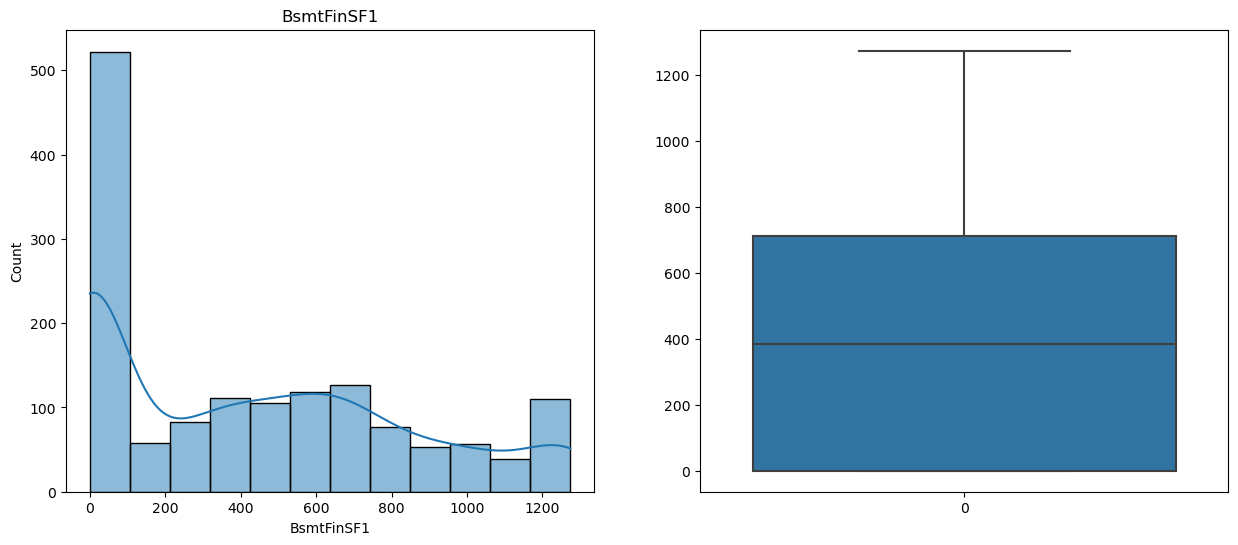

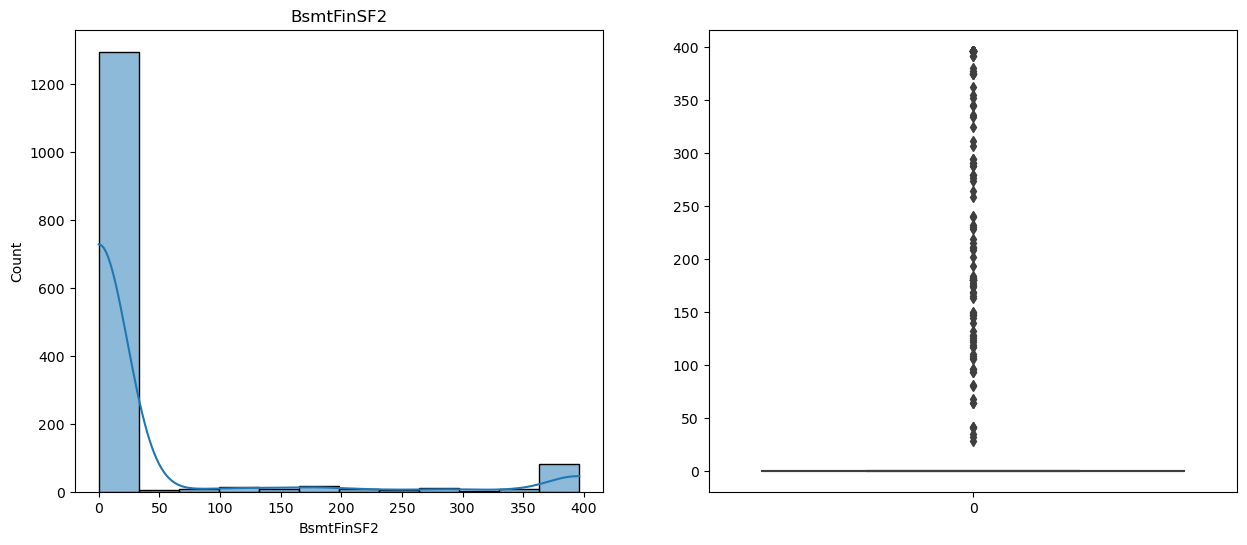

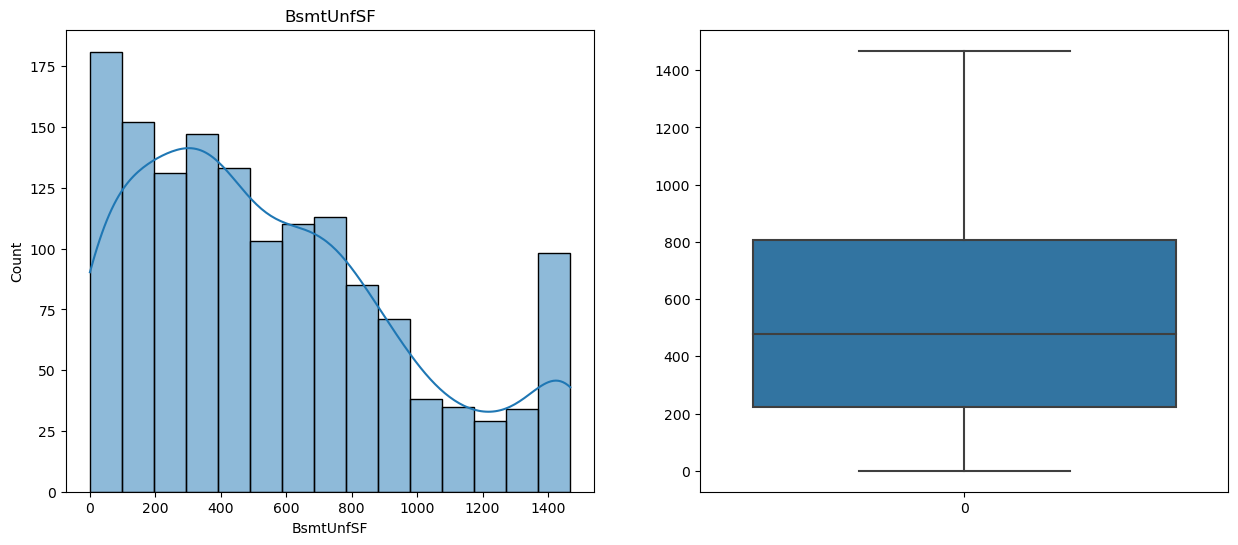

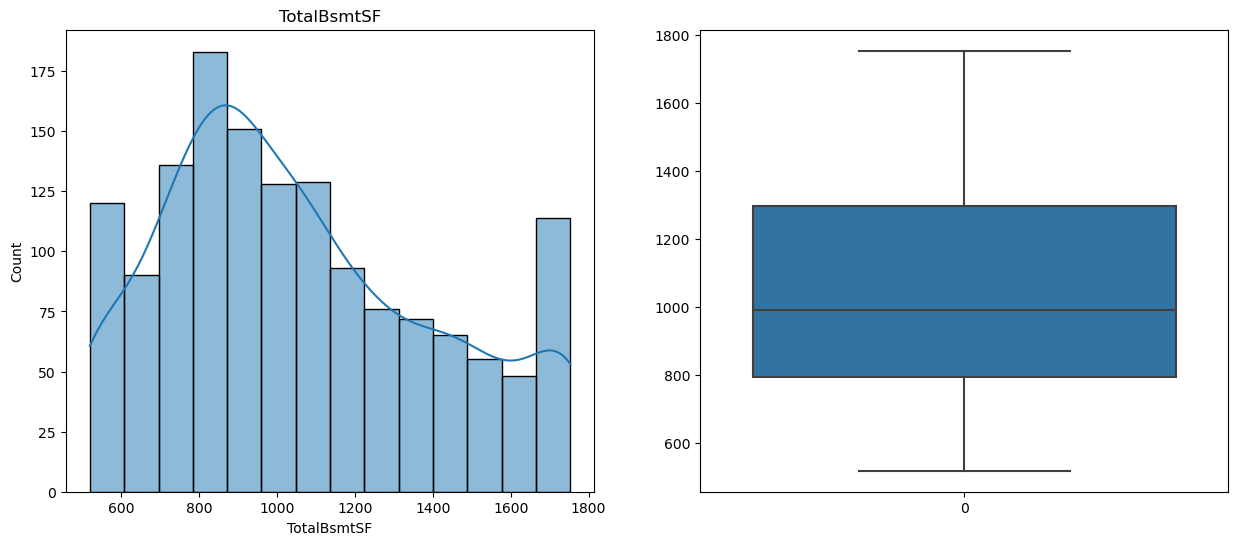

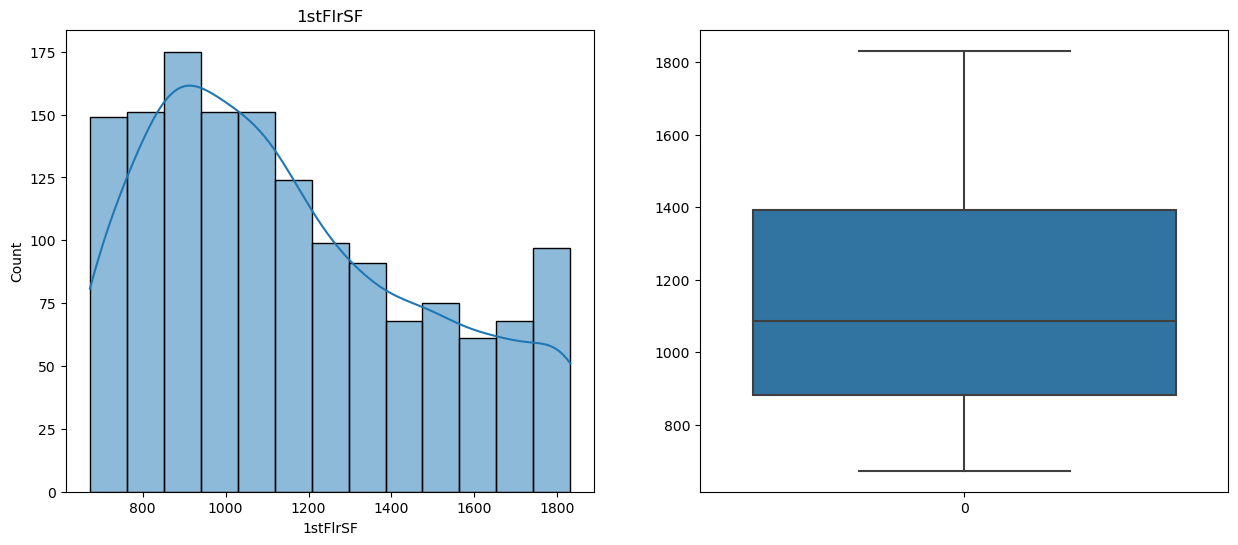

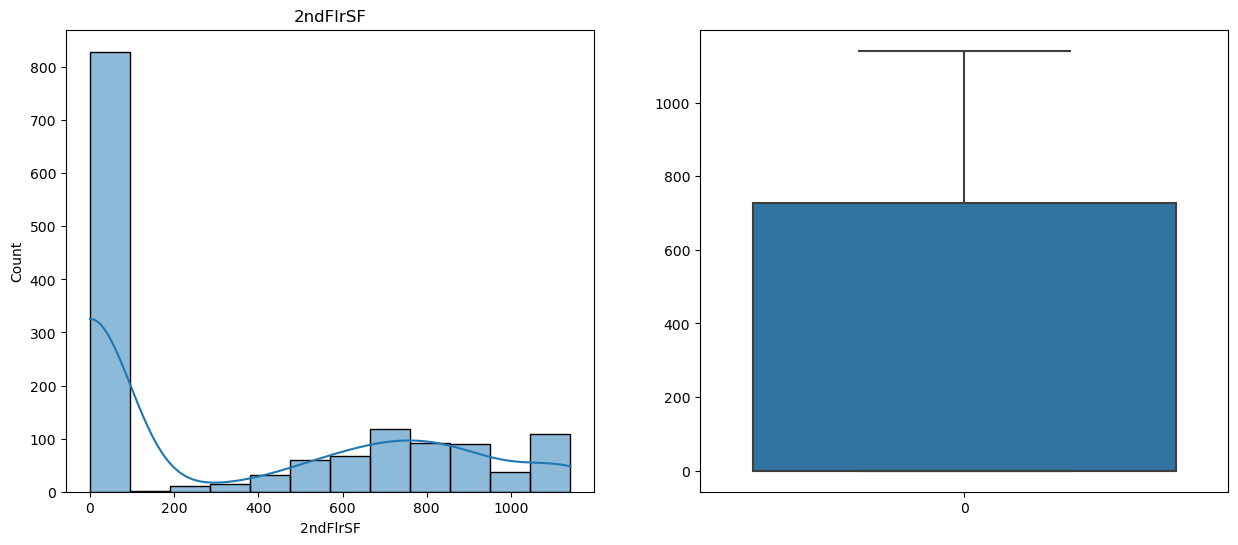

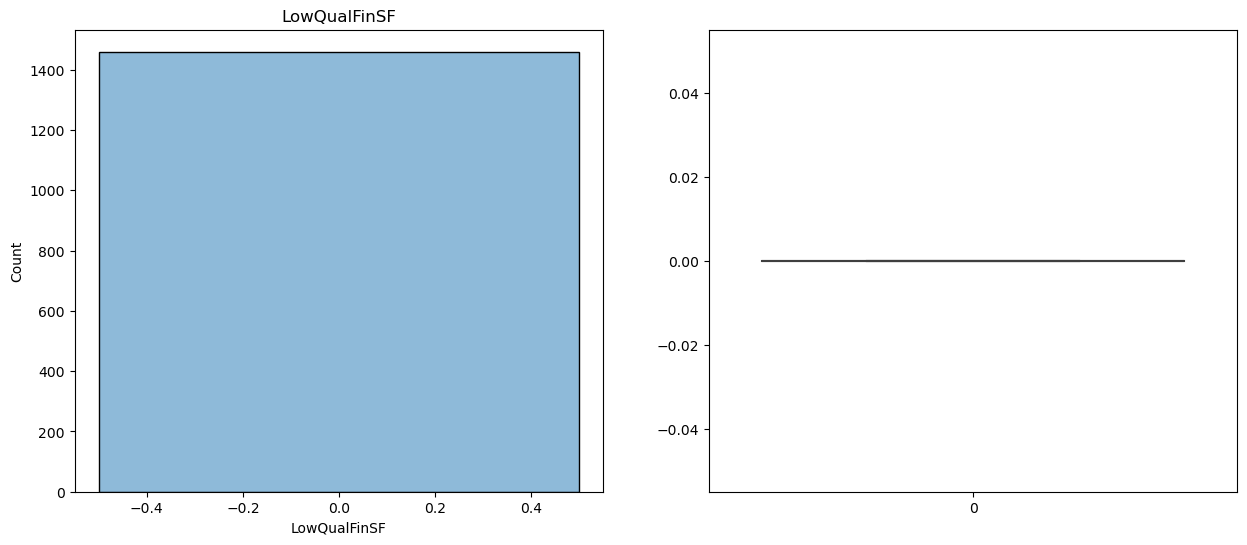

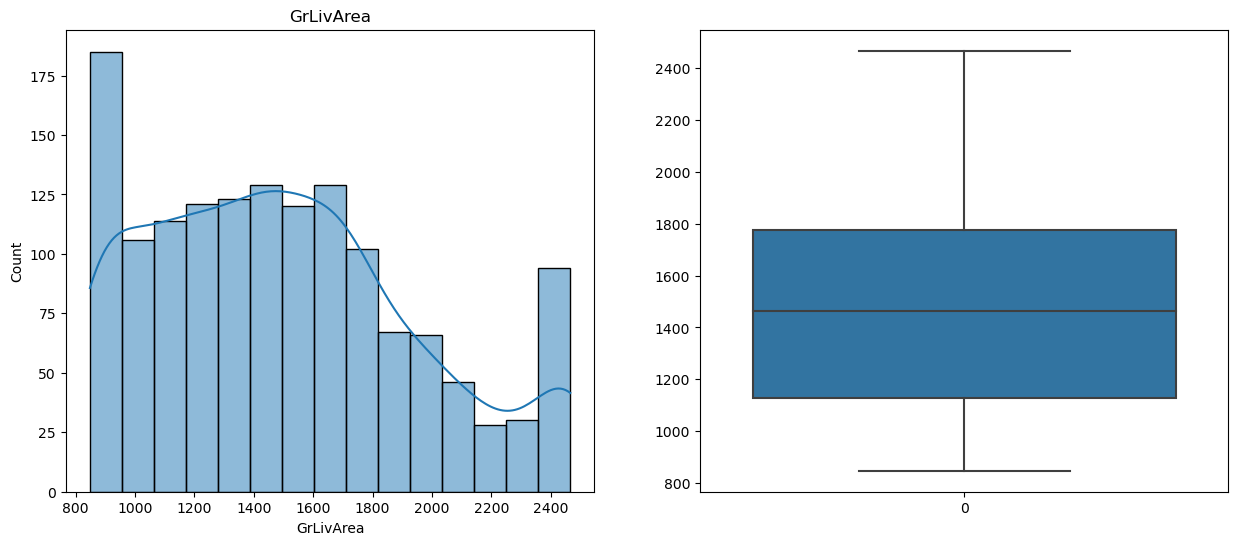

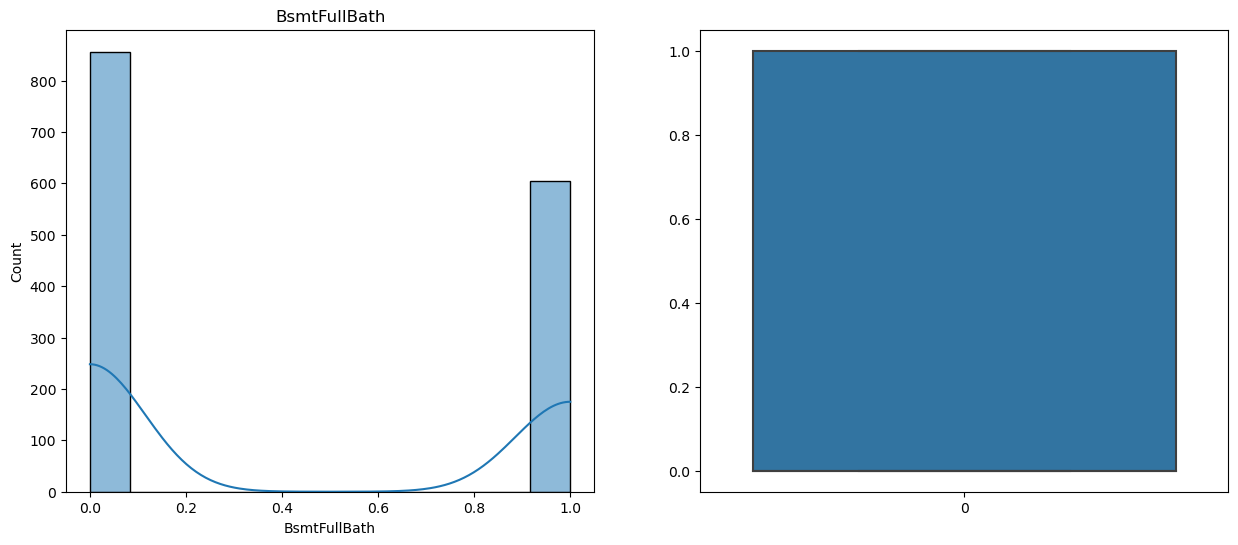

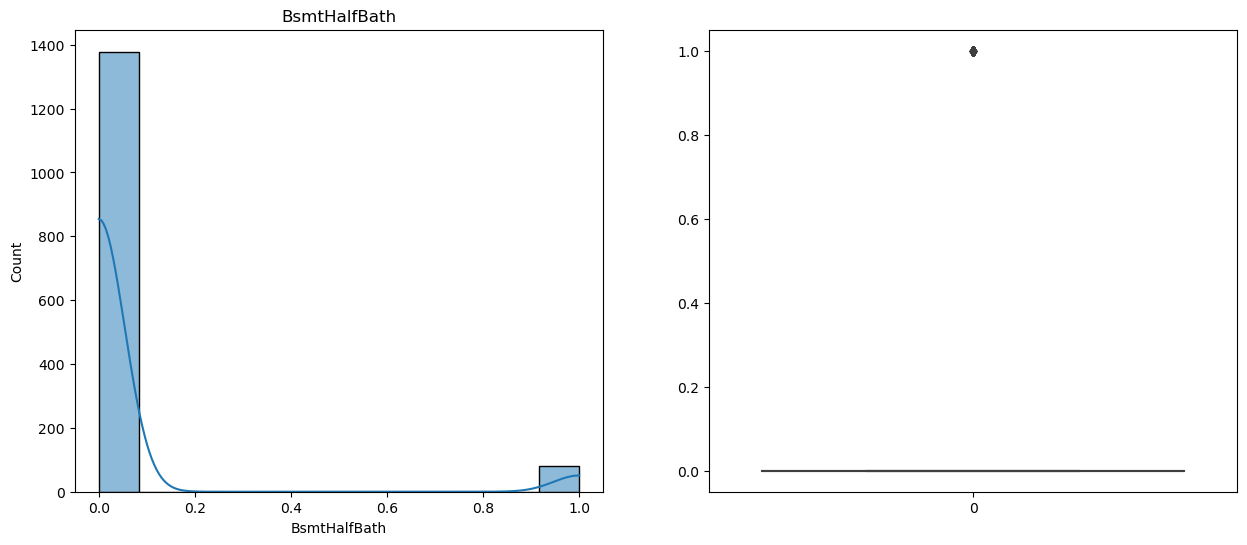

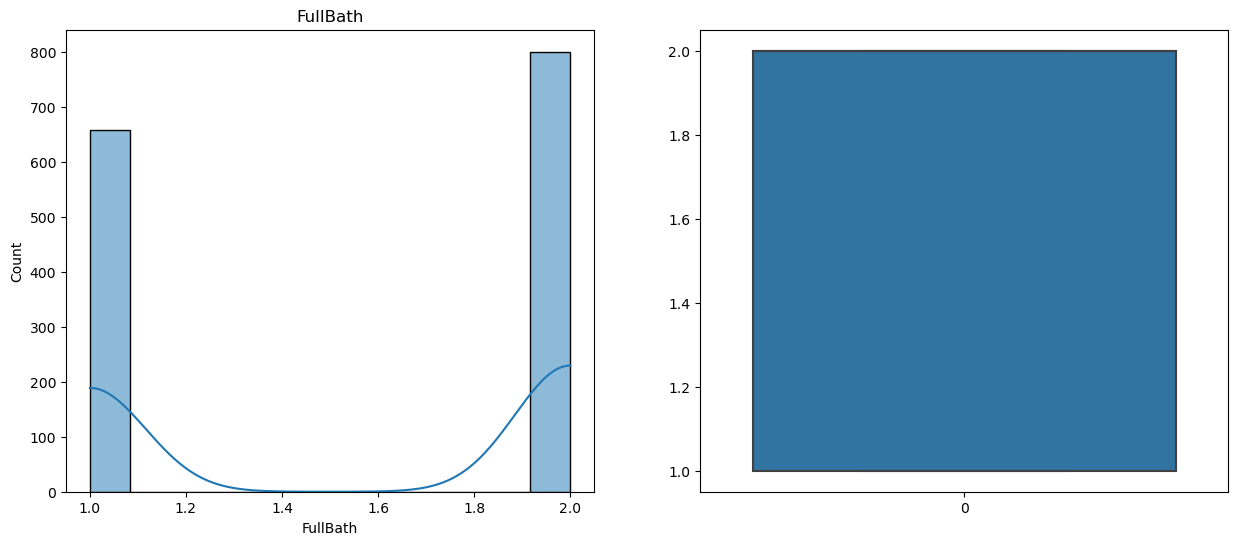

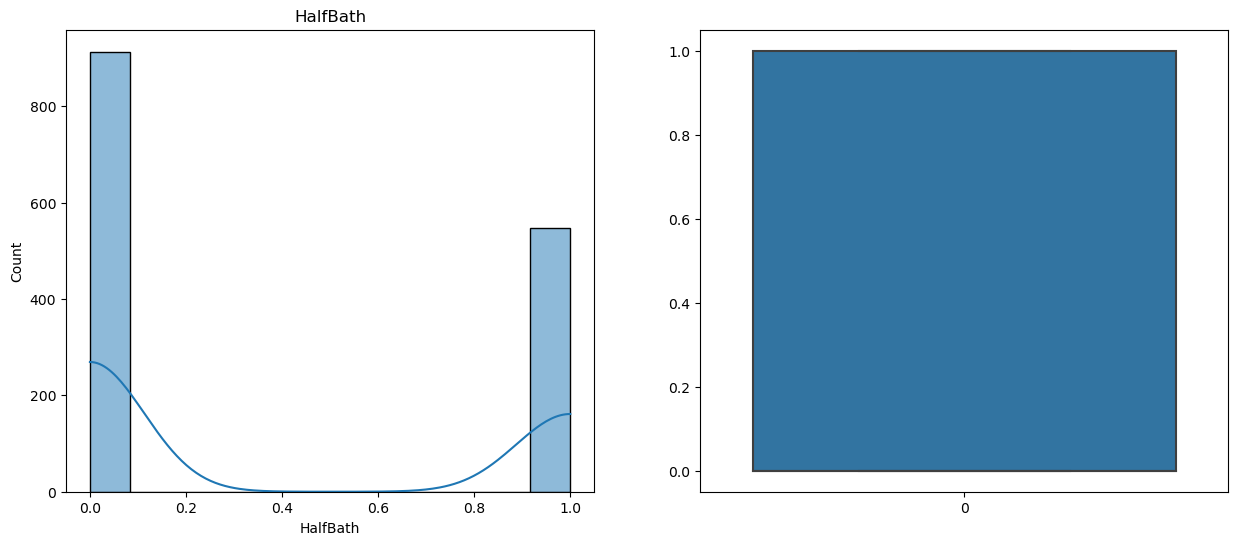

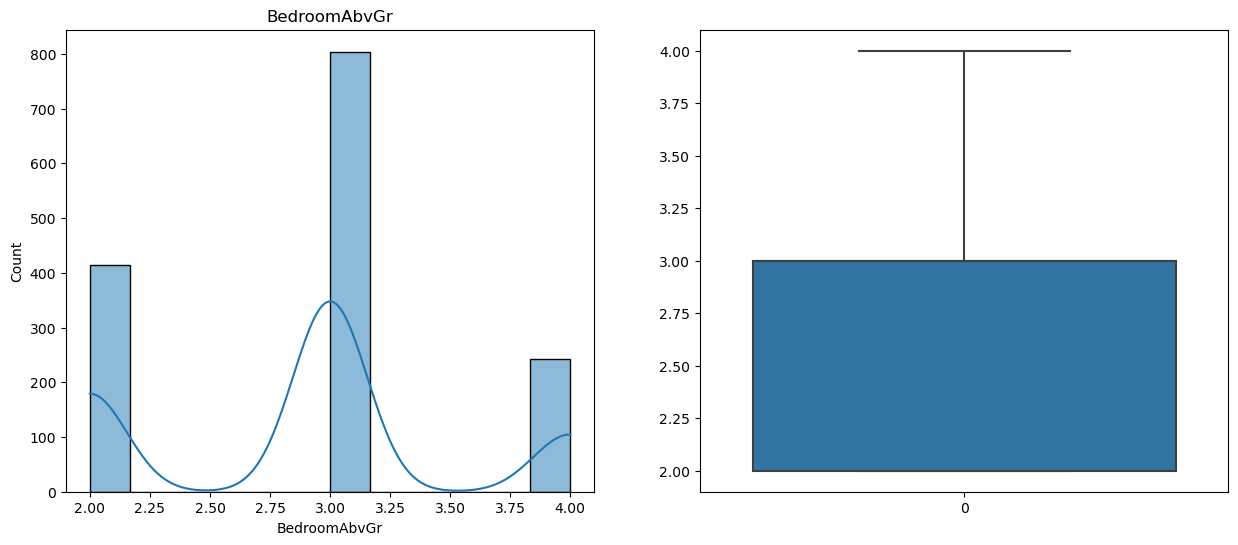

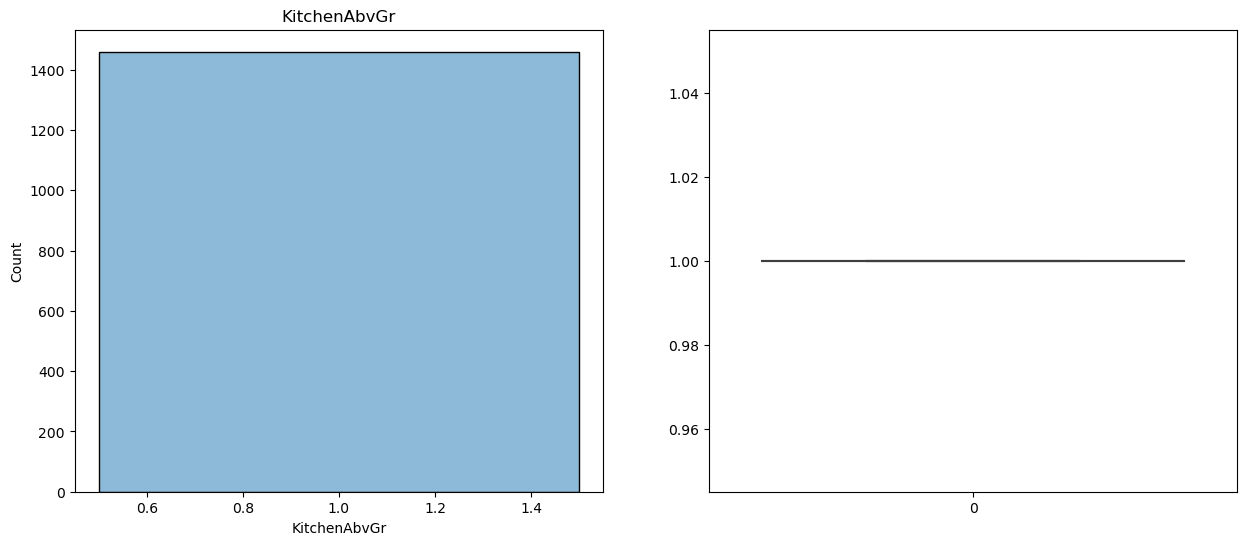

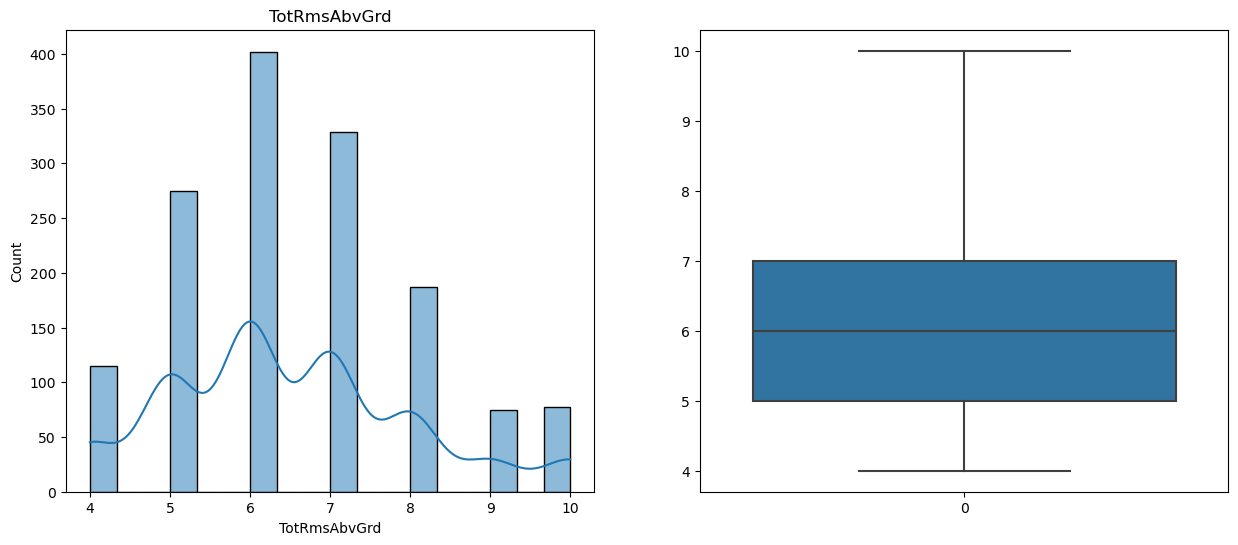

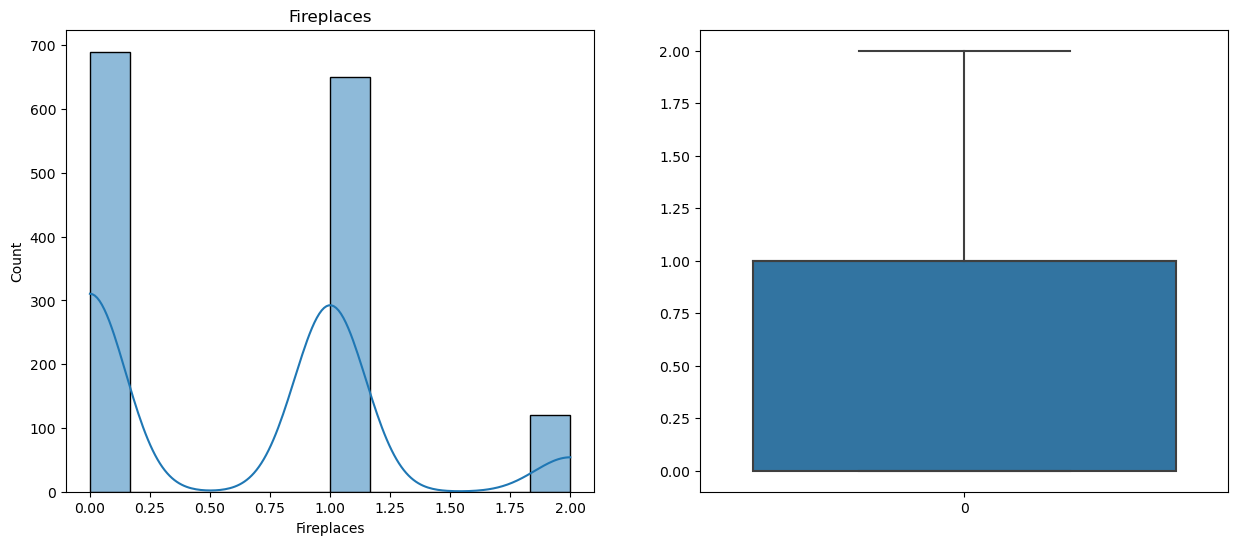

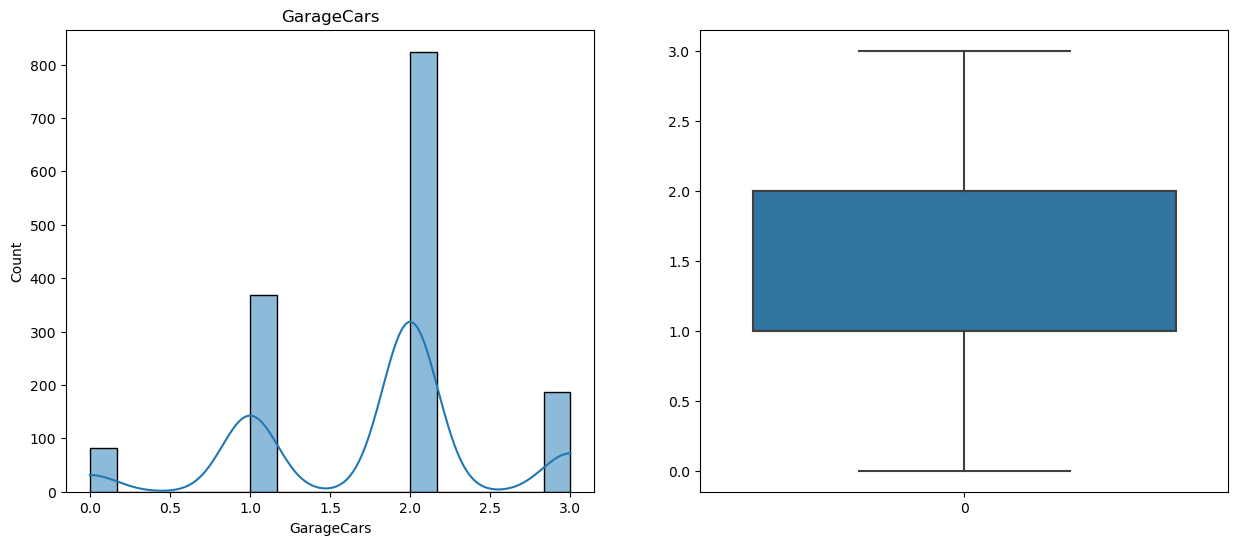

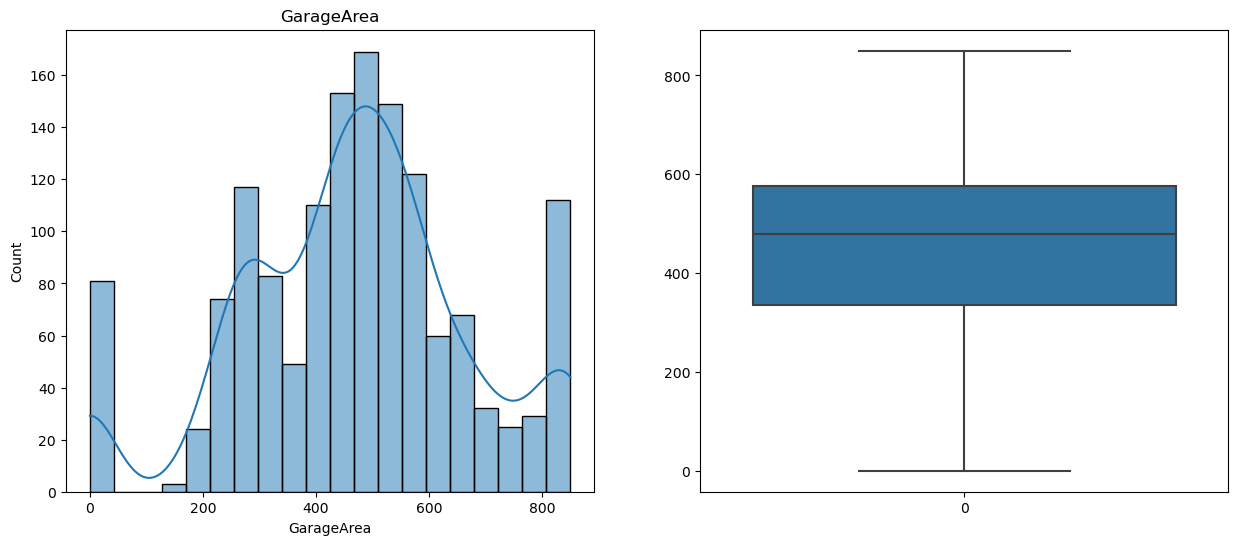

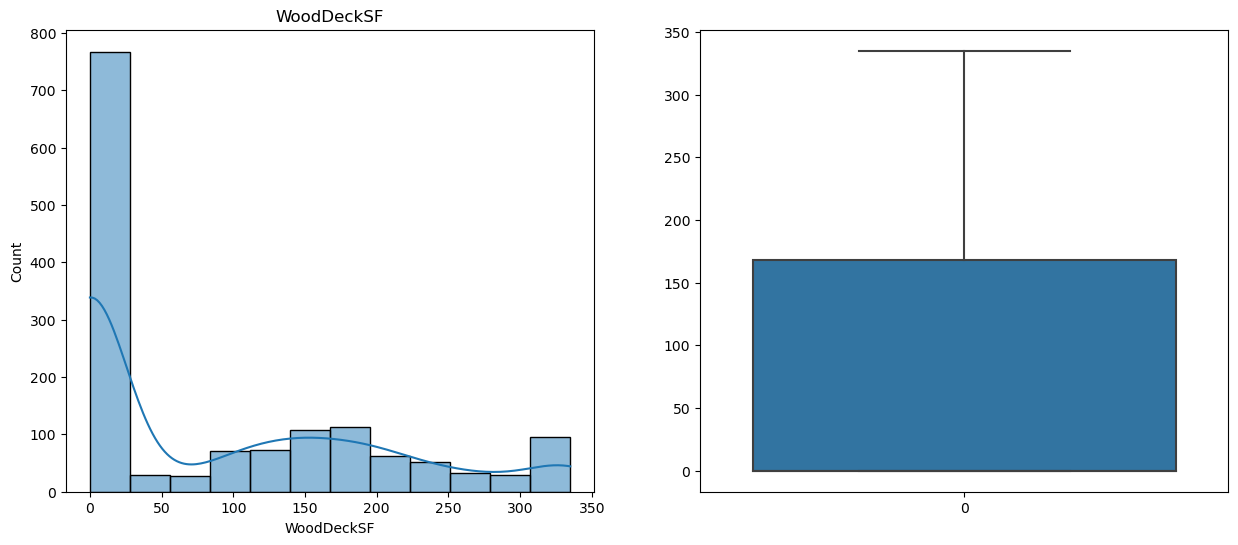

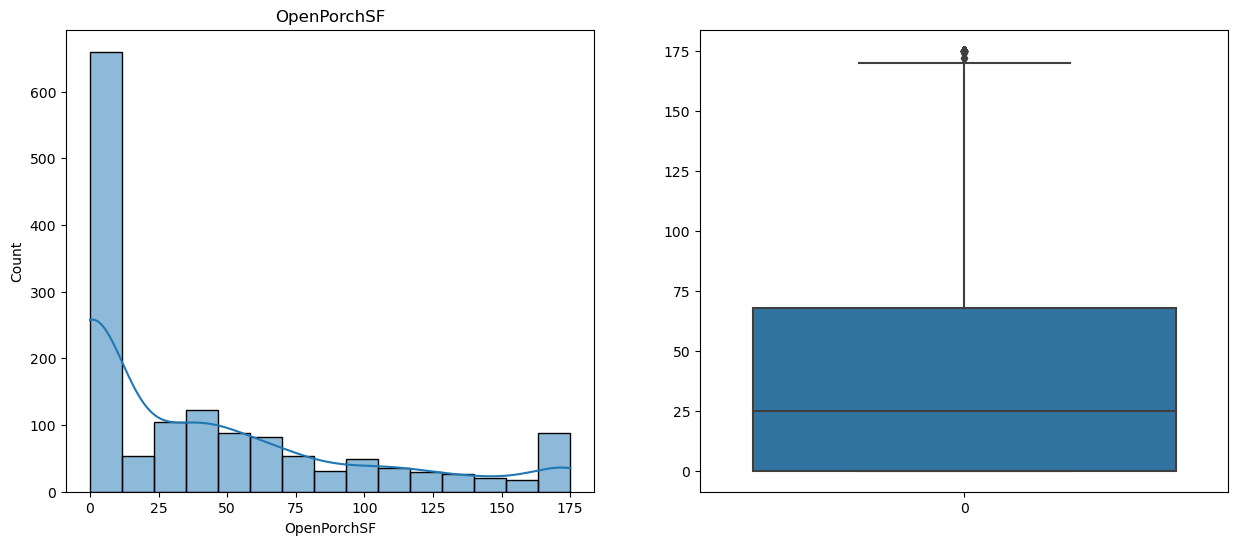

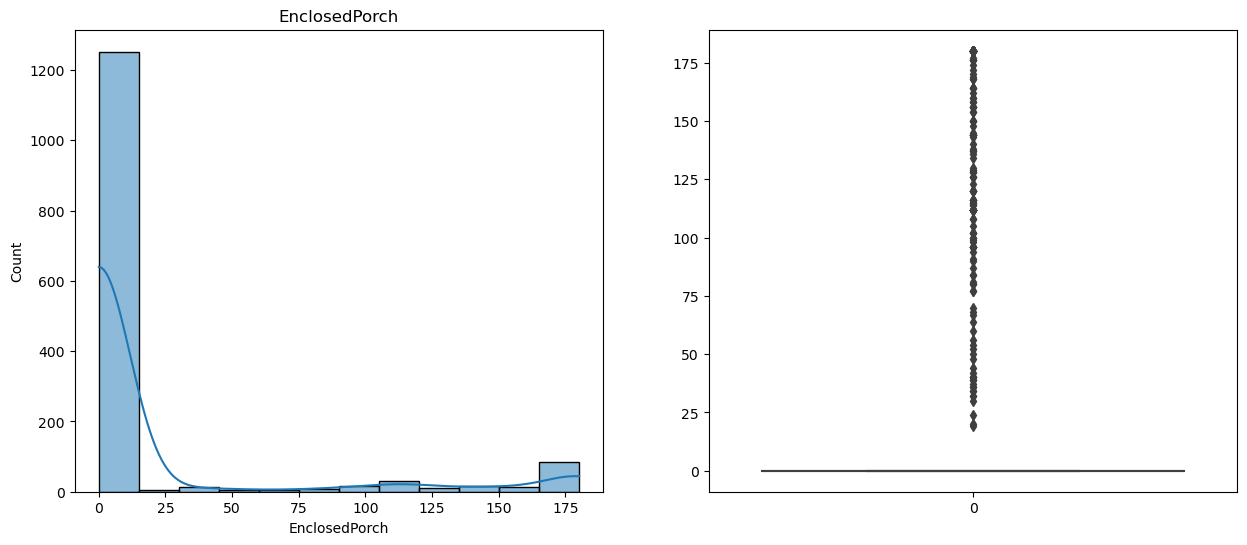

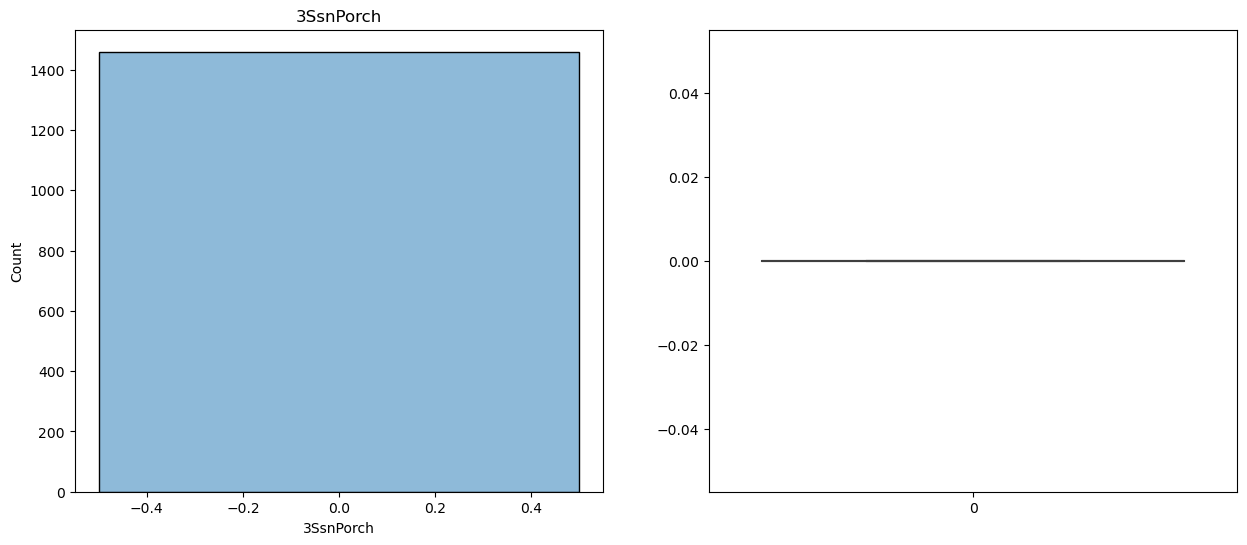

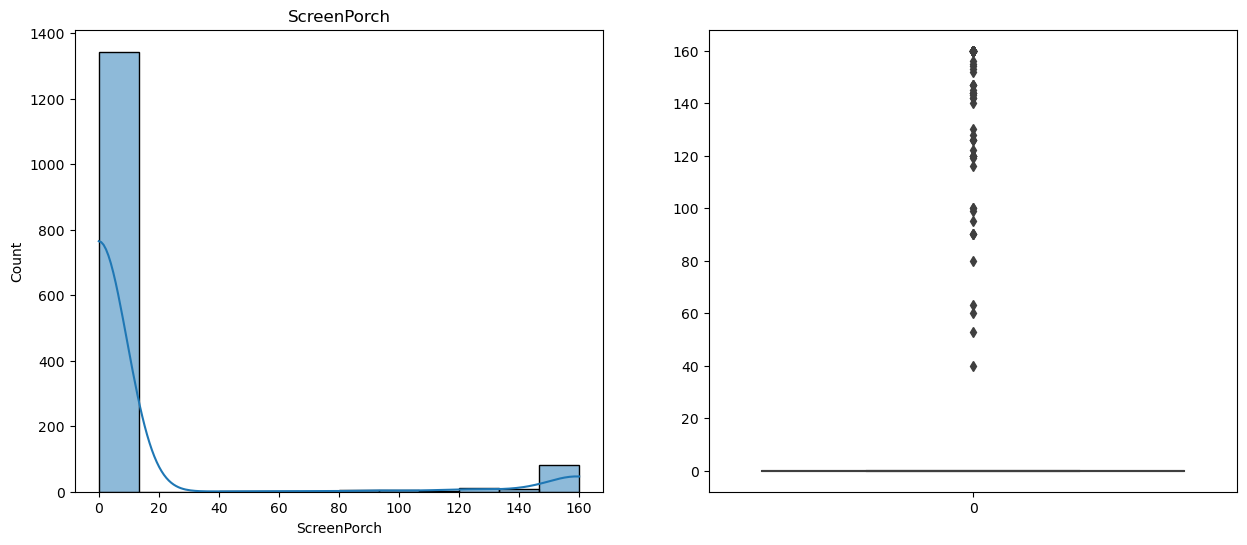

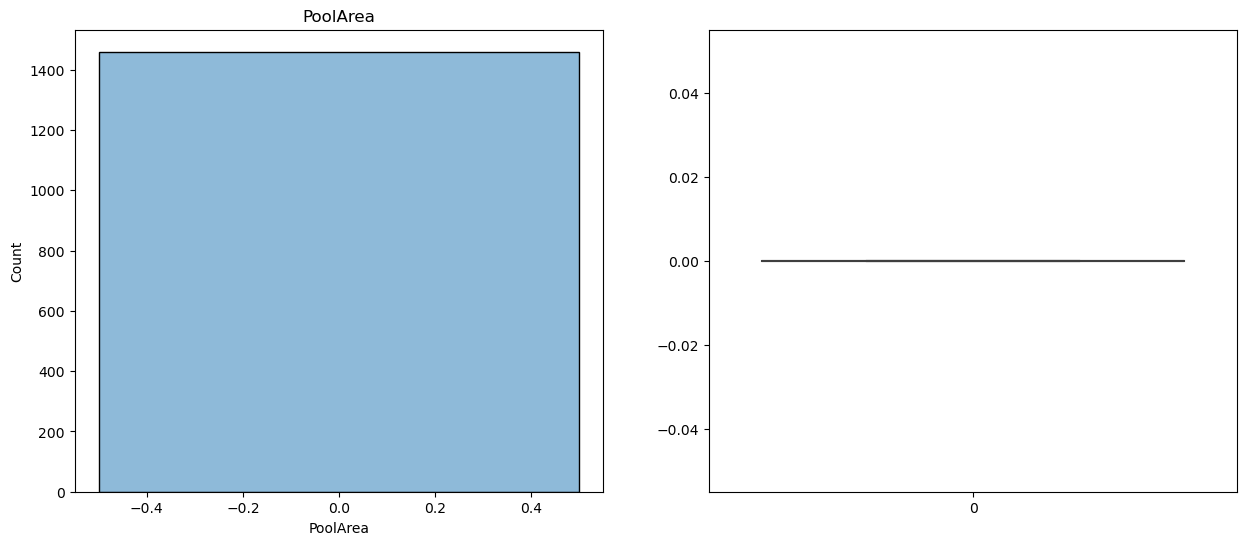

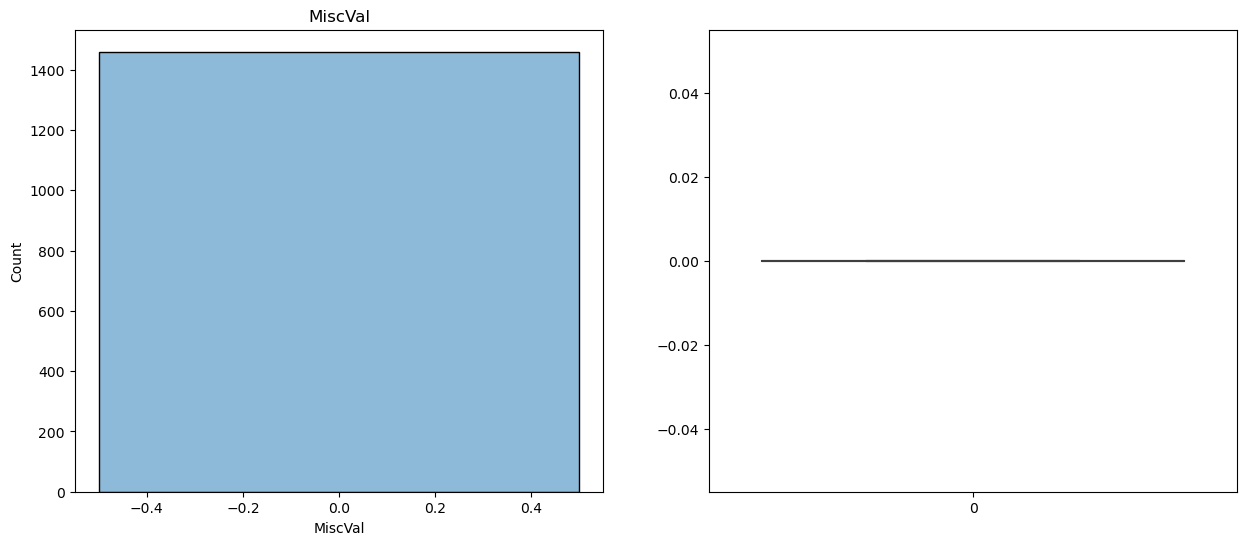

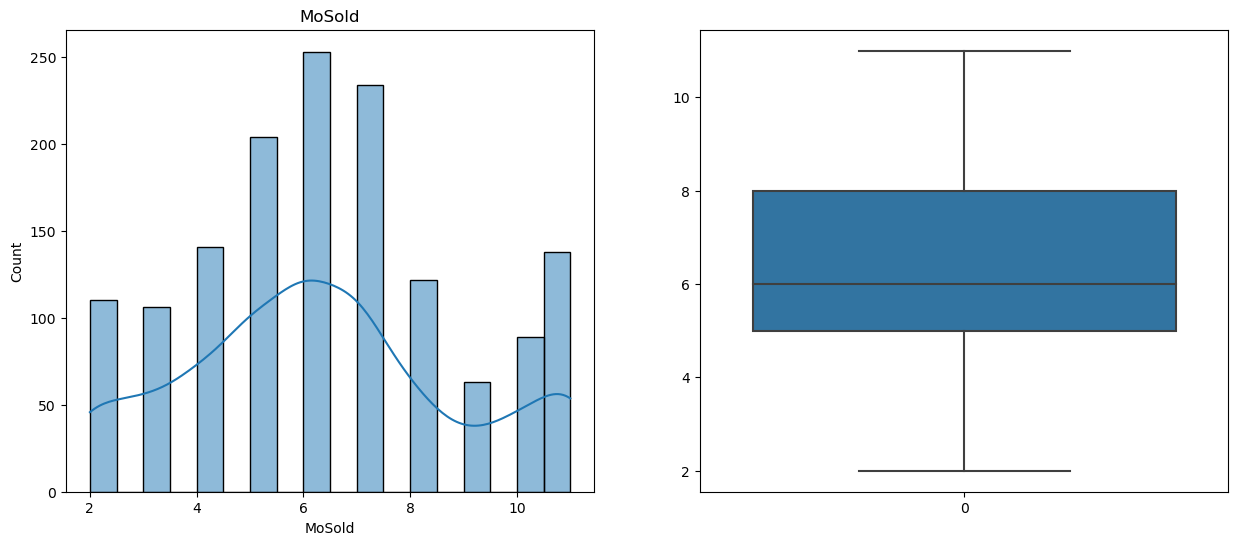

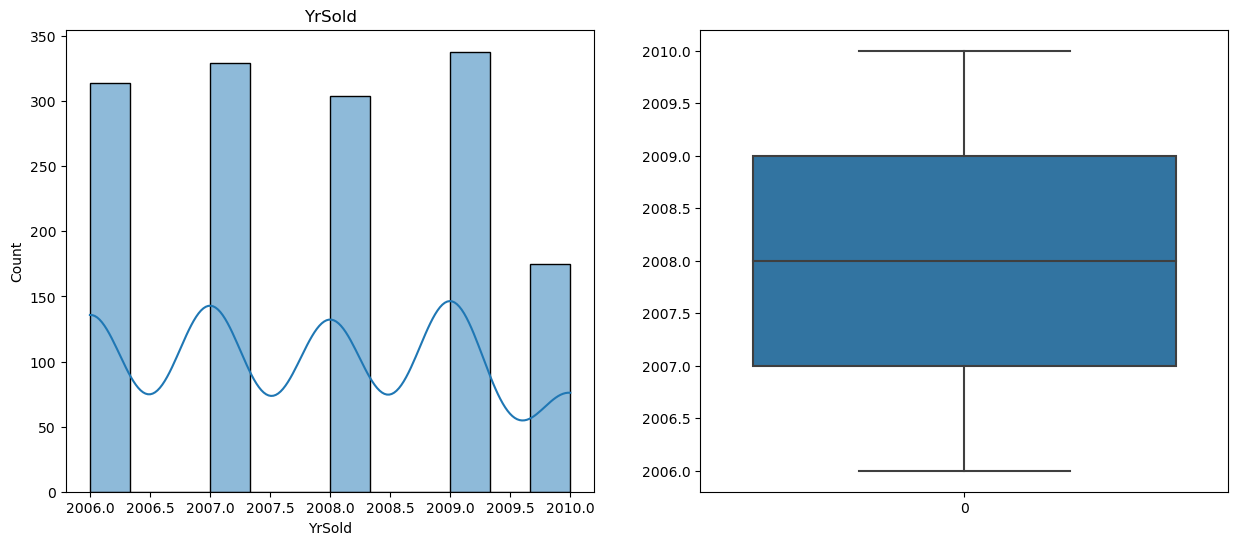

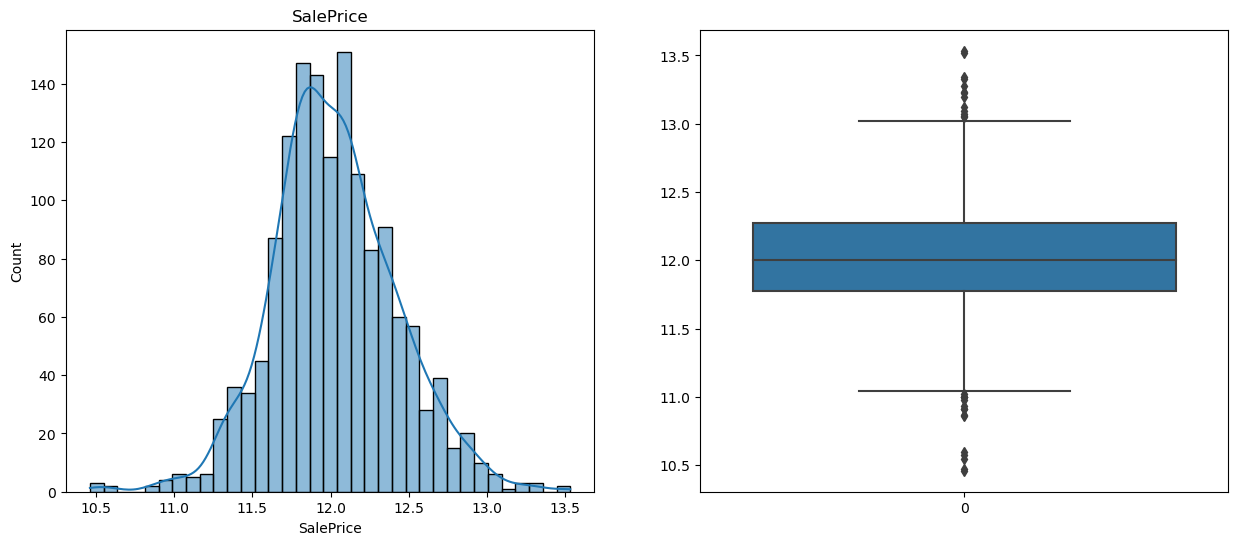

In [134]:
# Once more plot the data after removing imputing outliers

for col in house_cont.columns:
    plt.figure(figsize=(15,6))
    plt.subplot(1,2,1)
    plt.title(col)
    sns.histplot(house[col],kde=True)
    plt.subplot(1,2,2)
    sns.boxplot(house[col])

# From the boxplots now we see better outliers state after handlig.  

### Univariate analysis of categorical variables

In [135]:
house_cat = house.select_dtypes('object')
house_cat.columns

Index(['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQual', 'Functional', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

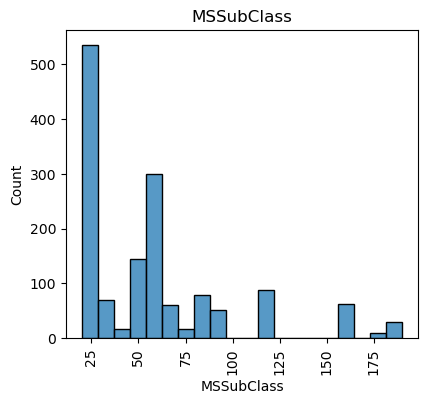

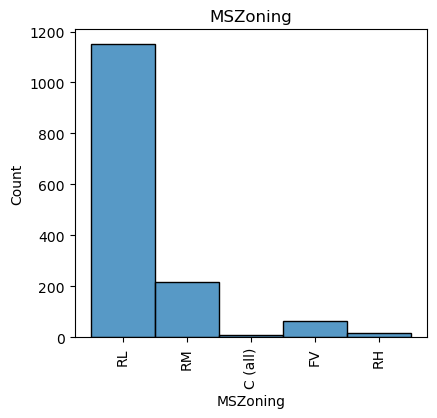

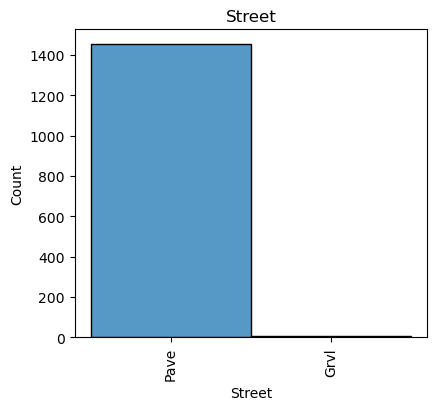

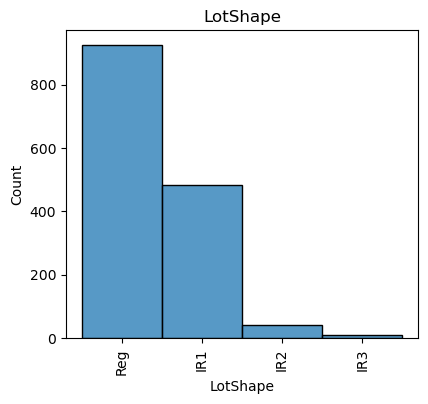

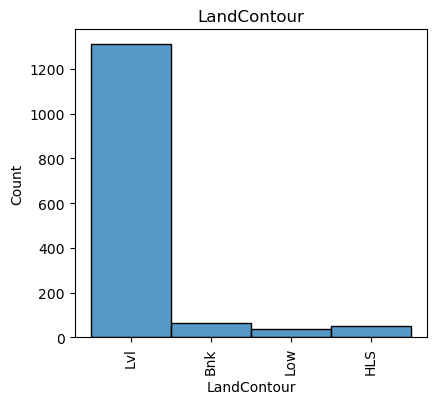

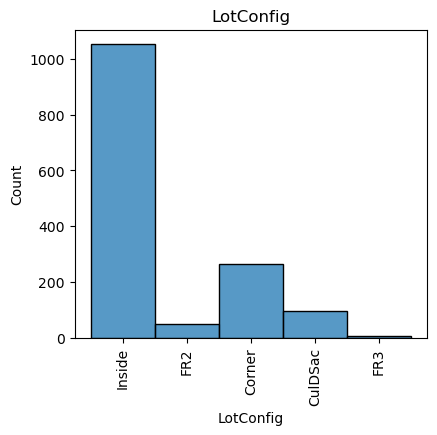

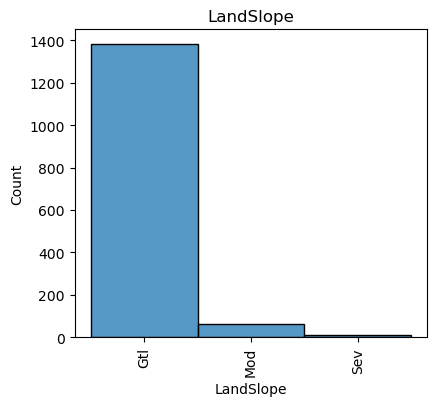

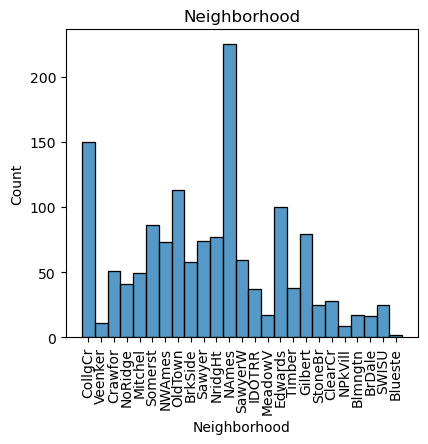

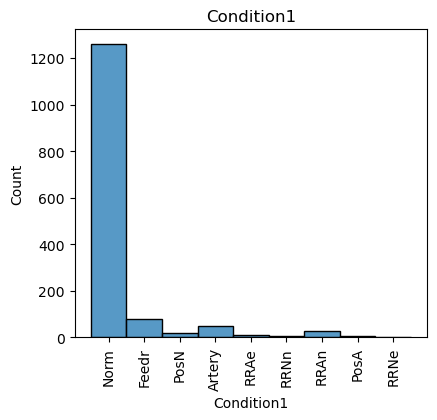

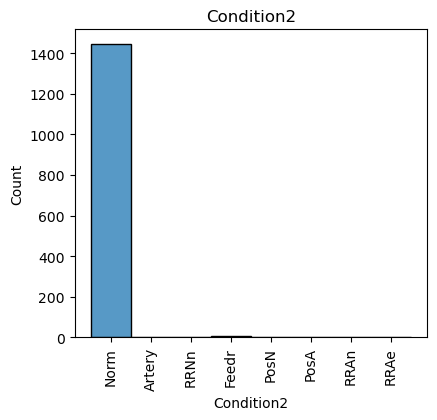

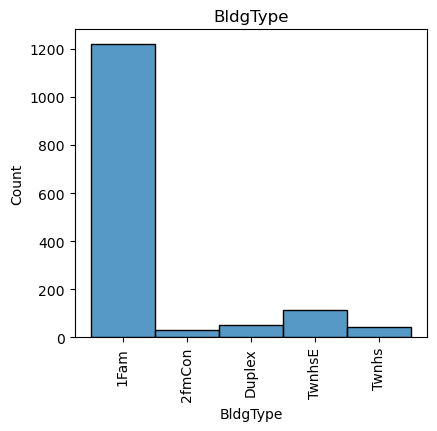

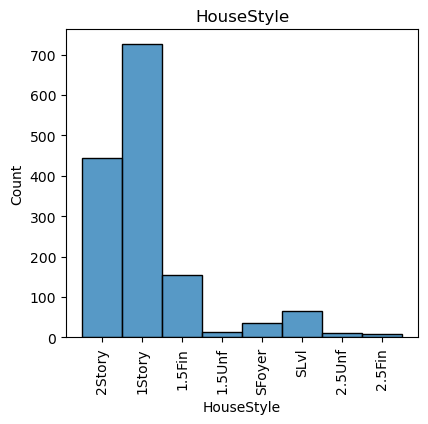

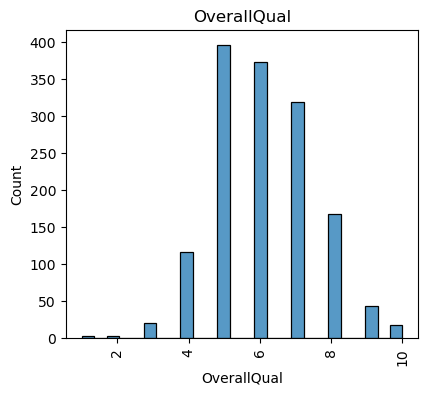

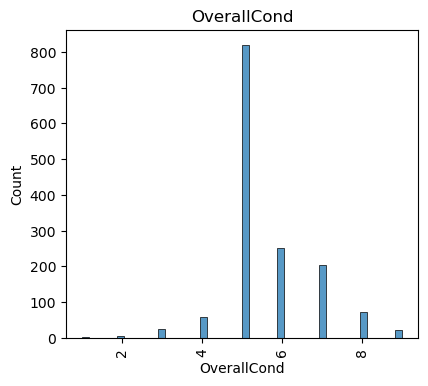

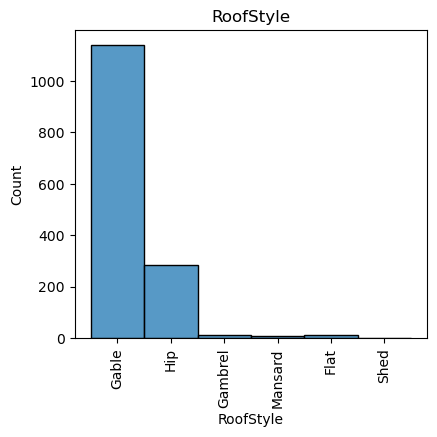

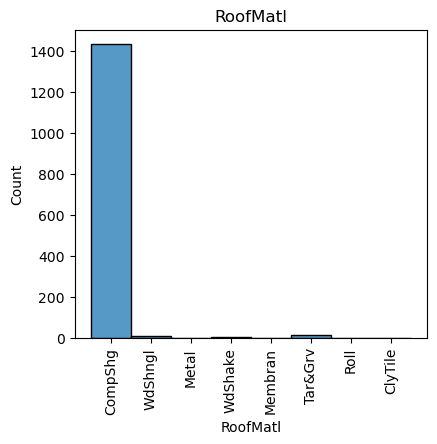

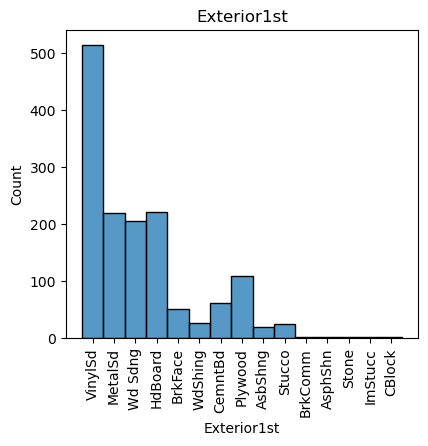

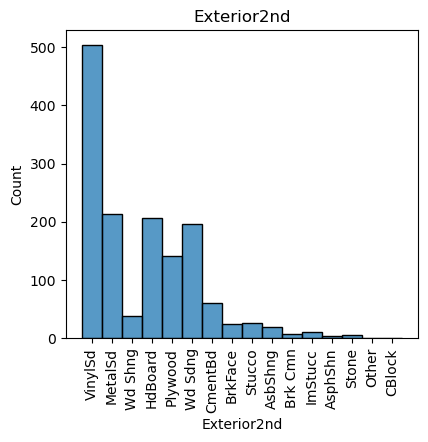

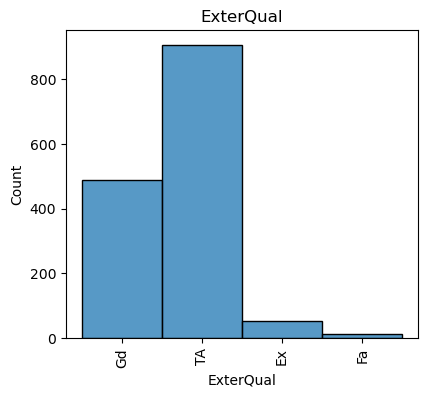

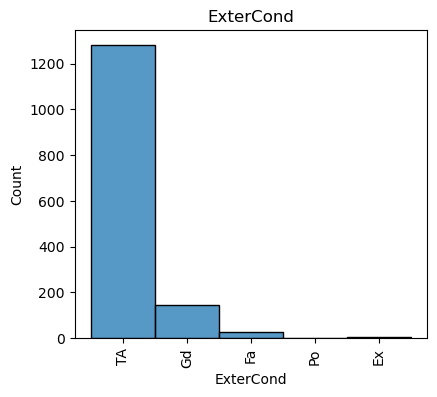

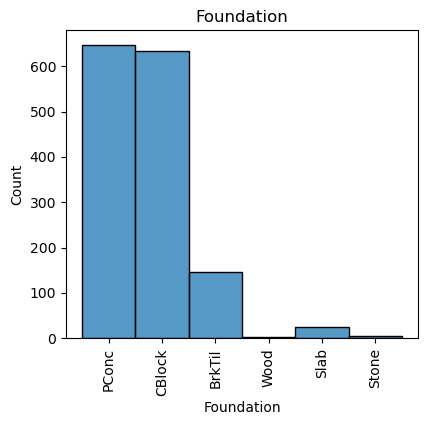

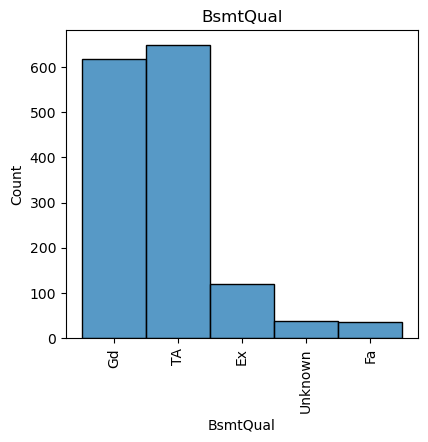

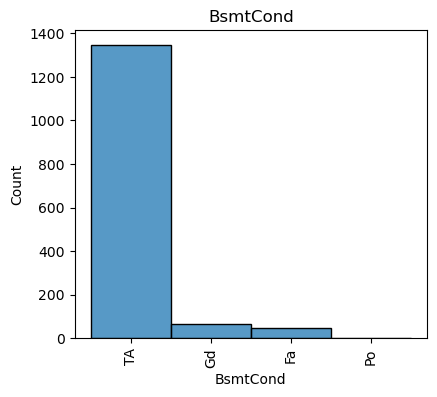

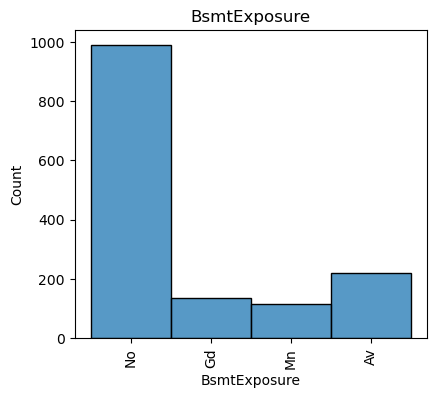

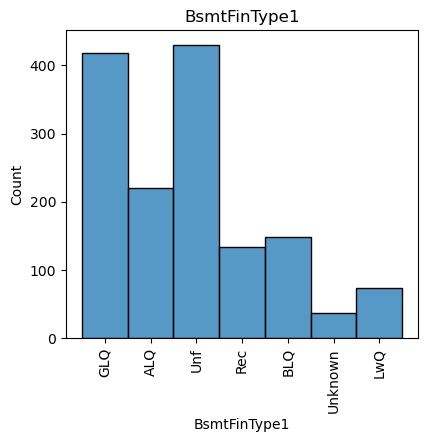

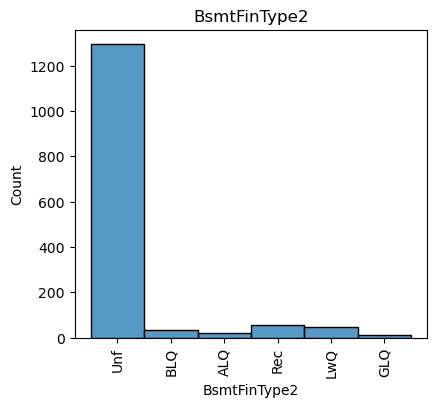

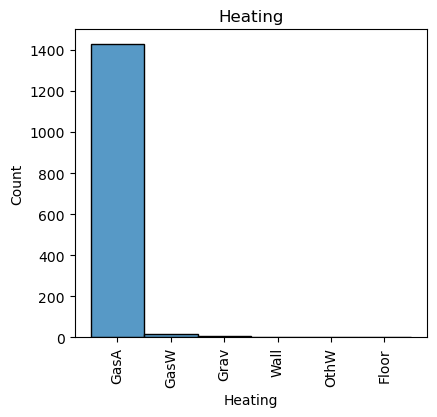

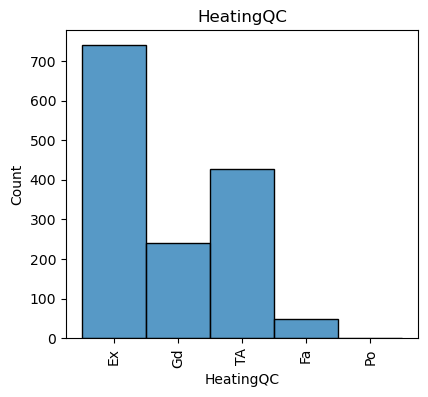

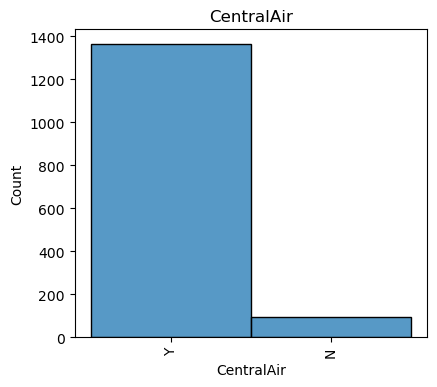

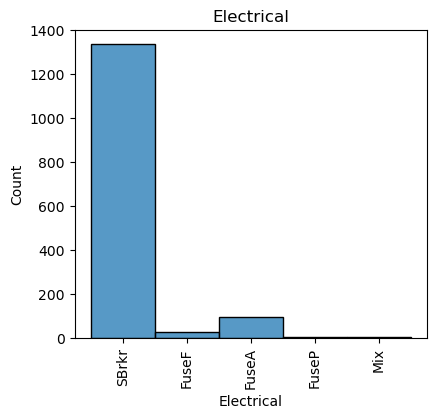

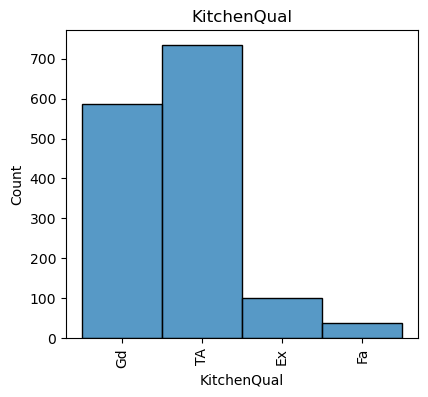

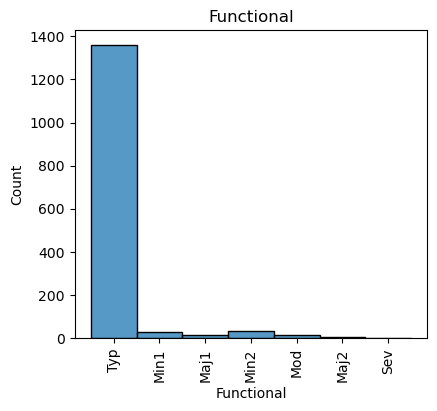

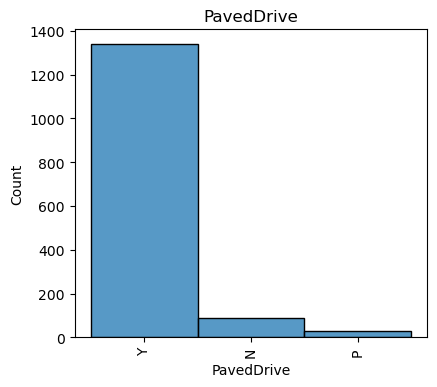

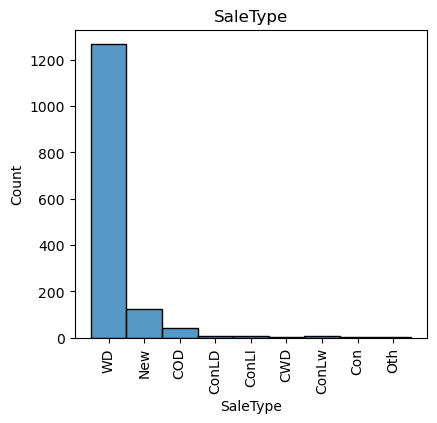

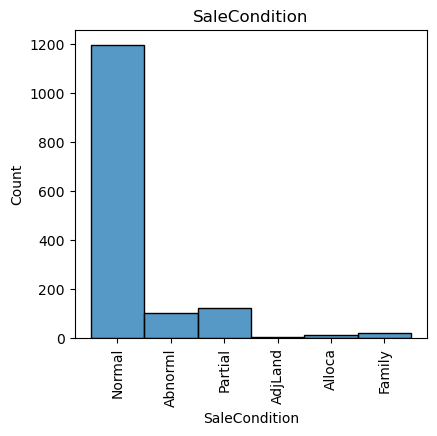

In [136]:
# Lets check data distribution for each of the variables

i=0
for col in house_cat.columns:

    
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,2)
    plt.title(col)
    plt.xticks(rotation=90)
    sns.histplot(house[col])

### From the above histograms we find certain categorical variables are highly skewed with very low variance in terms of data distribution. Such fields may have not be good predictor variables, so we can delete them.

In [137]:
house_col_del = []
house_cat = house.select_dtypes('object')
for col in house_cat.columns:
    if (house_cat[col].value_counts()/house_cat.shape[0] >=.95).any():
        house_col_del.append(col)
print(house_col_del)    

['Street', 'Condition2', 'RoofMatl', 'Heating']


In [138]:
# We will drop the columns with more than 95% of the data in one category
house.drop(columns=house_col_del,axis=1,inplace=True)


## Bivariate Analysis of the continious variables

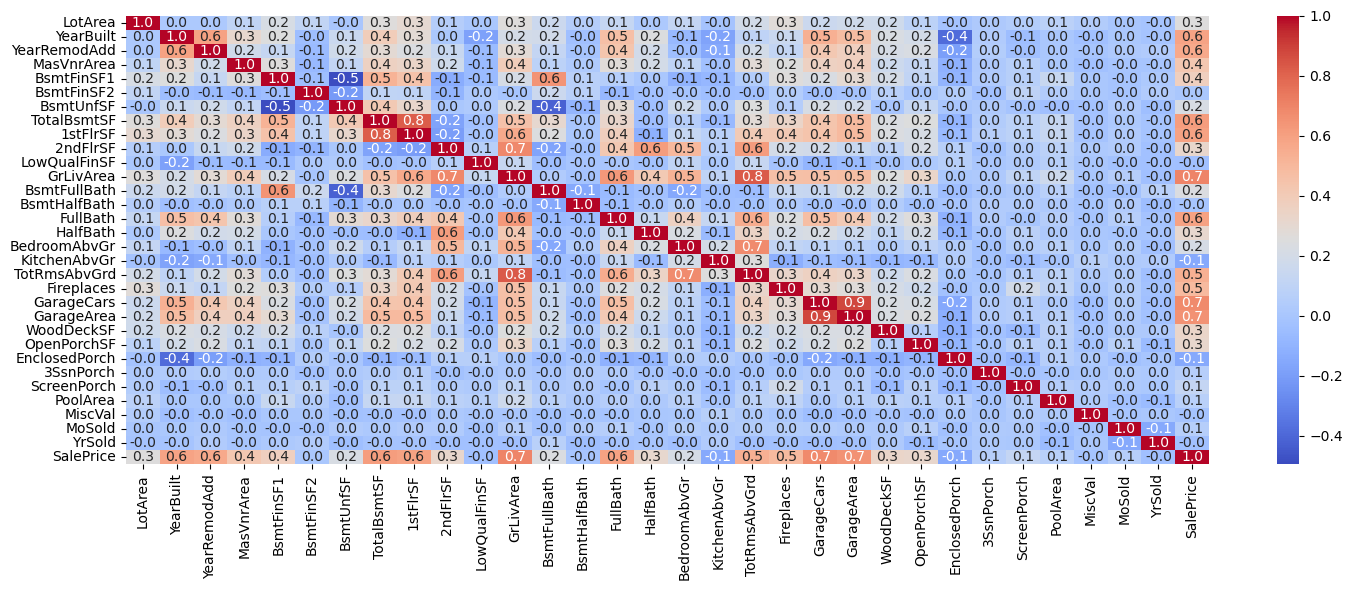

In [139]:
plt.figure(figsize=(15,6))
sns.heatmap(house_cont.corr(), annot=True, fmt='.1f', cmap='coolwarm')
plt.tight_layout()

#### we can certainly find some co-related numerical fields like
>   1. `GarageForCars` are highly co-related wih `GarageArea` (.9)
>   2. `TotalBasementSF` are highly co-related wih `1stFlrSF` (.8)
>   2. `GrLivArea` are highly co-related wih `TotRmsAbvGrd` (.8)

#### We will drop the columns like `GarageForCars,1stFlrSF,TotRmsAbvGrd` as the corel is >.8. Rest can be evaluated by Lasso and VIF


In [140]:
# Drop columns because of the high co-linearity
house.drop(columns=['GarageArea','TotRmsAbvGrd','1stFlrSF'],axis=1,inplace=True)

### Lets have a look into the SalePrice vs Other numerical variable plotting. This should give us an indication about the linearity between the variables.

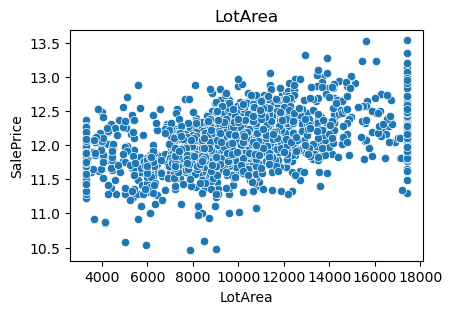

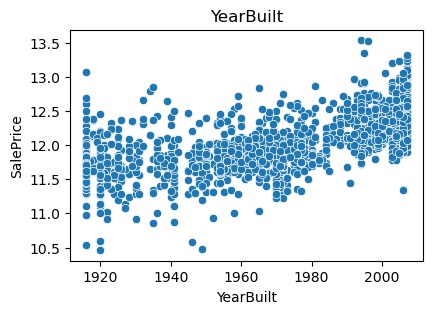

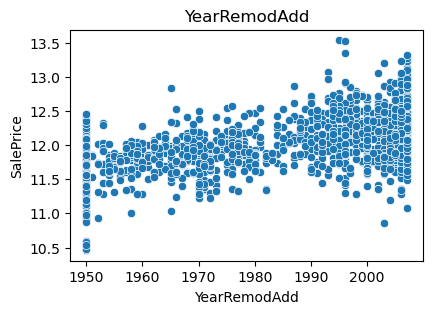

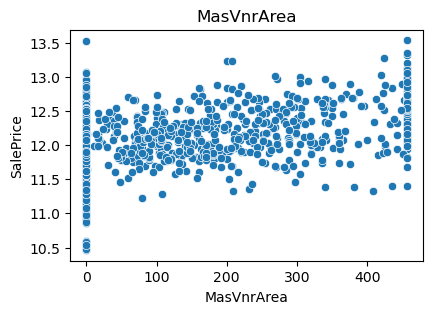

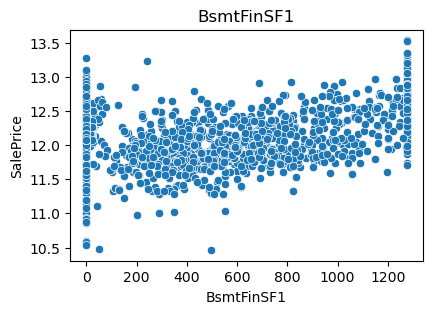

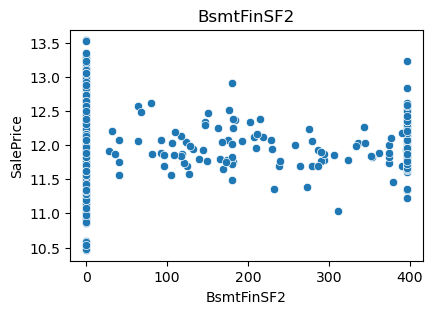

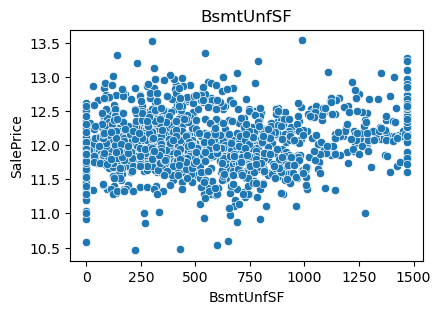

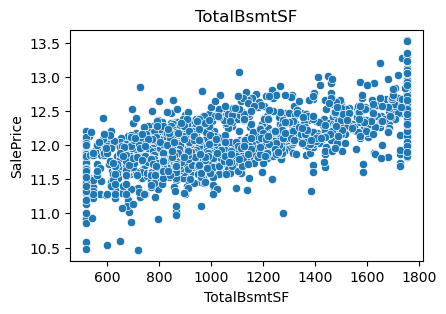

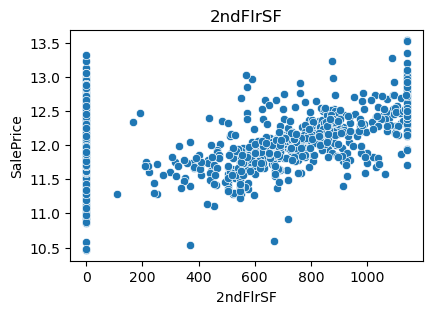

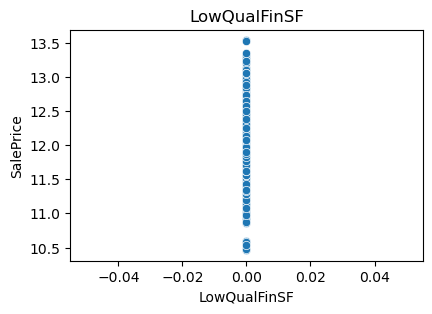

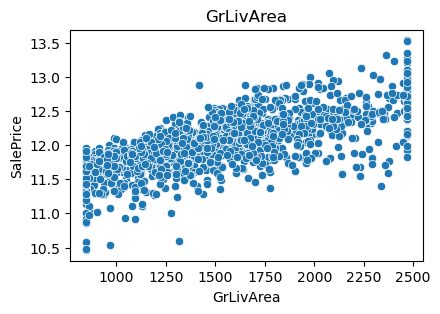

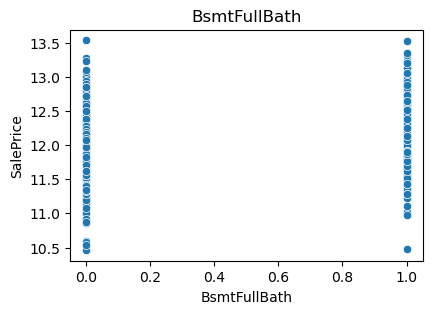

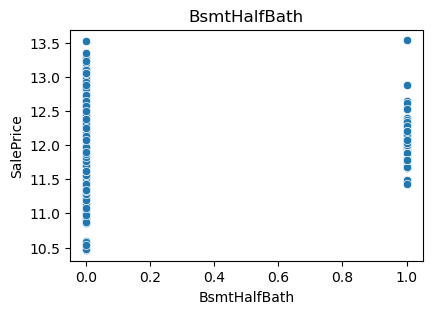

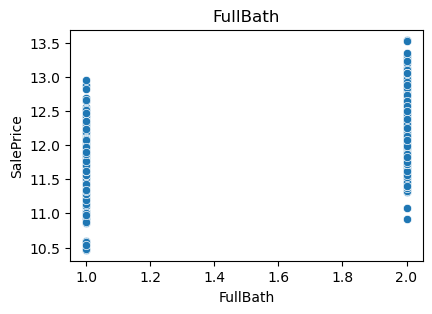

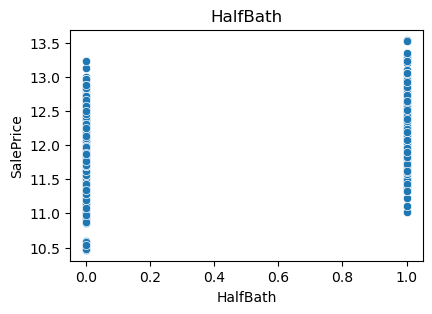

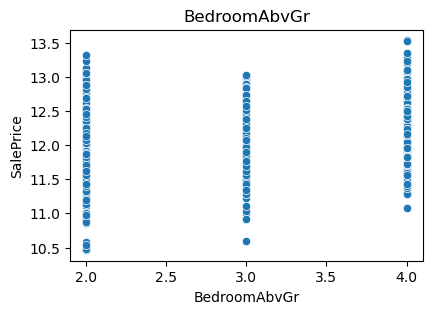

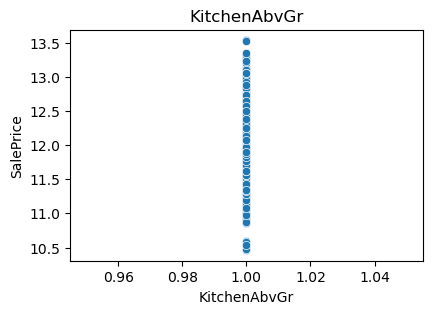

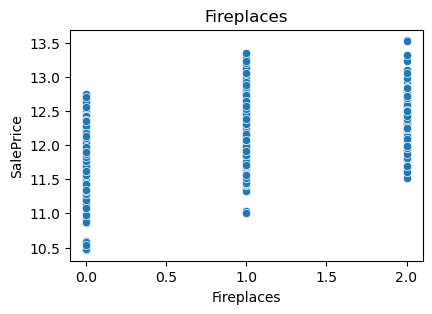

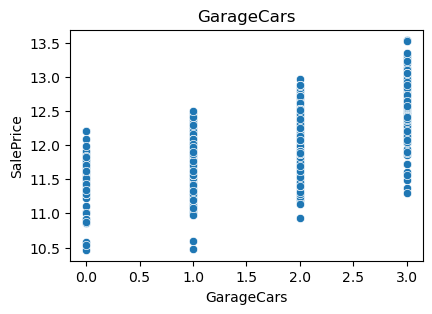

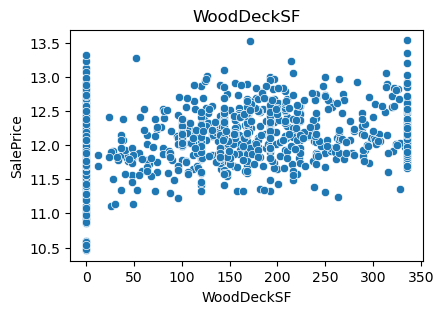

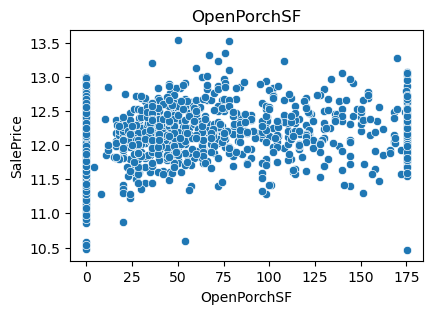

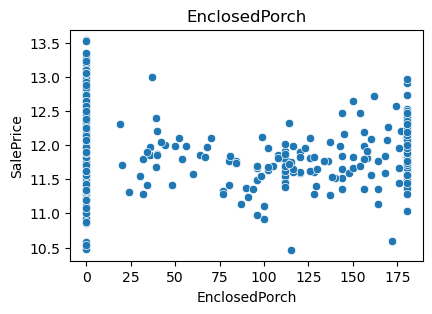

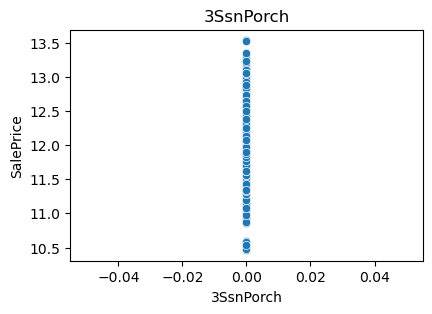

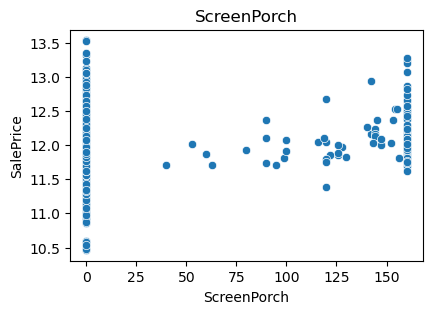

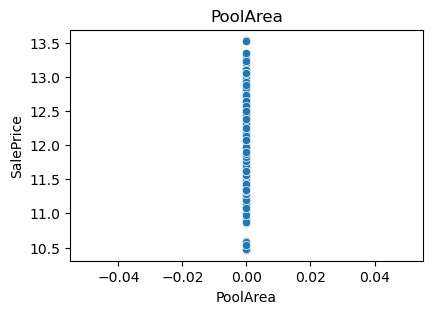

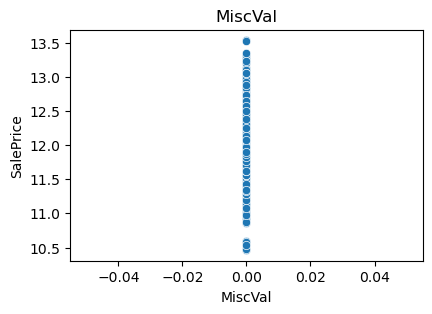

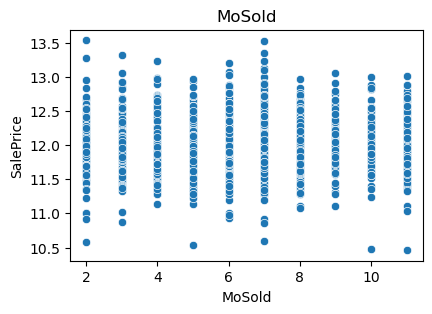

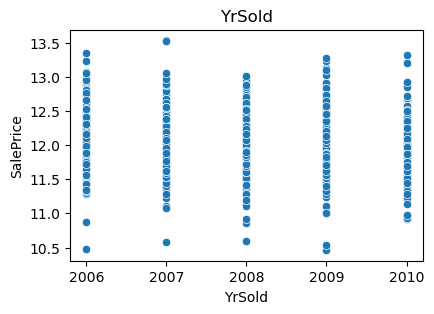

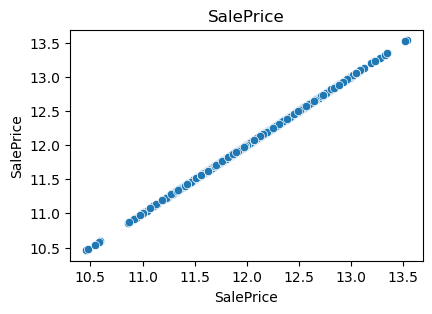

In [141]:
house_cont = house.select_dtypes(include=['int64', 'float64'])
for col in house_cont.columns:
    plt.figure(figsize=(10,3))
    
    plt.subplot(1,2,1)
    plt.title(col)
    sns.scatterplot(x=house[col], y=house['SalePrice'])
    plt.show()    

### We find that the below columns have only one value, hence we can drop them
>   1. LowQualFinSF
>   2. BedroomAbvGr
>   3. KitchenAbvGr
>   4. 3SsnPorch
>   5. PoolArea
>   6. MiscVal

In [142]:
# Drop columns because of low vaiance
house.drop(columns=['BsmtFinSF2','LowQualFinSF','BsmtHalfBath','KitchenAbvGr','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal'],axis=1,inplace=True)


### Bivariate analysis of the categorical variables

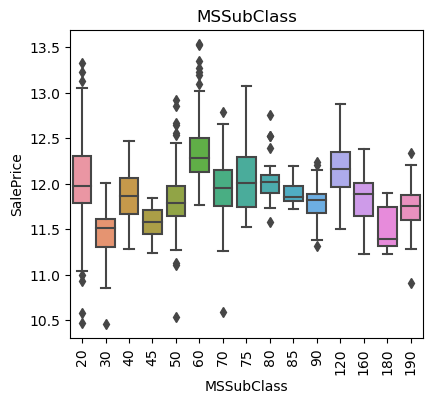

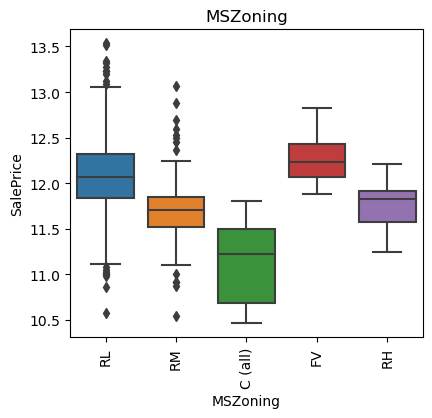

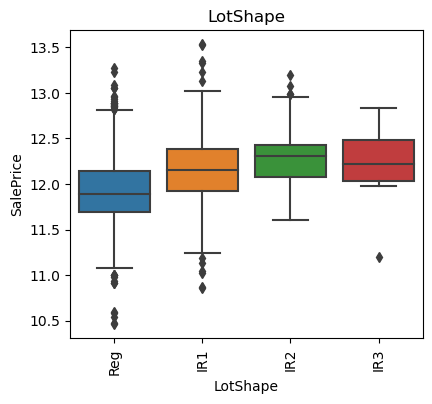

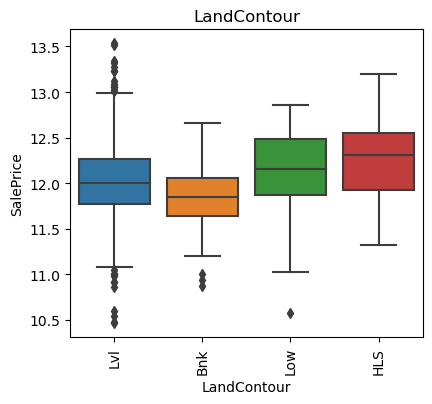

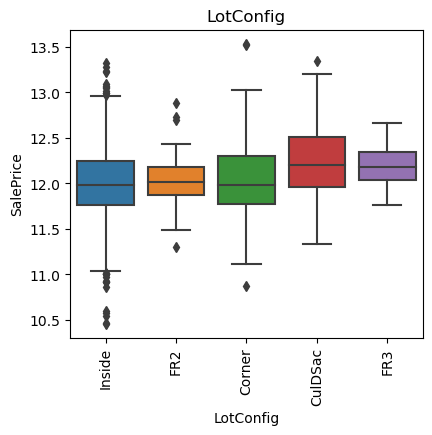

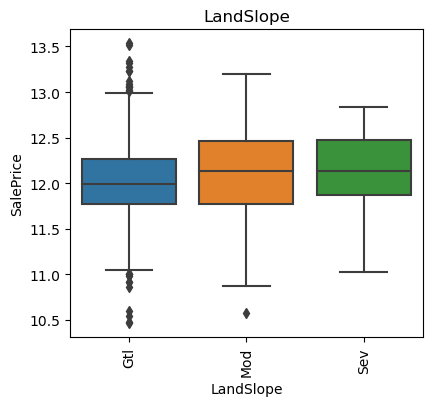

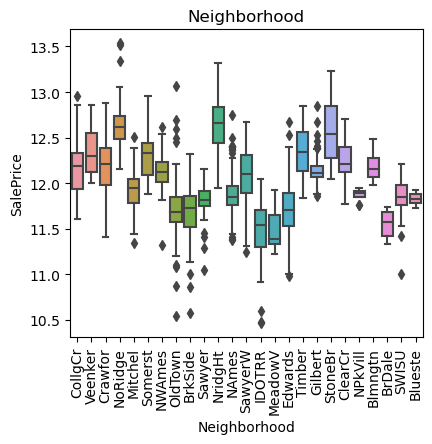

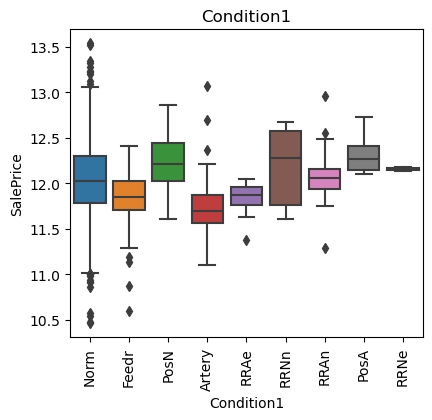

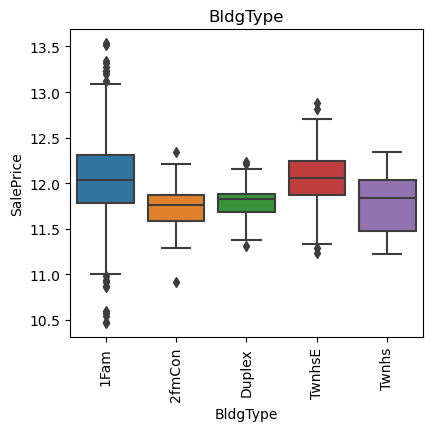

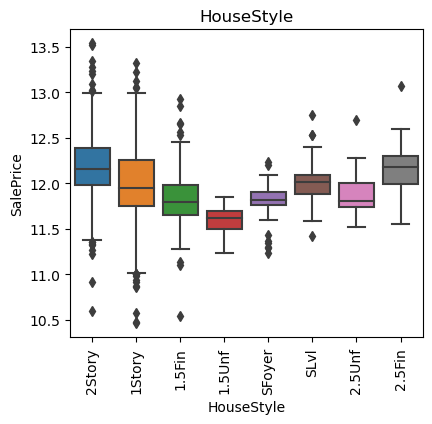

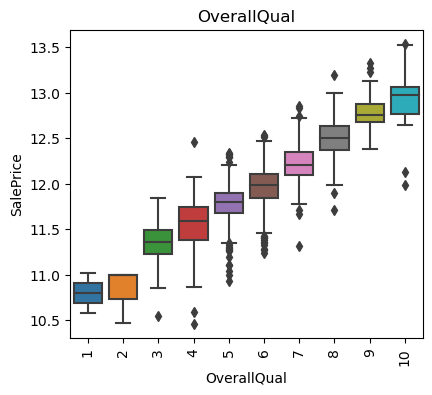

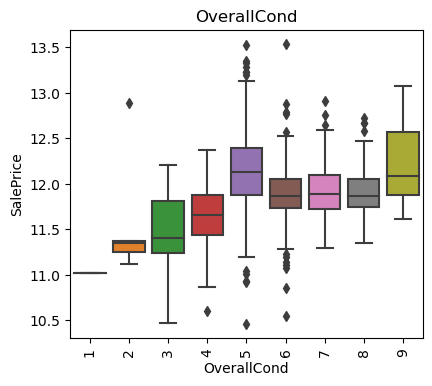

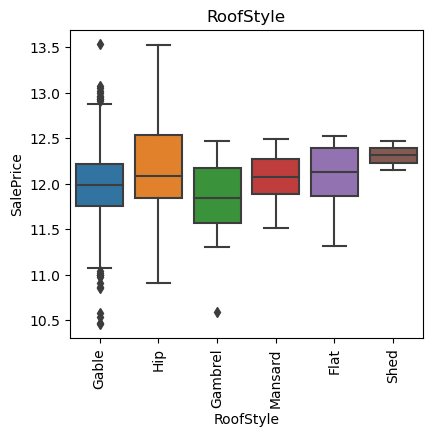

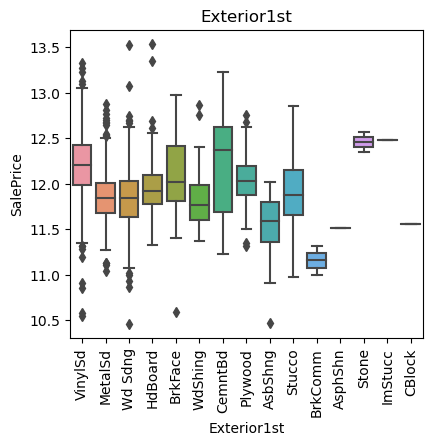

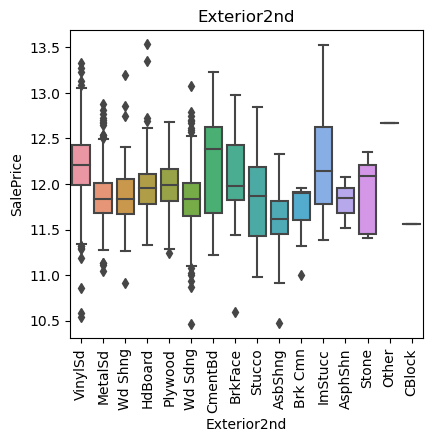

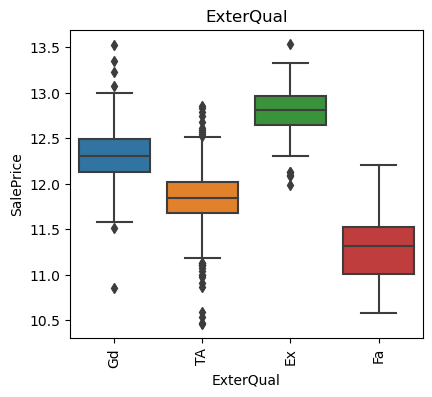

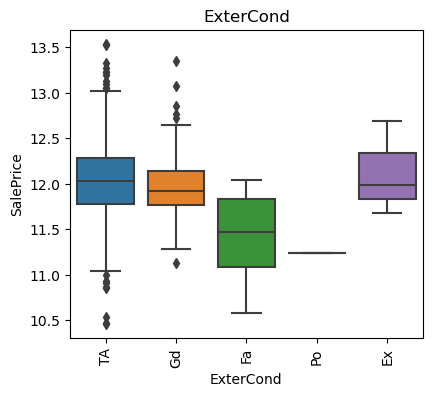

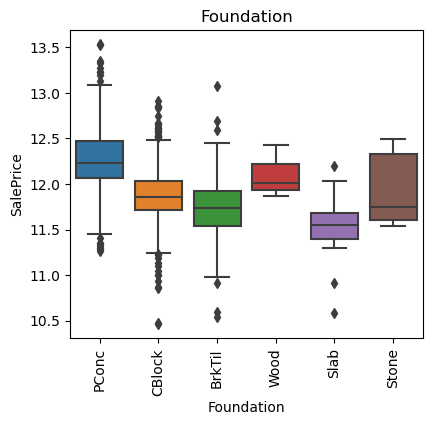

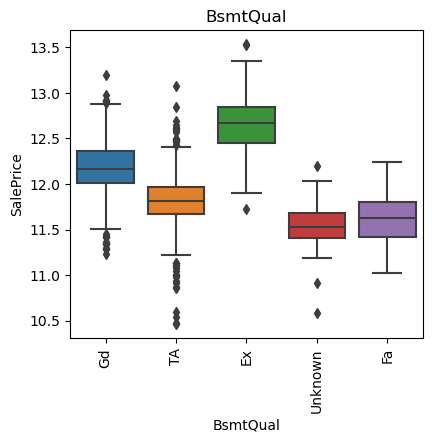

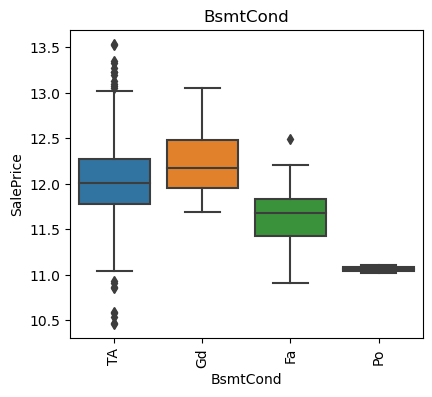

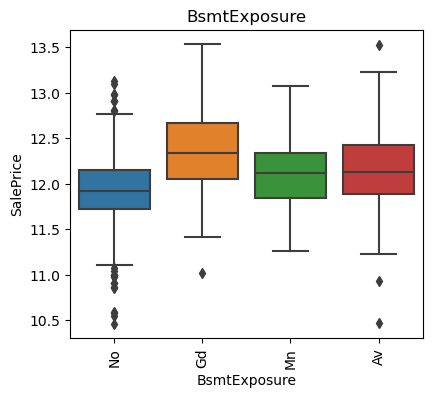

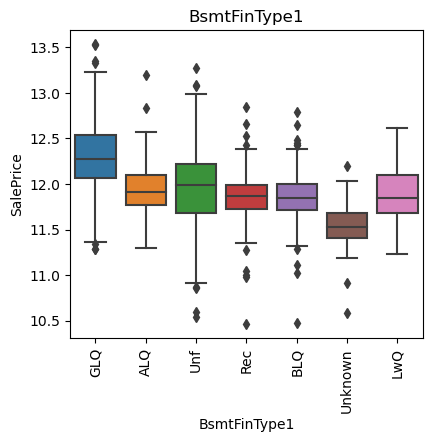

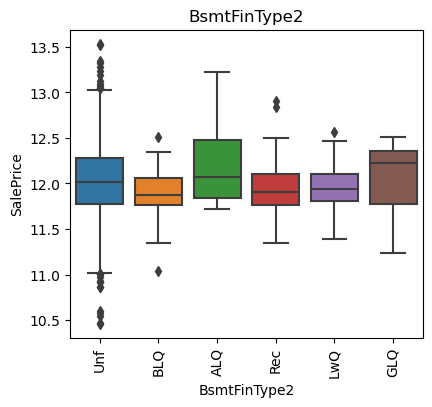

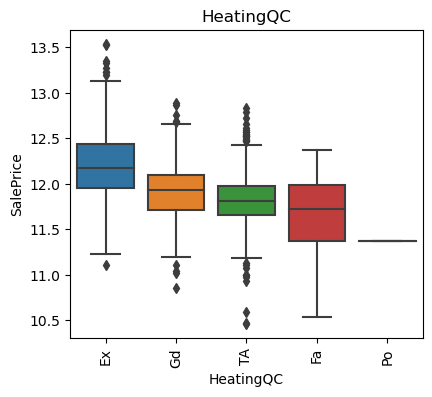

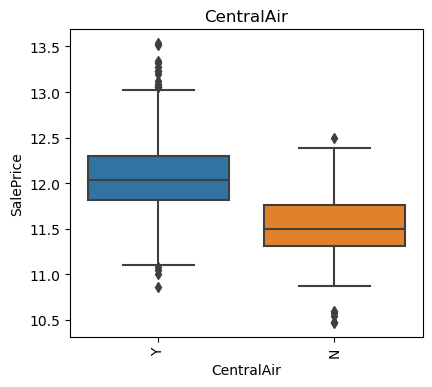

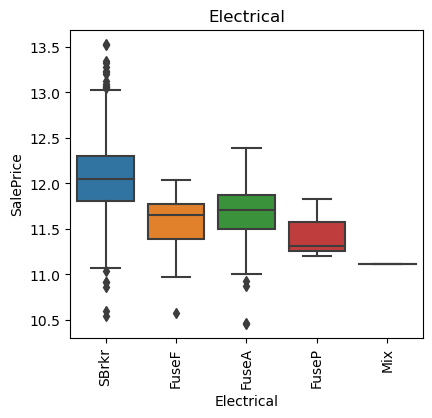

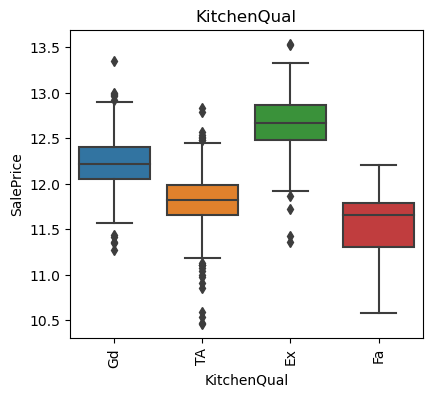

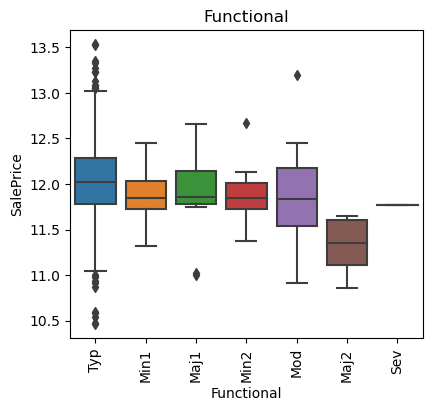

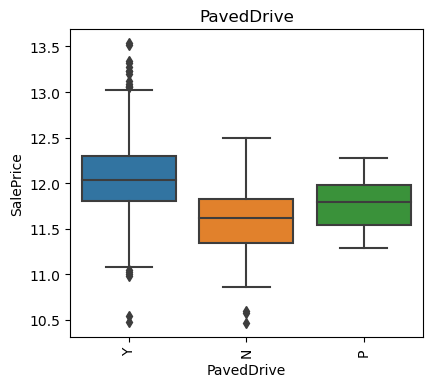

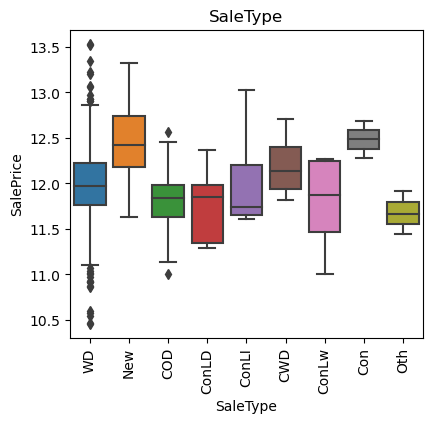

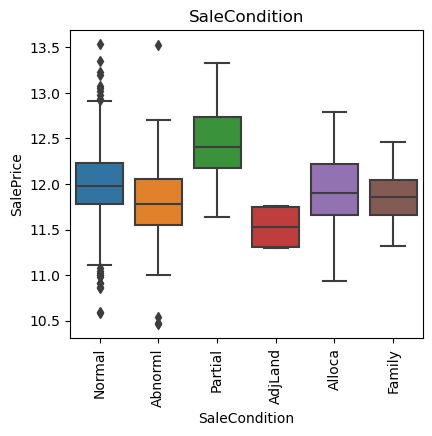

In [143]:
house_cat = house.select_dtypes(['object'])
for col in house_cat.columns:
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,2)
    plt.title(col)
    plt.xticks(rotation=90)
    sns.boxplot(x=house[col], y=house['SalePrice'].sort_values())
    plt.show()

In [144]:
# Once more check for any null values
null_col_dict={}
for i in house.columns:
    if house[i].isna().sum()>0:
        null_col_dict.update({i:house[i].isna().sum()})
null_col_dict

{}

In [145]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 51 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   object 
 1   MSZoning       1460 non-null   object 
 2   LotArea        1460 non-null   float64
 3   LotShape       1460 non-null   object 
 4   LandContour    1460 non-null   object 
 5   LotConfig      1460 non-null   object 
 6   LandSlope      1460 non-null   object 
 7   Neighborhood   1460 non-null   object 
 8   Condition1     1460 non-null   object 
 9   BldgType       1460 non-null   object 
 10  HouseStyle     1460 non-null   object 
 11  OverallQual    1460 non-null   object 
 12  OverallCond    1460 non-null   object 
 13  YearBuilt      1460 non-null   int64  
 14  YearRemodAdd   1460 non-null   int64  
 15  RoofStyle      1460 non-null   object 
 16  Exterior1st    1460 non-null   object 
 17  Exterior2nd    1460 non-null   object 
 18  MasVnrAr

## Data Preparation - Here we will go through the categorical variables and start encoding them

In [146]:
# Label encoding for the ordinal columns

house['LotShape'] = house['LotShape'].map({'IR1':0,'IR2':1,'IR3':2,'Reg':3})
house['LandSlope'] = house['LandSlope'].map({'Gtl':0,'Mod':1,'Sev':2})
house['HouseStyle'] = house['HouseStyle'].map({'1Story':0, '1.5Unf':1, '1.5Fin':2,  '2Story' :3, '2.5Unf':4, '2.5Fin':5, 'SFoyer':6, 'SLvl':7})
house['ExterQual'] = house['ExterQual'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
house['ExterCond'] = house['ExterCond'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
house['BsmtQual'] = house['BsmtQual'].map({'Unknown':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
house['BsmtCond'] = house['BsmtCond'].map({'Unknown':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
house['BsmtExposure'] = house['BsmtExposure'].map({'Unknown':0,'No':1,'Mn':2,'Av':3,'Gd':4})
house['BsmtFinType1'] = house['BsmtFinType1'].map({'Unknown':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
house['BsmtFinType2'] = house['BsmtFinType2'].map({'Unknown':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
house['HeatingQC'] = house['HeatingQC'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
house['CentralAir'] = house['CentralAir'].map({'N':0,'Y':1})
house['KitchenQual'] = house['KitchenQual'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
house['Functional'] = house['Functional'].map({'Typ':0, 'Min1':1, 'Min2':2, 'Mod':3, 'Maj1':4, 'Maj2':5, 'Sev':6, 'Sal':7})


In [147]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 51 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   object 
 1   MSZoning       1460 non-null   object 
 2   LotArea        1460 non-null   float64
 3   LotShape       1460 non-null   int64  
 4   LandContour    1460 non-null   object 
 5   LotConfig      1460 non-null   object 
 6   LandSlope      1460 non-null   int64  
 7   Neighborhood   1460 non-null   object 
 8   Condition1     1460 non-null   object 
 9   BldgType       1460 non-null   object 
 10  HouseStyle     1460 non-null   int64  
 11  OverallQual    1460 non-null   object 
 12  OverallCond    1460 non-null   object 
 13  YearBuilt      1460 non-null   int64  
 14  YearRemodAdd   1460 non-null   int64  
 15  RoofStyle      1460 non-null   object 
 16  Exterior1st    1460 non-null   object 
 17  Exterior2nd    1460 non-null   object 
 18  MasVnrAr

In [148]:
# Once more check for any null values
null_col_dict={}
for i in house.columns:
    if house[i].isna().sum()>0:
        null_col_dict.update({i:house[i].isna().sum()})
null_col_dict

{}

In [149]:
# One hot encoding of the nominal fields
house_cat_nom =  ['MSSubClass','MSZoning',  'LandContour', 'LotConfig', 'Neighborhood', 'Condition1' ,'BldgType', 'RoofStyle',  'Exterior1st', 'Exterior2nd', 'Foundation','Electrical','PavedDrive', 'SaleType','SaleCondition']
house_dummy = pd.get_dummies(house[house_cat_nom], drop_first=True,dtype=int)
house_dummy.shape

(1460, 119)

In [150]:
# Concat the dummy variables to the original data set
house = pd.concat([house,house_dummy],axis=1)
house.shape

(1460, 170)

In [151]:
# Dropping the redundant columns
house.drop(house_cat_nom,axis=1,inplace=True)
house.shape


(1460, 155)

In [152]:
house.SalePrice

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
          ...    
1455    12.072541
1456    12.254863
1457    12.493130
1458    11.864462
1459    11.901583
Name: SalePrice, Length: 1460, dtype: float64

## Model Building
---
### Our EDA and data preparation are completed, we will now start building model. We will create a Linear Regression model first followed by Ridge and Lasso. we will also use cross validation to make our model stronger

### Train Test Split


In [153]:
house_train,house_test = train_test_split(house,train_size=0.7,random_state=100)
print(house_train.shape,house_test.shape)

(1021, 155) (439, 155)


In [154]:
# Divide into X and y for train
y_train = house_train.pop('SalePrice')
X_train = house_train

# Divide into X and y for test
y_test = house_test.pop('SalePrice')
X_test = house_test

print(y_train.shape,X_train.shape,y_test.shape,X_test.shape)

(1021,) (1021, 154) (439,) (439, 154)


### Feature Scaling

In [155]:
#1. Instantiate an scaler object and fit transform the train data
scaler=StandardScaler()
house_cont = X_train.dtypes[X_train.dtypes != "object"].index
X_train[house_cont]=scaler.fit_transform(X_train[house_cont])

X_train.shape

(1021, 154)

In [156]:
# See the glimpse of the scaled data
X_train.head()

LotArea  LotShape  LandSlope  HouseStyle OverallQual OverallCond  \
318   0.072066   0.74876   3.305904    0.679742           7           5   
239  -0.263598   0.74876  -0.228471    0.168307           6           4   
986  -1.257269   0.74876  -0.228471    0.168307           6           8   
1416  0.489112   0.74876  -0.228471    0.679742           4           6   
390  -0.360909   0.74876  -0.228471    0.168307           5           8   

      YearBuilt  YearRemodAdd  MasVnrArea  ExterQual  ...  SaleType_ConLI  \
318    0.729049      0.394412    1.158620   1.051361  ...       -0.054286   
239   -0.922864     -1.701941   -0.650325  -0.699764  ...       -0.054286   
986   -1.920894      0.881936   -0.650325  -0.699764  ...       -0.054286   
1416  -1.920894     -1.701941   -0.650325  -0.699764  ...       -0.054286   
390   -1.920894     -1.701941   -0.650325  -0.699764  ...       -0.054286   

      SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
318        -0.062715     -0.291575     -0.054286     0.385333   
239        -0.062715     -0.291575     -0.054286     0.385333   
986        -0.062715     -0.291575     -0.054286     0.385333   
1416       -0.062715     -0.291575     -0.054286     0.385333   
390        -0.062715     -0.291575     -0.054286     0.385333   

      SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
318               -0.054286             -0.088867              -0.11791   
239               -0.054286             -0.088867              -0.11791   
986               -0.054286             -0.088867              -0.11791   
1416              -0.054286             -0.088867              -0.11791   
390               -0.054286             -0.088867              -0.11791   

      SaleCondition_Normal  SaleCondition_Partial  
318               0.459511              -0.291575  
239               0.459511              -0.291575  
986               0.459511              -0.291575  
1416              0.459511              -0.291575  
390               0.459511              -0.291575  

[5 rows x 154 columns]

In [157]:
# Perform scaling on the test data using the same scaler object
X_test[house_cont]=scaler.transform(X_test[house_cont])
X_test.head()

LotArea  LotShape  LandSlope  HouseStyle OverallQual OverallCond  \
1436 -0.188588  0.748760  -0.228471   -0.854561           4           6   
57    0.577445 -1.388661  -0.228471    0.679742           7           5   
780  -0.514405  0.748760  -0.228471   -0.854561           7           5   
382  -0.117632 -1.388661  -0.228471    0.679742           7           5   
1170  0.066274  0.748760  -0.228471    2.725479           6           6   

      YearBuilt  YearRemodAdd  MasVnrArea  ExterQual  ...  SaleType_ConLI  \
1436  -0.028078     -0.678141   -0.650325  -0.699764  ...       -0.054286   
57     1.107612      0.930689   -0.650325   1.051361  ...       -0.054286   
780    0.797878      0.540669   -0.381810  -0.699764  ...       -0.054286   
382    1.176442      1.028193   -0.650325   1.051361  ...       -0.054286   
1170   0.178411     -0.385626   -0.650325  -0.699764  ...       -0.054286   

      SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
1436       -0.062715     -0.291575     -0.054286     0.385333   
57         -0.062715     -0.291575     -0.054286     0.385333   
780        -0.062715     -0.291575     -0.054286     0.385333   
382        -0.062715     -0.291575     -0.054286     0.385333   
1170       -0.062715     -0.291575     -0.054286     0.385333   

      SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
1436              -0.054286             -0.088867              -0.11791   
57                -0.054286             -0.088867              -0.11791   
780               -0.054286             -0.088867              -0.11791   
382               -0.054286             -0.088867              -0.11791   
1170              -0.054286             -0.088867              -0.11791   

      SaleCondition_Normal  SaleCondition_Partial  
1436              0.459511              -0.291575  
57                0.459511              -0.291575  
780               0.459511              -0.291575  
382               0.459511              -0.291575  
1170              0.459511              -0.291575  

[5 rows x 154 columns]

### Feature selection with RFE and cross validation

In [158]:
# Lets start with the linear regression model and RFE intial feature value as 50
from sklearn.feature_selection import RFE

lm = LinearRegression()
lm.fit(X_train, y_train)

# Apply RFE to get the top 90 features
rfe = RFE(lm, n_features_to_select=90)
rfe = rfe.fit(X_train, y_train)


In [159]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('LotArea', True, 1),
 ('LotShape', False, 22),
 ('LandSlope', True, 1),
 ('HouseStyle', False, 43),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('YearBuilt', True, 1),
 ('YearRemodAdd', True, 1),
 ('MasVnrArea', False, 53),
 ('ExterQual', False, 5),
 ('ExterCond', False, 41),
 ('BsmtQual', True, 1),
 ('BsmtCond', False, 26),
 ('BsmtExposure', True, 1),
 ('BsmtFinType1', True, 1),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinType2', False, 37),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', True, 1),
 ('HeatingQC', True, 1),
 ('CentralAir', True, 1),
 ('2ndFlrSF', True, 1),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', True, 1),
 ('FullBath', False, 12),
 ('HalfBath', True, 1),
 ('BedroomAbvGr', False, 63),
 ('KitchenQual', True, 1),
 ('Functional', True, 1),
 ('Fireplaces', True, 1),
 ('GarageCars', True, 1),
 ('WoodDeckSF', True, 1),
 ('OpenPorchSF', False, 2),
 ('MoSold', False, 15),
 ('YrSold', True, 1),
 ('MSSubClass_30', True, 1),
 ('MSSubClass_40', True, 1),
 ('MSSubClass_45', False,

In [160]:
# Features which can be excluded to make the model according to RFE
X_train.columns[~rfe.support_]

Index(['LotShape', 'HouseStyle', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'BsmtCond', 'BsmtFinType2', 'FullBath', 'BedroomAbvGr', 'OpenPorchSF',
       'MoSold', 'MSSubClass_45', 'MSSubClass_50', 'MSSubClass_70',
       'MSSubClass_75', 'MSSubClass_80', 'MSSubClass_85', 'LotConfig_FR3',
       'LotConfig_Inside', 'Neighborhood_Blueste', 'Neighborhood_BrDale',
       'Neighborhood_CollgCr', 'Neighborhood_Gilbert', 'Neighborhood_IDOTRR',
       'Neighborhood_NAmes', 'Neighborhood_NPkVill', 'Neighborhood_NWAmes',
       'Neighborhood_OldTown', 'Neighborhood_Sawyer', 'Neighborhood_SawyerW',
       'Neighborhood_Timber', 'Condition1_Feedr', 'Condition1_PosA',
       'Condition1_PosN', 'Condition1_RRAn', 'Condition1_RRNe',
       'Condition1_RRNn', 'RoofStyle_Gable', 'RoofStyle_Gambrel',
       'RoofStyle_Hip', 'RoofStyle_Shed', 'Exterior1st_ImStucc',
       'Exterior1st_Stone', 'Exterior1st_Wd Sdng', 'Exterior2nd_BrkFace',
       'Exterior2nd_HdBoard', 'Exterior2nd_MetalSd', 'Exterior

In [161]:
# Select the rfe supported columns only for both train and test
X_train_rfe1 = X_train[X_train.columns[rfe.support_]]
X_test_rfe1 = X_test[X_test.columns[rfe.support_]]
print(X_train_rfe1.shape,X_test_rfe1.shape)

(1021, 90) (439, 90)


In [162]:
# Evaluate model performance
lm_rfe_1 = lm.fit(X_train_rfe1, y_train)
y_test_pred = lm_rfe_1.predict(X_test_rfe1)

# Check r2 score
round(r2_score(y_test,y_test_pred),3)


-2.5375699195198737e+22

In [163]:
import statsmodels.api as sm  
X_train_rfe1 = sm.add_constant(X_train_rfe1) #Adding Constant
X_train_rfe1.head()

const   LotArea  LandSlope OverallQual OverallCond  YearBuilt  \
318     1.0  0.072066   3.305904           7           5   0.729049   
239     1.0 -0.263598  -0.228471           6           4  -0.922864   
986     1.0 -1.257269  -0.228471           6           8  -1.920894   
1416    1.0  0.489112  -0.228471           4           6  -1.920894   
390     1.0 -0.360909  -0.228471           5           8  -1.920894   

      YearRemodAdd  BsmtQual  BsmtExposure  BsmtFinType1  ...  \
318       0.394412  0.577925      2.181065      1.138412  ...   
239      -1.701941 -0.533302     -0.653302     -0.753845  ...   
986       0.881936 -0.533302     -0.653302     -1.226909  ...   
1416     -1.701941 -0.533302     -0.653302     -1.226909  ...   
390      -1.701941 -0.533302     -0.653302     -0.280781  ...   

      Foundation_Slab  Electrical_FuseF  PavedDrive_P  PavedDrive_Y  \
318         -0.133963         -0.144914     -0.144914      0.303280   
239         -0.133963         -0.144914     -0.144914      0.303280   
986         -0.133963         -0.144914     -0.144914      0.303280   
1416        -0.133963         -0.144914     -0.144914     -3.297286   
390         -0.133963         -0.144914     -0.144914      0.303280   

      SaleType_ConLD  SaleType_New  SaleCondition_AdjLand  \
318        -0.070152     -0.291575              -0.054286   
239        -0.070152     -0.291575              -0.054286   
986        -0.070152     -0.291575              -0.054286   
1416       -0.070152     -0.291575              -0.054286   
390        -0.070152     -0.291575              -0.054286   

      SaleCondition_Alloca  SaleCondition_Normal  SaleCondition_Partial  
318              -0.088867              0.459511              -0.291575  
239              -0.088867              0.459511              -0.291575  
986              -0.088867              0.459511              -0.291575  
1416             -0.088867              0.459511              -0.291575  
390              -0.088867              0.459511              -0.291575  

[5 rows x 91 columns]

In [164]:
# Ensure that X_train_rfe1 and y_train contain only numeric data
X_train_rfe1 = X_train_rfe1.apply(pd.to_numeric, errors='coerce')
y_train = y_train.apply(pd.to_numeric, errors='coerce')

# Now fit the model
lm1 = sm.OLS(y_train, X_train_rfe1).fit()   
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     158.1
Date:                Wed, 27 Mar 2024   Prob (F-statistic):               0.00
Time:                        08:50:35   Log-Likelihood:                 891.11
No. Observations:                1021   AIC:                            -1610.
Df Residuals:                     935   BIC:                            -1186.
Df Model:                          85                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    11.53

### Kfold cross validation through Grid Search method

In [165]:
# We will perform k-fold cv with all 90 feature variables
from sklearn.model_selection import cross_val_score



In [166]:
cv_model = LinearRegression()
# Set the CV scheme and the metric
cv_scores = cross_val_score(cv_model, X_train_rfe1, y_train, cv=5, scoring='r2')
cv_scores

array([ 9.22214302e-01, -1.26623545e+21, -2.98324174e+22, -4.74691062e+22,
        9.33728410e-01])

### we have 90 hyperparameters which we now need to regulerize using k-fold

In [167]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [168]:
# Step 1 : Create a cross validation scheme
kfold = KFold(n_splits=5, random_state=42, shuffle=True)

# Step 2 : Specify the hyperparameters to be tuned
hyper_params = [{'n_features_to_select' : list(range(1,91))}]

# Step 3 : perform grid search

#3.1 : Create a model object
lm = LinearRegression()
lm.fit(X_train_rfe1, y_train)
rfe = RFE(lm)
    
#3.2 : Create a grid search object
model_cv = GridSearchCV(estimator=rfe,scoring='r2',return_train_score=True,param_grid=hyper_params,cv=kfold,verbose=1,n_jobs=-1)
# 3.3 : fit the model
model_cv.fit(X_train_rfe1,y_train)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RFE(estimator=LinearRegression()), n_jobs=-1,
             param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12, 13, 14, 15, 16,
                                                   17, 18, 19, 20, 21, 22, 23,
                                                   24, 25, 26, 27, 28, 29, 30, ...]}],
             return_train_score=True, scoring='r2', verbose=1)

In [169]:
# Check the result in table form
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.531752      0.026014         0.010366        0.006003   
1        0.539181      0.013493         0.012227        0.007132   
2        0.510137      0.037735         0.003125        0.006251   
3        0.518624      0.040194         0.005884        0.007231   
4        0.491018      0.020842         0.009095        0.007491   
..            ...           ...              ...             ...   
85       0.096916      0.010205         0.024937        0.017019   
86       0.097800      0.019965         0.011275        0.003095   
87       0.080620      0.012857         0.012816        0.004089   
88       0.067758      0.016559         0.017542        0.004609   
89       0.052028      0.011187         0.012738        0.004036   

   param_n_features_to_select                        params  \
0                           1   {'n_features_to_select': 1}   
1                           2   {'n_features_to_select': 2}   
2                           3   {'n_features_to_select': 3}   
3                           4   {'n_features_to_select': 4}   
4                           5   {'n_features_to_select': 5}   
..                        ...                           ...   
85                         86  {'n_features_to_select': 86}   
86                         87  {'n_features_to_select': 87}   
87                         88  {'n_features_to_select': 88}   
88                         89  {'n_features_to_select': 89}   
89                         90  {'n_features_to_select': 90}   

    split0_test_score  split1_test_score  split2_test_score  \
0            0.681196           0.655899           0.655343   
1            0.755720           0.729749           0.752686   
2            0.807079           0.783250           0.807900   
3            0.830390           0.816747           0.832803   
4            0.855846           0.844066           0.859385   
..                ...                ...                ...   
85           0.913813           0.900181           0.922457   
86           0.915362           0.900068           0.922876   
87           0.915426           0.900559           0.915990   
88           0.915412           0.901309           0.923029   
89           0.915615           0.901791           0.923435   

    split3_test_score  ...  mean_test_score  std_test_score  rank_test_score  \
0            0.624055  ...     6.525486e-01    1.839144e-02               51   
1            0.748653  ...     7.412014e-01    1.423704e-02               50   
2            0.789431  ...     7.951847e-01    1.026253e-02               49   
3            0.808792  ...     8.217946e-01    8.854684e-03               48   
4            0.850459  ...     8.510087e-01    5.912896e-03               47   
..                ...  ...              ...             ...              ...   
85           0.908440  ...    -1.136770e+21    2.273540e+21               88   
86           0.909796  ...    -3.899530e+20    7.799060e+20               87   
87           0.910549  ...    -1.245769e+20    2.491537e+20               85   
88           0.911142  ...    -1.525908e+22    3.051816e+22               89   
89           0.911228  ...    -3.707357e+20    7.414715e+20               86   

    split0_train_score  split1_train_score  split2_train_score  \
0             0.650407            0.658366            0.657617   
1             0.740328            0.747653            0.741103   
2             0.795294            0.801955            0.795252   
3             0.823248            0.827036            0.822626   
4             0.852317            0.855569            0.851247   
..                 ...                 ...                 ...   
85            0.934856            0.940366            0.935270   
86            0.935861            0.940390            0.935353   
87            0.935956            0.940443            0.930456   
88            0.935969            0.940492          

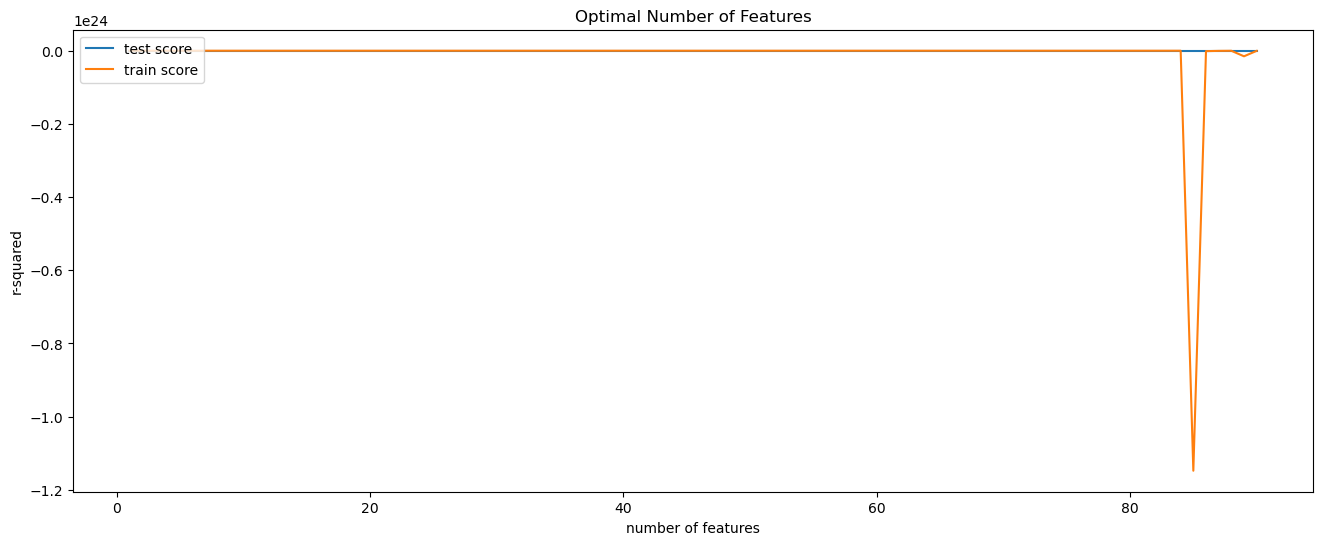

In [170]:
# Plotting CV results
plt.figure(figsize=(16,6))
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.plot(cv_results['param_n_features_to_select'] , cv_results['mean_test_score'])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')
plt.show()

### Ridge regression for regulerization


In [171]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20, 50, 100, 500, 1000 ]}
ridge = Ridge()
# cross validation
ridgeCV = GridSearchCV(ridge, param_grid=params, scoring='neg_mean_absolute_error', cv=kfold, verbose=1, n_jobs=-1,return_train_score=True)
ridgeCV.fit(X_train, y_train)


Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500,
                                   1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [172]:
ridgeCV.best_params_

{'alpha': 100}

In [173]:
# Cross Validation results
ridgeCV_results = pd.DataFrame(ridgeCV.cv_results_)
ridgeCV_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0        0.117886      0.021702         0.037359        0.008036      0.0001   
1        0.128065      0.025110         0.059799        0.016511       0.001   
2        0.155161      0.039032         0.076830        0.015360        0.01   
3        0.198296      0.029808         0.075011        0.032534         0.1   
4        0.153708      0.031812         0.068966        0.026668         0.2   
5        0.141455      0.017744         0.052380        0.020393         0.3   
6        0.126443      0.019459         0.034528        0.005232         0.4   
7        0.119691      0.007866         0.039454        0.018402         0.5   
8        0.108225      0.014049         0.054611        0.036696         0.6   
9        0.188576      0.053621         0.098934        0.035458         0.7   
10       0.225589      0.057506         0.057206        0.033092         0.8   
11       0.160172      0.050211         0.059482        0.017972         0.9   
12       0.126974      0.015680         0.048077        0.013207         1.0   
13       0.119917      0.030072         0.041465        0.012594         2.0   
14       0.128731      0.027064         0.038999        0.012223         3.0   
15       0.113334      0.023332         0.035163        0.007364         4.0   
16       0.091093      0.011632         0.034803        0.006836         5.0   
17       0.094444      0.006149         0.031565        0.008521         6.0   
18       0.117338      0.022280         0.036504        0.006265         7.0   
19       0.098521      0.015995         0.046363        0.016848         8.0   
20       0.097931      0.004045         0.034788        0.009209         9.0   
21       0.126291      0.027092         0.054663        0.011900        10.0   
22       0.143652      0.026484         0.054866        0.017009          20   
23       0.162746      0.025993         0.055847        0.017421          50   
24       0.116590      0.010139         0.036075        0.004347         100   
25       0.091387      0.005962         0.055516        0.014927         500   
26       0.110765      0.023063         0.029374        0.003792        1000   

               params  split0_test_score  split1_test_score  \
0   {'alpha': 0.0001}          -0.097340          -0.087285   
1    {'alpha': 0.001}          -0.097339          -0.087284   
2     {'alpha': 0.01}          -0.097332          -0.087276   
3      {'alpha': 0.1}          -0.097261          -0.087205   
4      {'alpha': 0.2}          -0.097191          -0.087135   
5      {'alpha': 0.3}          -0.097129          -0.087072   
6      {'alpha': 0.4}          -0.097082          -0.087014   
7      {'alpha': 0.5}          -0.097047          -0.086962   
8      {'alpha': 0.6}          -0.097014          -0.086914   
9      {'alpha': 0.7}          -0.096983          -0.086870   
10     {'alpha': 0.8}          -0.096953          -0.086828   
11     {'alpha': 0.9}          -0.096924          -0.086791   
12     {'alpha': 1.0}          -0.096897          -0.086756   
13     {'alpha': 2.0}          -0.096665          -0.086494   
14     {'alpha': 3.0}          -0.096478          -0.086325   
15     {'alpha': 4.0}          -0.096341          -0.086196   
16     {'alpha': 5.0}          -0.096227          -0.086091   
17     {'alpha': 6.0}          -0.096122          -0.086018   
18     {'alpha': 7.0}          -0.096022          -0.085961   
19     {'alpha': 8.0}          -0.095925          -0.085913   
20     {'alpha': 9.0}          -0.095874          -0.085871   
21    {'alpha': 10.0}          -0.095827          -0.085838   
22      {'alpha': 20}          -0.095519          -0.085728   
23      {'alpha': 50}          -0.095500          -0.086137   
24     {'alpha': 100}          -0.096400          -0.086611   
25     {'alpha': 500}          -0.102103          -0.091756   
26    {'alpha': 1000}          -0.108992          -0.098386   

In [174]:
# Now lets build another Ridge with the best alpha value 100
ridge = Ridge(alpha=100)
ridge.fit(X_train, y_train)
ridge.coef_

array([ 0.03086027,  0.00106257,  0.00679201, -0.00390601,  0.04904535,
        0.03318675,  0.02257998,  0.02389749,  0.00553388,  0.00574423,
       -0.00182188,  0.01055409,  0.00490911,  0.01364551,  0.01067848,
        0.02686509,  0.00214583,  0.00174098,  0.05281781,  0.00803702,
        0.02017288,  0.01715007,  0.07626016,  0.01014909,  0.01381707,
        0.01552116,  0.00783511,  0.01363741, -0.01535657,  0.02021223,
        0.03124717,  0.01043861,  0.0077796 , -0.00436327, -0.00470727,
       -0.01664415, -0.00516232, -0.00108772,  0.00227806, -0.00568987,
        0.00555166,  0.00406276,  0.00159388, -0.00043164, -0.00473666,
       -0.00252087, -0.01187947, -0.00314249, -0.0047934 ,  0.01299166,
        0.00965994,  0.02112591,  0.01470839,  0.00704122,  0.00596038,
        0.01235567,  0.00671746, -0.00743956, -0.00355464, -0.00010389,
        0.00146071, -0.00693579,  0.0034962 ,  0.0089479 , -0.00392367,
        0.01669172, -0.01782663, -0.00226923, -0.01571025, -0.01

In [175]:
# Now if we make a prediction with this Ridge model
y_train_pred = ridge.predict(X_train)
y_test_pred = ridge.predict(X_test)

In [176]:

# Show Metrices
print('Train R2:',r2_score(y_train, y_train_pred))
print('Test R2:',r2_score(y_test, y_test_pred))
print('--------------------')
print('Train RMSE:',np.sqrt(mean_squared_error(y_train, y_train_pred)))
print('Test RMSE:',np.sqrt(mean_squared_error(y_test, y_test_pred)))
print('--------------------')

Train R2: 0.9298277422823437
Test R2: 0.891502210591111
--------------------
Train RMSE: 0.10501035620467691
Test RMSE: 0.13372374071478668
--------------------


In [177]:
# Most important predictors as per Ridge
ridge_coeff_df = pd.DataFrame({'column':X_train.columns,'coeff':ridge.coef_})
ridge_coeff_df['coeff_abs'] = np.abs(ridge_coeff_df['coeff'])
ridge_coeff_df = ridge_coeff_df.sort_values('coeff_abs',ascending=False)
ridge_coeff_df.head(10)

column     coeff  coeff_abs
22             GrLivArea  0.076260   0.076260
18           TotalBsmtSF  0.052818   0.052818
4            OverallQual  0.049045   0.049045
5            OverallCond  0.033187   0.033187
30            GarageCars  0.031247   0.031247
0                LotArea  0.030860   0.030860
15            BsmtFinSF1  0.026865   0.026865
7           YearRemodAdd  0.023897   0.023897
6              YearBuilt  0.022580   0.022580
75  Neighborhood_NridgHt  0.021684   0.021684

## Lasso Regression


In [178]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20, 50, 100, 500, 1000 ]}

lasso  =Lasso() # Create a Lasso object


In [179]:
# Perform grid search cross validation on the alpha values for Lasso
lassoCV = GridSearchCV(estimator=lasso,param_grid=params,scoring='neg_mean_absolute_error',cv=kfold,verbose=1,n_jobs=-1,return_train_score=True)

# Fit the model
lassoCV.fit(X_train, y_train)


Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500,
                                   1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [180]:
# Get the best hyper parameter value
lassoCV.best_params_

{'alpha': 0.001}

In [181]:
# Coefficients from Lasso
lassoCV_df = pd.DataFrame(lassoCV.cv_results_)
lassoCV_df

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0        0.265932      0.055799         0.042036        0.007861      0.0001   
1        0.206986      0.028913         0.048391        0.018364       0.001   
2        0.164543      0.021904         0.049670        0.012656        0.01   
3        0.168797      0.031668         0.050396        0.009499         0.1   
4        0.153798      0.012324         0.048842        0.005216         0.2   
5        0.139738      0.017040         0.047881        0.012667         0.3   
6        0.143013      0.024468         0.041582        0.009377         0.4   
7        0.218375      0.030466         0.055006        0.005242         0.5   
8        0.185665      0.039657         0.058250        0.018889         0.6   
9        0.165411      0.027816         0.038727        0.009808         0.7   
10       0.172773      0.019023         0.046920        0.020533         0.8   
11       0.133360      0.023384         0.043559        0.011826         0.9   
12       0.138871      0.027074         0.041397        0.019867         1.0   
13       0.128651      0.026677         0.035022        0.008884         2.0   
14       0.140639      0.021281         0.045642        0.010814         3.0   
15       0.175419      0.088698         0.067396        0.024342         4.0   
16       0.239795      0.062077         0.061150        0.010232         5.0   
17       0.138016      0.024768         0.040731        0.010025         6.0   
18       0.117072      0.012659         0.044953        0.014491         7.0   
19       0.136109      0.024821         0.041009        0.015569         8.0   
20       0.135699      0.018655         0.039689        0.013634         9.0   
21       0.135287      0.017140         0.036970        0.012116        10.0   
22       0.132604      0.016015         0.031690        0.009728          20   
23       0.134203      0.020052         0.045537        0.006580          50   
24       0.141299      0.024018         0.041133        0.018047         100   
25       0.159862      0.011449         0.051222        0.011776         500   
26       0.133164      0.004233         0.034861        0.006567        1000   

               params  split0_test_score  split1_test_score  \
0   {'alpha': 0.0001}          -0.095972          -0.086310   
1    {'alpha': 0.001}          -0.094061          -0.086453   
2     {'alpha': 0.01}          -0.097177          -0.093706   
3      {'alpha': 0.1}          -0.161049          -0.160554   
4      {'alpha': 0.2}          -0.215418          -0.209782   
5      {'alpha': 0.3}          -0.261113          -0.244297   
6      {'alpha': 0.4}          -0.315199          -0.285869   
7      {'alpha': 0.5}          -0.329485          -0.311087   
8      {'alpha': 0.6}          -0.329485          -0.311087   
9      {'alpha': 0.7}          -0.329485          -0.311087   
10     {'alpha': 0.8}          -0.329485          -0.311087   
11     {'alpha': 0.9}          -0.329485          -0.311087   
12     {'alpha': 1.0}          -0.329485          -0.311087   
13     {'alpha': 2.0}          -0.329485          -0.311087   
14     {'alpha': 3.0}          -0.329485          -0.311087   
15     {'alpha': 4.0}          -0.329485          -0.311087   
16     {'alpha': 5.0}          -0.329485          -0.311087   
17     {'alpha': 6.0}          -0.329485          -0.311087   
18     {'alpha': 7.0}          -0.329485          -0.311087   
19     {'alpha': 8.0}          -0.329485          -0.311087   
20     {'alpha': 9.0}          -0.329485          -0.311087   
21    {'alpha': 10.0}          -0.329485          -0.311087   
22      {'alpha': 20}          -0.329485          -0.311087   
23      {'alpha': 50}          -0.329485          -0.311087   
24     {'alpha': 100}          -0.329485          -0.311087   
25     {'alpha': 500}          -0.329485          -0.311087   
26    {'alpha': 1000}          -0.329485          -0.311087   

In [182]:
# Build another lasso model using the best alpha value
alpha_optimal = 0.001
lasso = Lasso(alpha=alpha_optimal)
lasso.fit(X_train, y_train)
lasso.coef_

array([ 3.12637068e-02,  5.89239874e-04,  6.89550390e-03, -0.00000000e+00,
        4.94275493e-02,  3.83077377e-02,  4.27677887e-02,  2.32693114e-02,
        0.00000000e+00,  0.00000000e+00, -7.67560931e-04,  6.22808494e-03,
        2.94778956e-03,  1.25253819e-02,  8.85505555e-03,  2.29639335e-02,
        0.00000000e+00, -6.93504781e-03,  5.69509342e-02,  6.80274114e-03,
        1.76648226e-02,  0.00000000e+00,  1.21004926e-01,  7.21230574e-03,
        8.45017923e-04,  1.04302678e-02,  5.99176738e-04,  8.73556487e-03,
       -2.03978352e-02,  1.65476055e-02,  3.11636982e-02,  8.02242131e-03,
        4.25354640e-03, -3.49114061e-03, -2.93615314e-03, -1.45439065e-02,
       -4.12518687e-03, -0.00000000e+00,  3.05382444e-03, -3.24624261e-03,
        3.51855391e-03,  1.86258029e-03,  0.00000000e+00, -0.00000000e+00,
       -1.05581952e-02, -1.22829779e-03, -1.00615936e-02, -2.20427474e-03,
       -8.36187459e-03,  4.15995465e-02,  2.54401637e-02,  8.15486853e-02,
        6.24705583e-02,  

In [183]:
# Predictions using Lasso
y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

In [184]:
# Matrices using lasso
print('Train R2:',r2_score(y_train, y_train_pred))
print('Test R2:',r2_score(y_test, y_test_pred))
print('--------------------')
print('Train RMSE:',np.sqrt(mean_squared_error(y_train, y_train_pred)))
print('Test RMSE:',np.sqrt(mean_squared_error(y_test, y_test_pred)))


Train R2: 0.9331165299186851
Test R2: 0.8941818538085676
--------------------
Train RMSE: 0.10252004908342267
Test RMSE: 0.13206208401650105


In [185]:
lassoCV_df= pd.DataFrame(lassoCV.cv_results_)

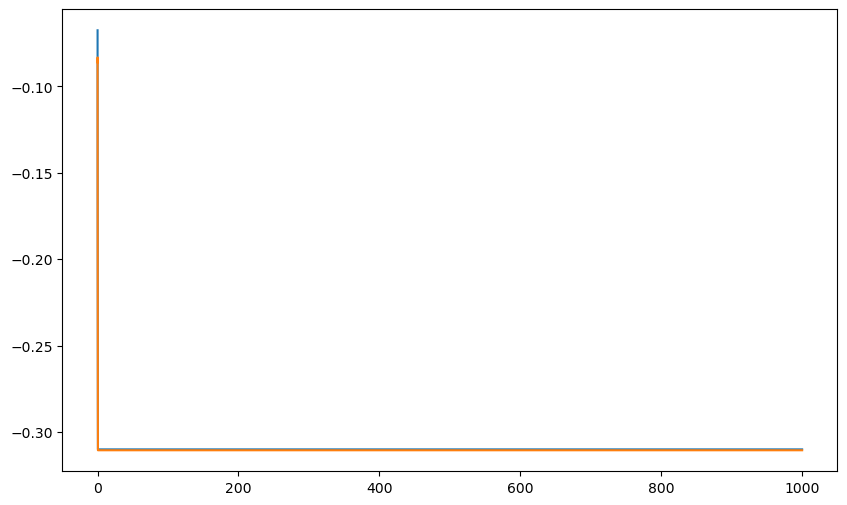

In [186]:
# plotting r2 score using   laso
plt.figure(figsize=(10,6))
plt.plot(lassoCV_df['param_alpha'], lassoCV_df['mean_train_score'])
plt.plot(lassoCV_df['param_alpha'], lassoCV_df['mean_test_score'])

In [188]:
# Most important predictors 

coeef_df = pd.DataFrame(list(zip(X_train.columns,lasso.coef_)),columns=['Feature','Coef'])

# Sort this data frame based on the absolute values of the coefficients
coeef_df['Coef_abs'] = np.abs(coeef_df['Coef'])
coeef_df.sort_values(by='Coef_abs',ascending=False,inplace=True)

# select top 10 predictors based on the coefficients
coeef_df.head(10)

Feature      Coef  Coef_abs
22    GrLivArea  0.121005  0.121005
51  MSZoning_RL  0.081549  0.081549
52  MSZoning_RM  0.062471  0.062471
18  TotalBsmtSF  0.056951  0.056951
4   OverallQual  0.049428  0.049428
6     YearBuilt  0.042768  0.042768
49  MSZoning_FV  0.041600  0.041600
5   OverallCond  0.038308  0.038308
0       LotArea  0.031264  0.031264
30   GarageCars  0.031164  0.031164

###  `The variables significant in predicting the price of a house are:`

So the above listed Features can be considered as the most important factors to determine the price of a house.

### `How well those variables describe the price of a house?`

1.   GrLivArea : Above grade (ground) living area square feet, so if the GrLivArea increases by 1 (in sq feet) price of the house will increase by .12 times.
2.  MSZoning_RL : Residential Low Density, if the house is located in residential area with low neighbourhood density then the price will increase by .08 times


#### Question :
After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

In [189]:
# Get the top 5 variables from Lasso
lasso_top_5 = coeef_df.head(5)['Feature']

# Drop top 5 lasso var from X_train
X_train_del_top5 = X_train.drop(lasso_top_5,axis =1)



In [190]:
# Drop top 5 from test data
X_test_del_top5 = X_test.drop(lasso_top_5,axis =1)

### We have to create another lasso model on this new dataset created after deleting the top 5 feature variable. We will follow the same sequence of steps created for the 1st lasso model

In [191]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20, 50, 100, 500, 1000 ]}
# Create lasso object
lasso = Lasso()

In [192]:
# Perform GridSearcg cross validation to get the best hyper parameter value
lasso_new_CV = GridSearchCV(estimator=lasso,param_grid=params,scoring='neg_mean_absolute_error',cv=kfold,verbose=1,n_jobs=-1,return_train_score=True)
lasso_new_CV.fit(X_train_del_top5, y_train)

# Get the best hyper parameter value
lasso_new_CV.best_params_   

Fitting 5 folds for each of 27 candidates, totalling 135 fits


{'alpha': 0.001}

In [193]:
# Build another lasso model using the best alpha value
alpha_optimal = 0.001
lasso = Lasso(alpha=alpha_optimal)
lasso.fit(X_train_del_top5, y_train)
list(zip(X_train_del_top5.columns,lasso.coef_))


[('LotArea', 0.045424562543243785),
 ('LotShape', 0.0019068998131263853),
 ('LandSlope', 0.0017626952688895772),
 ('HouseStyle', -0.004435068680504318),
 ('OverallCond', 0.04099268809801806),
 ('YearBuilt', 0.045377362431294525),
 ('YearRemodAdd', 0.03139804040478683),
 ('MasVnrArea', 0.00907322286689109),
 ('ExterQual', 0.016677717025347552),
 ('ExterCond', -0.0029086774818019036),
 ('BsmtQual', 0.011577374772170327),
 ('BsmtCond', 0.004350916002605604),
 ('BsmtExposure', 0.02347113577414234),
 ('BsmtFinType1', 0.0017706452362108238),
 ('BsmtFinSF1', 0.1044611323120353),
 ('BsmtFinType2', 0.024786129175317348),
 ('BsmtUnfSF', 0.0807099152304412),
 ('HeatingQC', 0.0034155658356313464),
 ('CentralAir', 0.024810964132631157),
 ('2ndFlrSF', 0.07087094904743456),
 ('BsmtFullBath', 0.011161757865280567),
 ('FullBath', 0.03680901449318816),
 ('HalfBath', 0.024460390349071288),
 ('BedroomAbvGr', 0.014854639072326915),
 ('KitchenQual', 0.025195683732388573),
 ('Functional', -0.0099382233123729

In [194]:
# predict using this lasso model and evaluate metrices
y_test_pred = lasso_new_CV.predict(X_test_del_top5)
y_train_pred = lasso_new_CV.predict(X_train_del_top5)

# Metrices
print('Train R2:',r2_score(y_train, y_train_pred))
print('Test R2:',r2_score(y_test, y_test_pred))
print('--------------------')
print('Train RMSE:',np.sqrt(mean_squared_error(y_train, y_train_pred)))
print('Test RMSE:',np.sqrt(mean_squared_error(y_test, y_test_pred)))



Train R2: 0.9072058977142287
Test R2: 0.8672552951576801
--------------------
Train RMSE: 0.12075624339915147
Test RMSE: 0.14791311219948153


In [195]:
# Top 5 predictors as per this new Lasso model
lasso_new_top5 = pd.DataFrame(list(zip(X_train_del_top5.columns,lasso.coef_)),columns=['Feature','Coef'])

# Sort this data frame based on the absolute values of the coefficients
lasso_new_top5['Coef_abs'] = np.abs(lasso_new_top5['Coef'])
lasso_new_top5.sort_values(by='Coef_abs',ascending=False,inplace=True)
lasso_new_top5.head()

Feature      Coef  Coef_abs
14  BsmtFinSF1  0.104461  0.104461
16   BsmtUnfSF  0.080710  0.080710
19    2ndFlrSF  0.070871  0.070871
0      LotArea  0.045425  0.045425
5    YearBuilt  0.045377  0.045377